<a href="https://colab.research.google.com/github/emine456/Machine_Learning/blob/main/Data_Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importation des packages nécessaire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importer les bases de données
application_data = pd.read_csv('/content/drive/MyDrive/Projet_Team_Will/application_data.csv')
previous_application_data = pd.read_csv('/content/drive/MyDrive/Projet_Team_Will/previous_application.csv')

In [4]:
# Affichage des 5 premiéres lignes du premier dataframe
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
# Affichage des 5 premiéres lignes du second dataframe
previous_application_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [6]:
# Affichage des dimensions des dataframes
print(application_data.shape)
print(previous_application_data.shape)

(307511, 122)
(1670214, 37)


- Application data : 307 511 clients décrit chacun par 122 caractéristiques.
- Previous application data : 1 670 214 décrit par 37 caractéristique chacun

On remarque que le nombre de lignes dans le dataset 2 est plus élevé, cela veut donc dire que plusieurs client du dataset 1 ont déja fait de nombreuses demandes de prêt auparavant.

# Application Data

In [ ]:
# Séparation des variables catégoriques et des variables numériques
cat_cols = []
int_cols = []
float_cols = []

for element in application_data.select_dtypes('object'):
  cat_cols.append(element)

for element in application_data.select_dtypes('int'):
  int_cols.append(element)

for element in application_data.select_dtypes('float'):
  float_cols.append(element)

# Affichage des dimensions de chaque liste
print(len(cat_cols))
print(len(int_cols))
print(len(float_cols))

16
41
65


<Axes: >

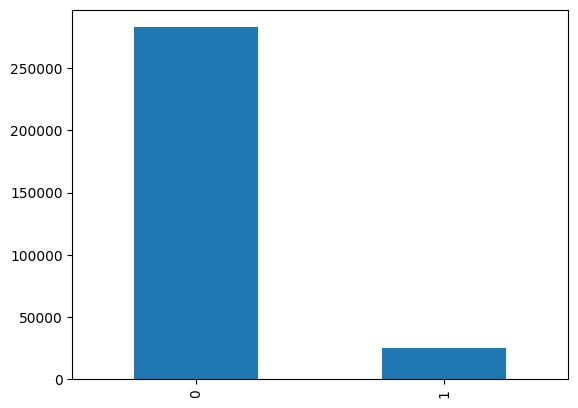

In [8]:
application_data.TARGET.value_counts().plot(kind='bar')

In [9]:
# Proportion en pourcentage
print(application_data['TARGET'].value_counts(normalize = True) * 100)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


La répartition des classes est déséquilibré ce qui est très courant dans ce type de problématique.

## Analyse bivariée des variables catégoriques

In [ ]:
print(cat_cols)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [ ]:
cat_cols.remove("ORGANIZATION_TYPE")

In [ ]:
# Vérification des valeurs manquantes (En pourcentage)
df_cat = application_data[cat_cols]
(df_cat.isnull().sum() / df_cat.shape[0]) * 100 

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
OCCUPATION_TYPE               31.345545
WEEKDAY_APPR_PROCESS_START     0.000000
FONDKAPREMONT_MODE            68.386172
HOUSETYPE_MODE                50.176091
WALLSMATERIAL_MODE            50.840783
EMERGENCYSTATE_MODE           47.398304
dtype: float64

Certaines colonnes contiennent des valeurs manquantes. Nous devrons les traiter lors du preprocessing afin de pouvoir faire tourner les algorithmes de Machine Learning.

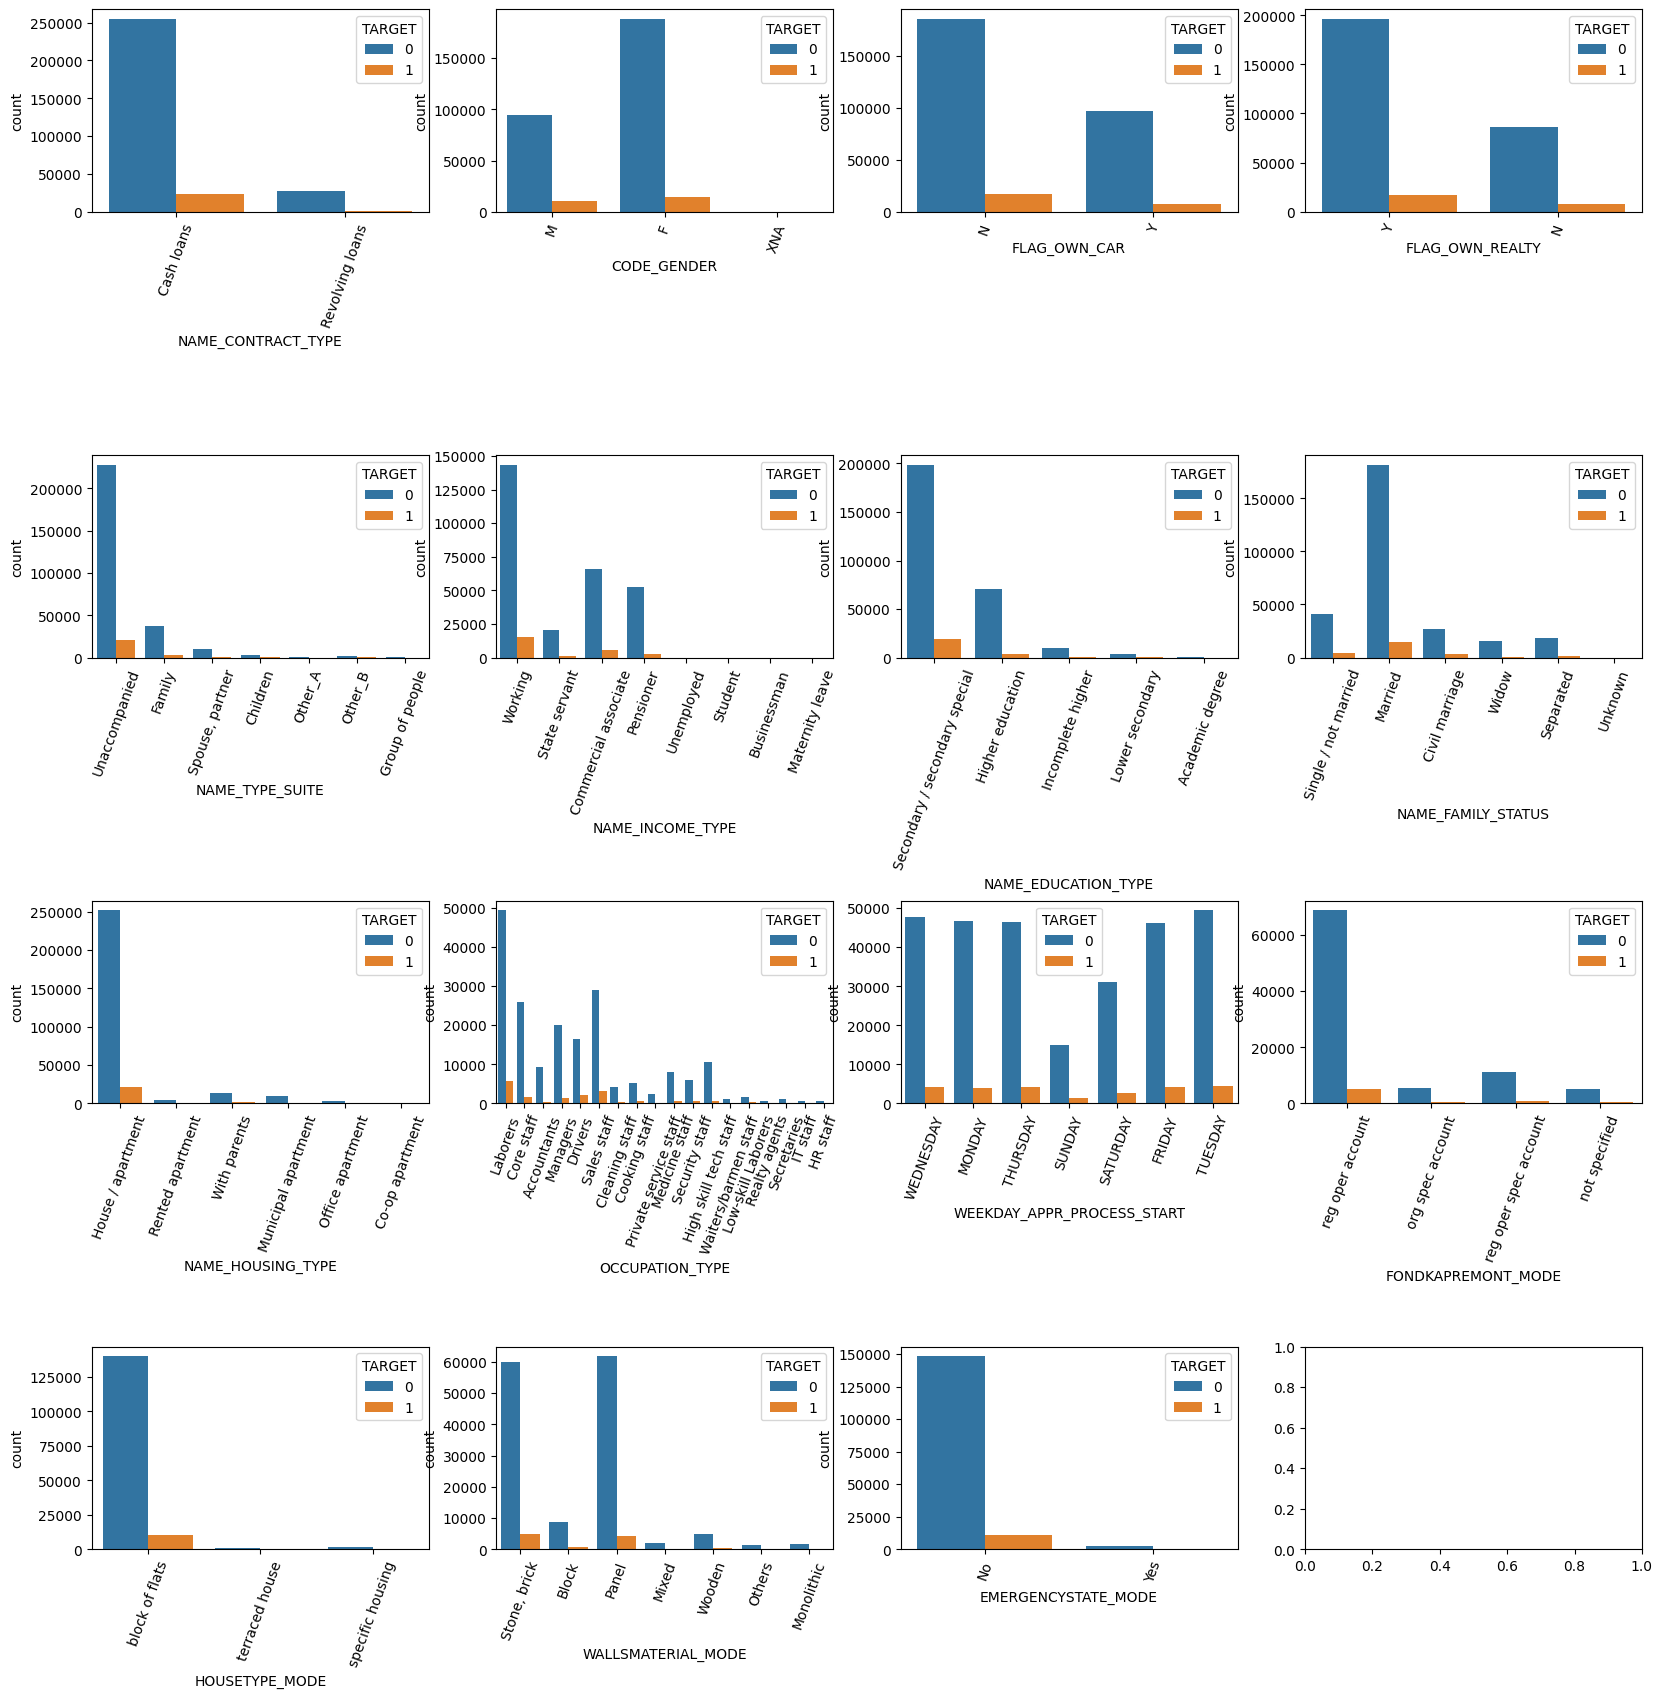

In [ ]:
# Affichage d'histogramme qui croise chaque variable catégorique de type chaîne de caractére avec la Target

fig,axes = plt.subplots(4,4,figsize=(20,20))

for idx,cat_col in enumerate(cat_cols):
    
    row , col = idx//4,idx%4
    ax = sns.countplot(x=cat_col , data= application_data , hue='TARGET' , ax = axes[row,col])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
    fig.subplots_adjust(hspace=1.2)

- Code gender : Pratiquement la même proportion de taux défaut alors qu'il y'a beaucoup plus de femmes que d'hommes dans notre échantillon -> Les hommes ont tendance a faire défaut plus souvent que les femmes

In [ ]:
# Mesure des différentes proportions
Code_Gender_M = application_data[application_data['CODE_GENDER'] == "M"]
Code_Gender_F = application_data[application_data['CODE_GENDER'] == "F"]

print("Code Gender \n")
print(Code_Gender_M.TARGET.value_counts(normalize = True) * 100)
print(Code_Gender_F.TARGET.value_counts(normalize = True) * 100)
print("\n")

Flag_Own_Car_Y = application_data[application_data['FLAG_OWN_CAR'] == "Y"]
Flag_Own_Car_F = application_data[application_data['FLAG_OWN_CAR'] == "N"]

print('Flag Own Car \n')
print(Flag_Own_Car_Y.TARGET.value_counts(normalize = True) * 100)
print(Flag_Own_Car_F.TARGET.value_counts(normalize = True) * 100)
print('\n')

Flag_Own_Realty_Y = application_data[application_data['FLAG_OWN_REALTY'] == "Y"]
Flag_Own_Realty_F = application_data[application_data['FLAG_OWN_REALTY'] == "N"]

print('Flag Own Realty \n')
print(Flag_Own_Realty_Y.TARGET.value_counts(normalize = True) * 100)
print(Flag_Own_Realty_F.TARGET.value_counts(normalize = True) * 100)
print('\n')

df_Sunday = application_data[application_data['WEEKDAY_APPR_PROCESS_START'] == "SUNDAY"]
df_Not_Sunday = application_data[application_data['WEEKDAY_APPR_PROCESS_START'] != "SUNDAY"]

print('Is Sunday \n')
print(df_Sunday.TARGET.value_counts(normalize = True) * 100)
print(df_Not_Sunday.TARGET.value_counts(normalize = True) * 100)
print('\n')

maison_apart_df = application_data[application_data['NAME_HOUSING_TYPE'] == "House / apartment"]
parent_df = application_data[application_data['NAME_HOUSING_TYPE'] == "With parents"]

print('Où est-ce que le client habite \n')
print(maison_apart_df.TARGET.value_counts(normalize = True) * 100)
print(parent_df.TARGET.value_counts(normalize = True) * 100)
print('\n')

Secondary_df = application_data[application_data['NAME_EDUCATION_TYPE'] == "Secondary / secondary special"]
Higher_df = application_data[application_data['NAME_EDUCATION_TYPE'] == "Higher education"]
Incomplete_higher_df = application_data[application_data['NAME_EDUCATION_TYPE'] == "Incomplete higher"]
Lower_secondary_df = application_data[application_data['NAME_EDUCATION_TYPE'] == "Lower secondary"]
Academic_degree_df = application_data[application_data['NAME_EDUCATION_TYPE'] == "Academic degree"]

print("Niveau d'éducation \n")
print(Secondary_df.TARGET.value_counts(normalize = True) * 100)
print(Higher_df.TARGET.value_counts(normalize = True) * 100)
print(Incomplete_higher_df.TARGET.value_counts(normalize = True) * 100)
print(Lower_secondary_df.TARGET.value_counts(normalize = True) * 100)
print(Academic_degree_df.TARGET.value_counts(normalize = True) * 100)
print('\n')


Code Gender 

0    89.85808
1    10.14192
Name: TARGET, dtype: float64
0    93.000672
1     6.999328
Name: TARGET, dtype: float64


Flag Own Car 

0    92.75627
1     7.24373
Name: TARGET, dtype: float64
0    91.499773
1     8.500227
Name: TARGET, dtype: float64


Flag Own Realty 

0    92.038423
1     7.961577
Name: TARGET, dtype: float64
0    91.675071
1     8.324929
Name: TARGET, dtype: float64


Is Sunday 

0    92.070947
1     7.929053
Name: TARGET, dtype: float64
0    91.91913
1     8.08087
Name: TARGET, dtype: float64


Où est-ce que le client habite 

0    92.204289
1     7.795711
Name: TARGET, dtype: float64
0    88.301887
1    11.698113
Name: TARGET, dtype: float64


Niveau d'éducation 

0    91.060071
1     8.939929
Name: TARGET, dtype: float64
0    94.644885
1     5.355115
Name: TARGET, dtype: float64
0    91.515034
1     8.484966
Name: TARGET, dtype: float64
0    89.072327
1    10.927673
Name: TARGET, dtype: float64
0    98.170732
1     1.829268
Name: TARGET, dtype: float6

On remarque que c'est la variable TARGET qui a le plus corrélé à notre variable cible.

In [ ]:
int_cols = int_cols[2:]
int_cols.remove("DAYS_EMPLOYED")
int_cols.remove("DAYS_BIRTH")
int_cols.remove("DAYS_ID_PUBLISH")
print(int_cols)

['CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [ ]:
df_int = application_data[int_cols]
# Vérification des valeurs manquantes (En pourcentage)
(df_int.isnull().sum() / df_int.shape[0]) * 100 

CNT_CHILDREN                   0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_12               0.0
FLAG_DOCUMENT_13               0.0
FLAG_DOCUMENT_14    

Il n'y a aucune valeur manquante dans les variables de type int

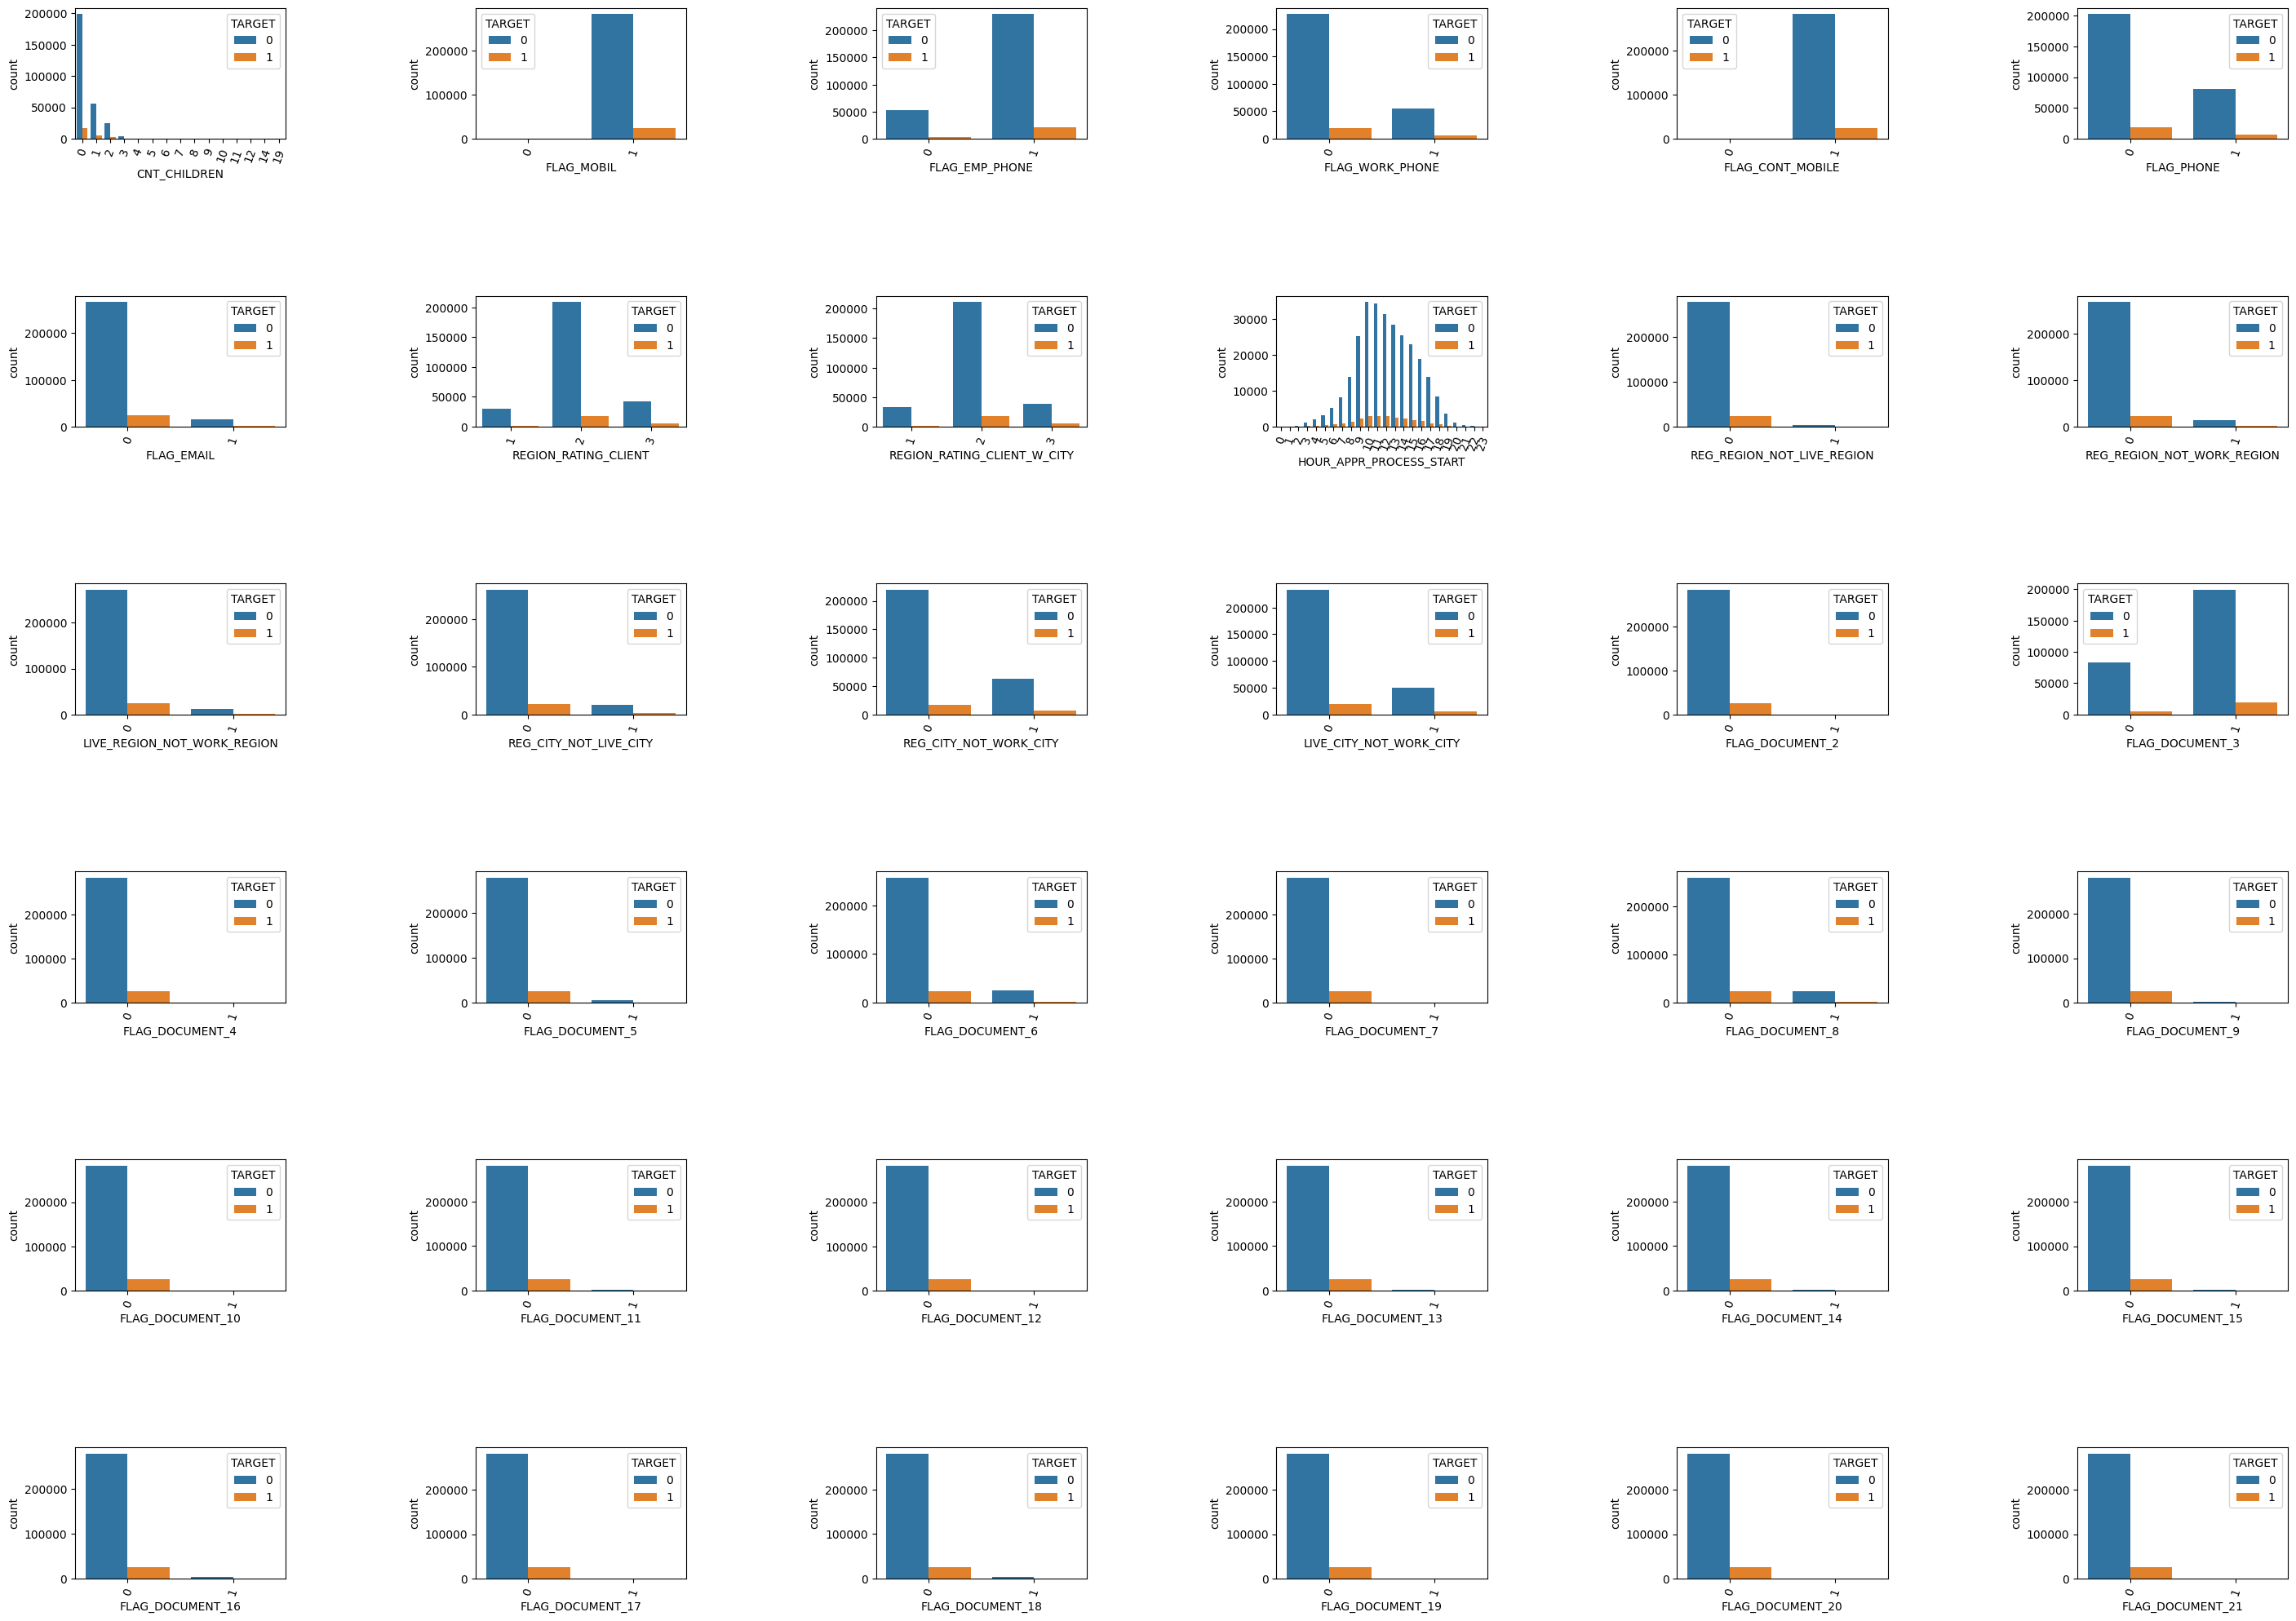

In [ ]:
# Affichage d'histogramme qui croise chaque variable catégorique de type int de caractére avec la Target
fig,axes = plt.subplots(6,6,figsize=(35,25))

for idx,int_col in enumerate(int_cols):
    
    row , col = idx//6,idx%6
    ax = sns.countplot(x=int_col , data= application_data , hue='TARGET' , ax = axes[row,col])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
    fig.subplots_adjust(hspace=1.2,wspace=0.9)

In [ ]:
# Mesure des différentes proportions

Reg_City_Not_Work_City_1 = application_data[application_data['REG_CITY_NOT_WORK_CITY'] == 1]
Reg_City_Not_Work_City_0 = application_data[application_data['REG_CITY_NOT_WORK_CITY'] == 0]

print('Reg City Not Work City \n')
print(Reg_City_Not_Work_City_1.TARGET.value_counts(normalize = True) * 100)
print(Reg_City_Not_Work_City_0.TARGET.value_counts(normalize = True) * 100)
print('\n')

Reg_City_Not_Live_City_1 = application_data[application_data['REG_CITY_NOT_LIVE_CITY'] == 1]
Reg_City_Not_Live_City_0 = application_data[application_data['REG_CITY_NOT_LIVE_CITY'] == 0]

print('Reg City Not Live City \n')
print(Reg_City_Not_Live_City_1.TARGET.value_counts(normalize = True) * 100)
print(Reg_City_Not_Live_City_0.TARGET.value_counts(normalize = True) * 100)
print('\n')

Live_City_Not_Work_City_1 = application_data[application_data['LIVE_CITY_NOT_WORK_CITY'] == 1]
Live_City_Not_Work_City_0 = application_data[application_data['LIVE_CITY_NOT_WORK_CITY'] == 0]

print('Reg City Not Live City \n')
print(Live_City_Not_Work_City_1.TARGET.value_counts(normalize = True) * 100)
print(Live_City_Not_Work_City_0.TARGET.value_counts(normalize = True) * 100)
print('\n')

Flag_Phone_1 = application_data[application_data['FLAG_PHONE'] == 1]
Flag_Phone_0 = application_data[application_data['FLAG_PHONE'] == 0]

print('Flag Phone \n')
print(Flag_Phone_1.TARGET.value_counts(normalize = True) * 100)
print(Flag_Phone_0.TARGET.value_counts(normalize = True) * 100)
print('\n')

Nbr_Children_Sup_5 = application_data[application_data['CNT_CHILDREN'] > 5]
Nbr_Children_Inf_5 = application_data[application_data['CNT_CHILDREN'] <= 5]

print('Nbr Children \n')
print(Nbr_Children_Sup_5['TARGET'].value_counts(normalize = True) * 100)
print(Nbr_Children_Inf_5['TARGET'].value_counts(normalize = True) * 100)
print('\n')

Flag_email_1 = application_data[application_data['FLAG_EMAIL'] == 1]
Flag_email_0 = application_data[application_data['FLAG_EMAIL'] == 0]

print('Flag email \n')
print(Flag_email_1['TARGET'].value_counts(normalize = True) * 100)
print(Flag_email_0['TARGET'].value_counts(normalize = True) * 100)
print('\n')

Reg City Not Work City 

0    89.388573
1    10.611427
Name: TARGET, dtype: float64
0    92.687328
1     7.312672
Name: TARGET, dtype: float64


Reg City Not Live City 

0    87.774034
1    12.225966
Name: TARGET, dtype: float64
0    92.279308
1     7.720692
Name: TARGET, dtype: float64


Reg City Not Live City 

0    90.033505
1     9.966495
Name: TARGET, dtype: float64
0    92.341535
1     7.658465
Name: TARGET, dtype: float64


Flag Phone 

0    92.96433
1     7.03567
Name: TARGET, dtype: float64
0    91.521621
1     8.478379
Name: TARGET, dtype: float64


Nbr Children 

0    78.571429
1    21.428571
Name: TARGET, dtype: float64
0    91.928942
1     8.071058
Name: TARGET, dtype: float64


Flag email 

0    92.122463
1     7.877537
Name: TARGET, dtype: float64
0    91.915372
1     8.084628
Name: TARGET, dtype: float64




## Analyse statistique des variables continues

In [ ]:
print(len(float_cols))

65


In [ ]:
# On sépare les variables continues en deux tableaux différents pour avoir une visualisation qui est plus clair
float_cols_1 = [i for i in float_cols[0 : int(len(float_cols)/2)]]
float_cols_2 = [i for i in float_cols[int(len(float_cols)/2)+1 : ]]

print(len(float_cols_1))
print(len(float_cols_2))

32
32


In [ ]:
df_float_1 = application_data[float_cols_1]
df_float_2 = application_data[float_cols_2]

### Partie 1

In [ ]:
df_float_1.drop(['DAYS_REGISTRATION'],axis=1,inplace=True)

array([[<Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>],
       [<Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'APARTMENTS_AVG'}>,
        <Axes: title={'center': 'BASEMENTAREA_AVG'}>],
       [<Axes: title={'center': 'YEARS_BEGINEXPLUATATION_AVG'}>,
        <Axes: title={'center': 'YEARS_BUILD_AVG'}>,
        <Axes: title={'center': 'COMMONAREA_AVG'}>,
        <Axes: title={'center': 'ELEVATORS_AVG'}>,
        <Axes: title={'center': 'ENTRANCES_AVG'}>,
        <Axes: title={'center': 'FLOORSMAX_AVG'}>],
       [<Axes: title={'center': 'FLOORSMIN_AVG'}

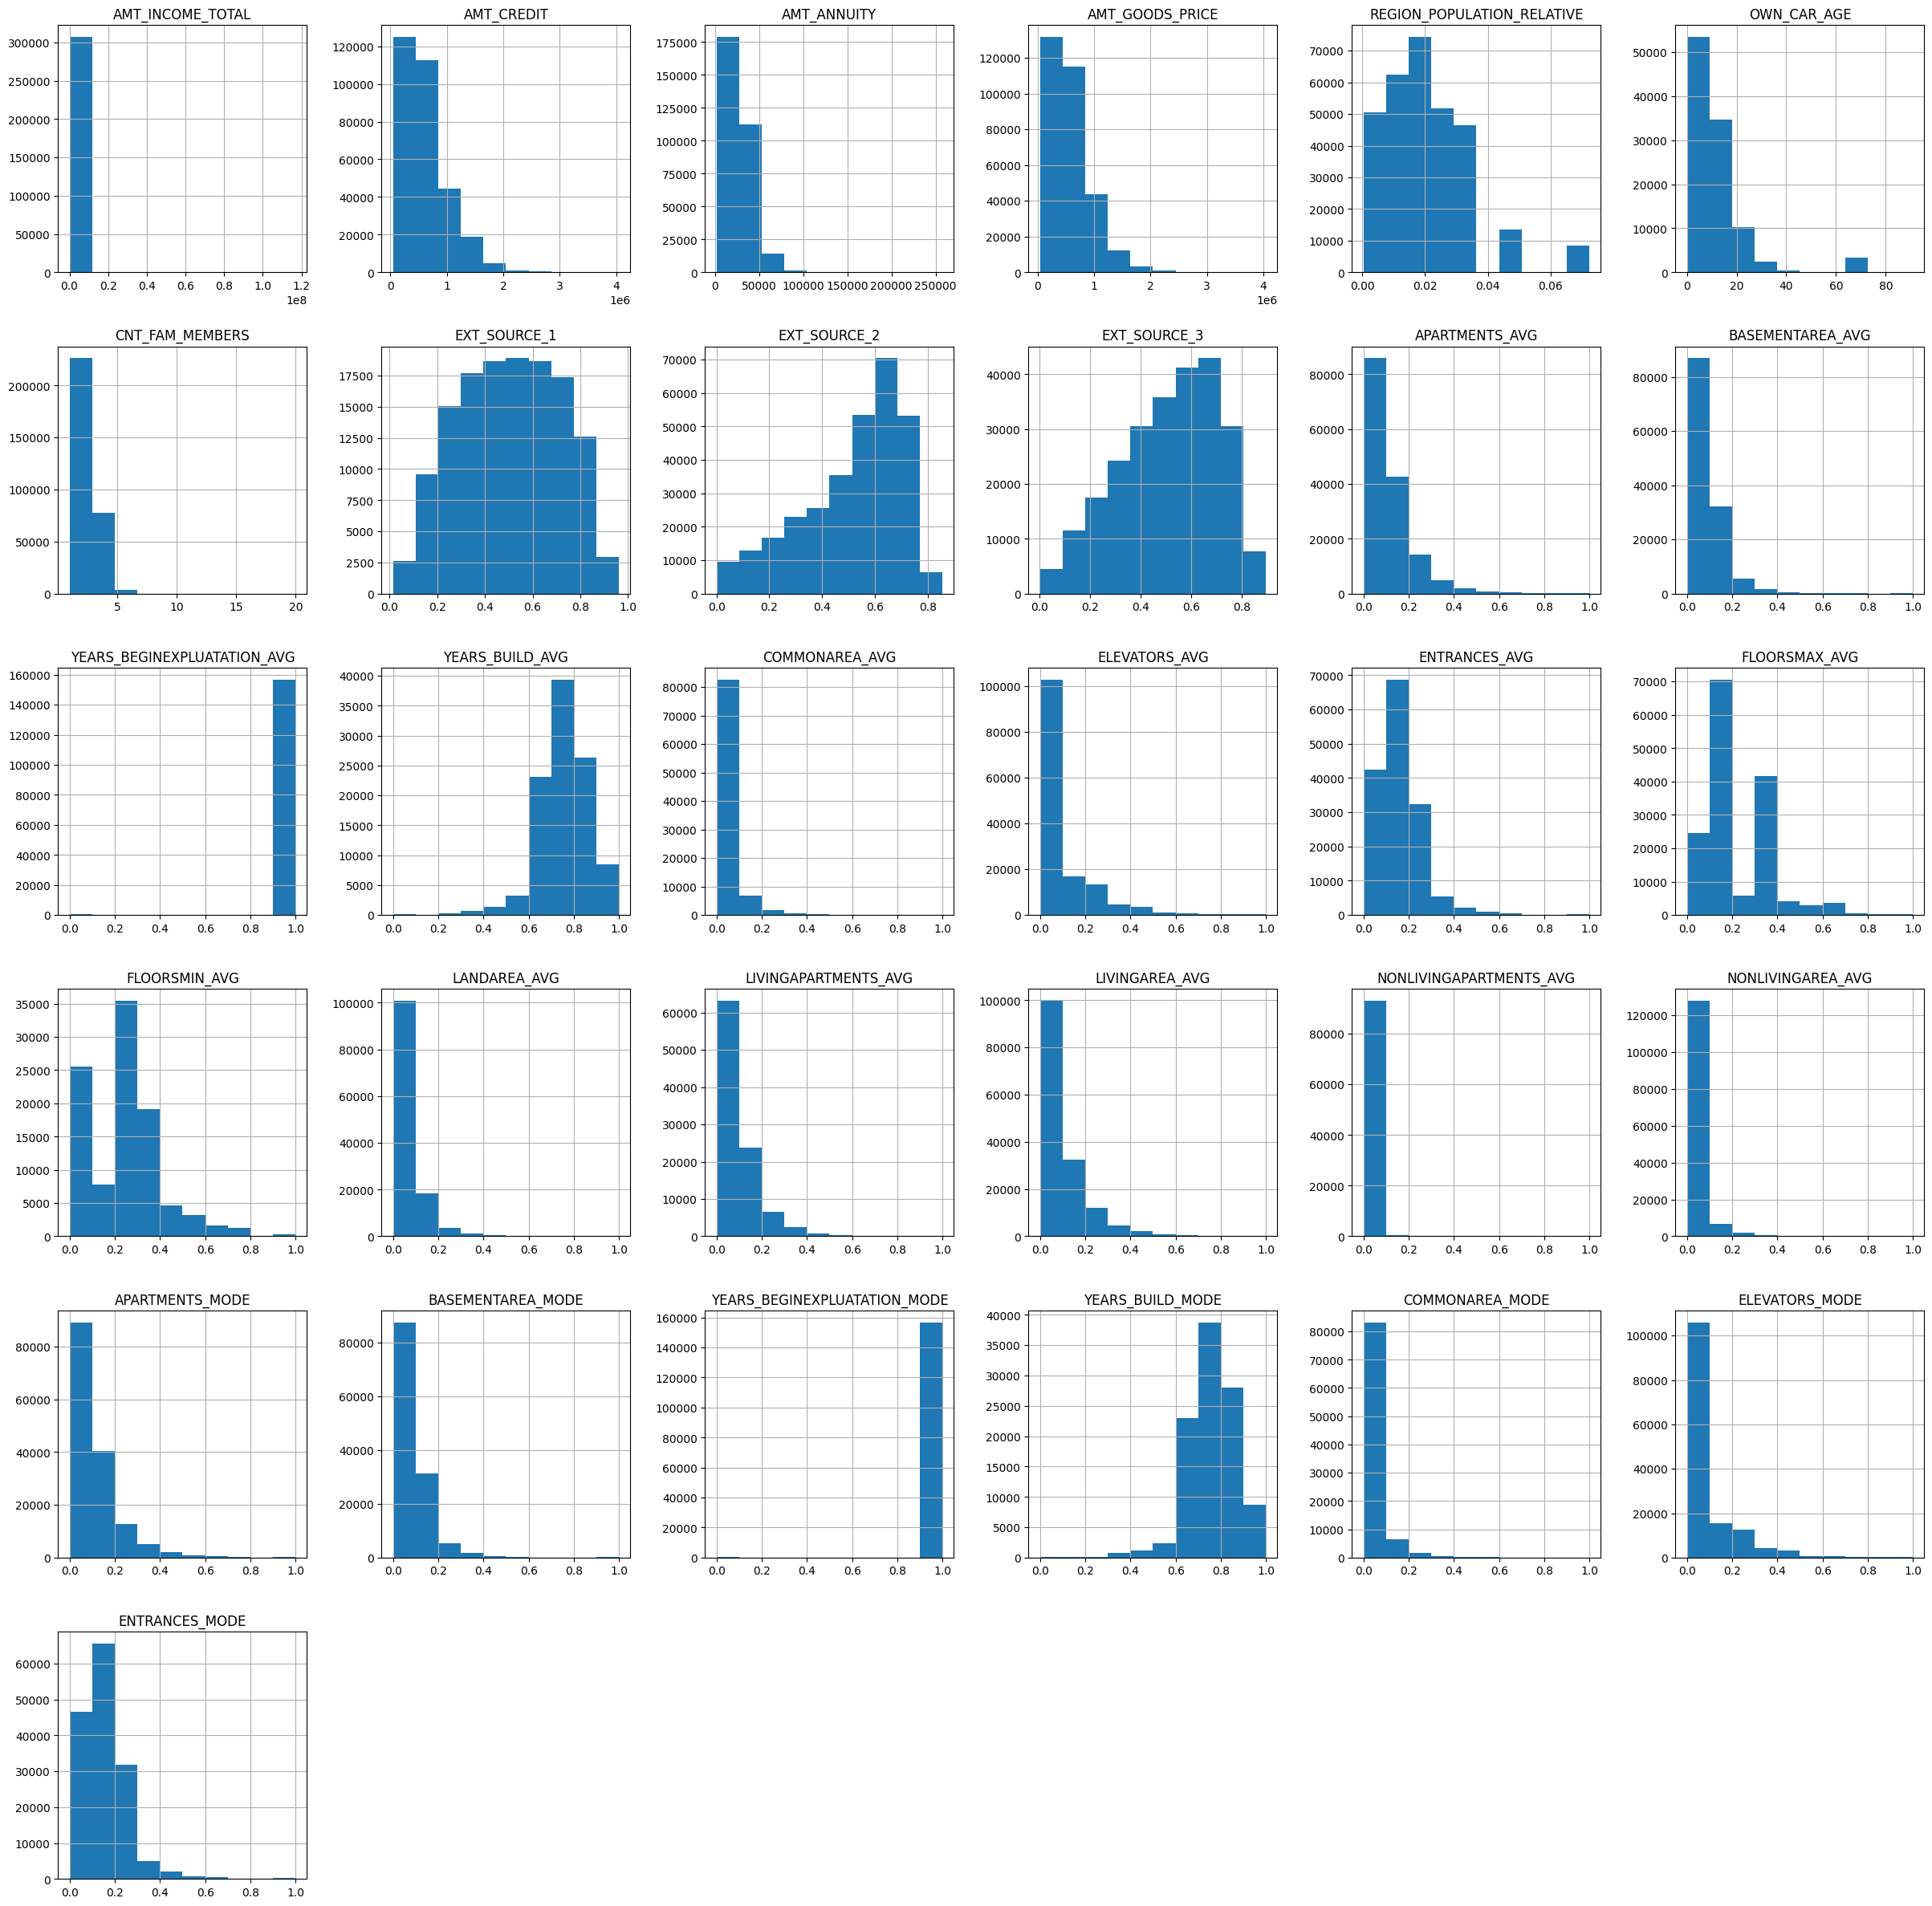

In [ ]:
df_float_1.hist(figsize=(30,30))

On remarque que la distribution des variables continue ne suivent pas une distribution gaussienne, il faudra donc leur appliquer certaines transformation. Il est important que les variables continues soient distribué selon une loi Normal car les Machine learning les modéliseront bien mieux de cette maniére.

In [ ]:
# Transformation BoxCox
df_BoxCox = df_float_1.copy()
for col in df_BoxCox.columns:
    df_BoxCox[col], _ = stats.boxcox(df_BoxCox[col] + 1)

application_data[df_BoxCox.columns] = df_BoxCox

array([[<Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>],
       [<Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'APARTMENTS_AVG'}>,
        <Axes: title={'center': 'BASEMENTAREA_AVG'}>],
       [<Axes: title={'center': 'YEARS_BEGINEXPLUATATION_AVG'}>,
        <Axes: title={'center': 'YEARS_BUILD_AVG'}>,
        <Axes: title={'center': 'COMMONAREA_AVG'}>,
        <Axes: title={'center': 'ELEVATORS_AVG'}>,
        <Axes: title={'center': 'ENTRANCES_AVG'}>,
        <Axes: title={'center': 'FLOORSMAX_AVG'}>],
       [<Axes: title={'center': 'FLOORSMIN_AVG'}

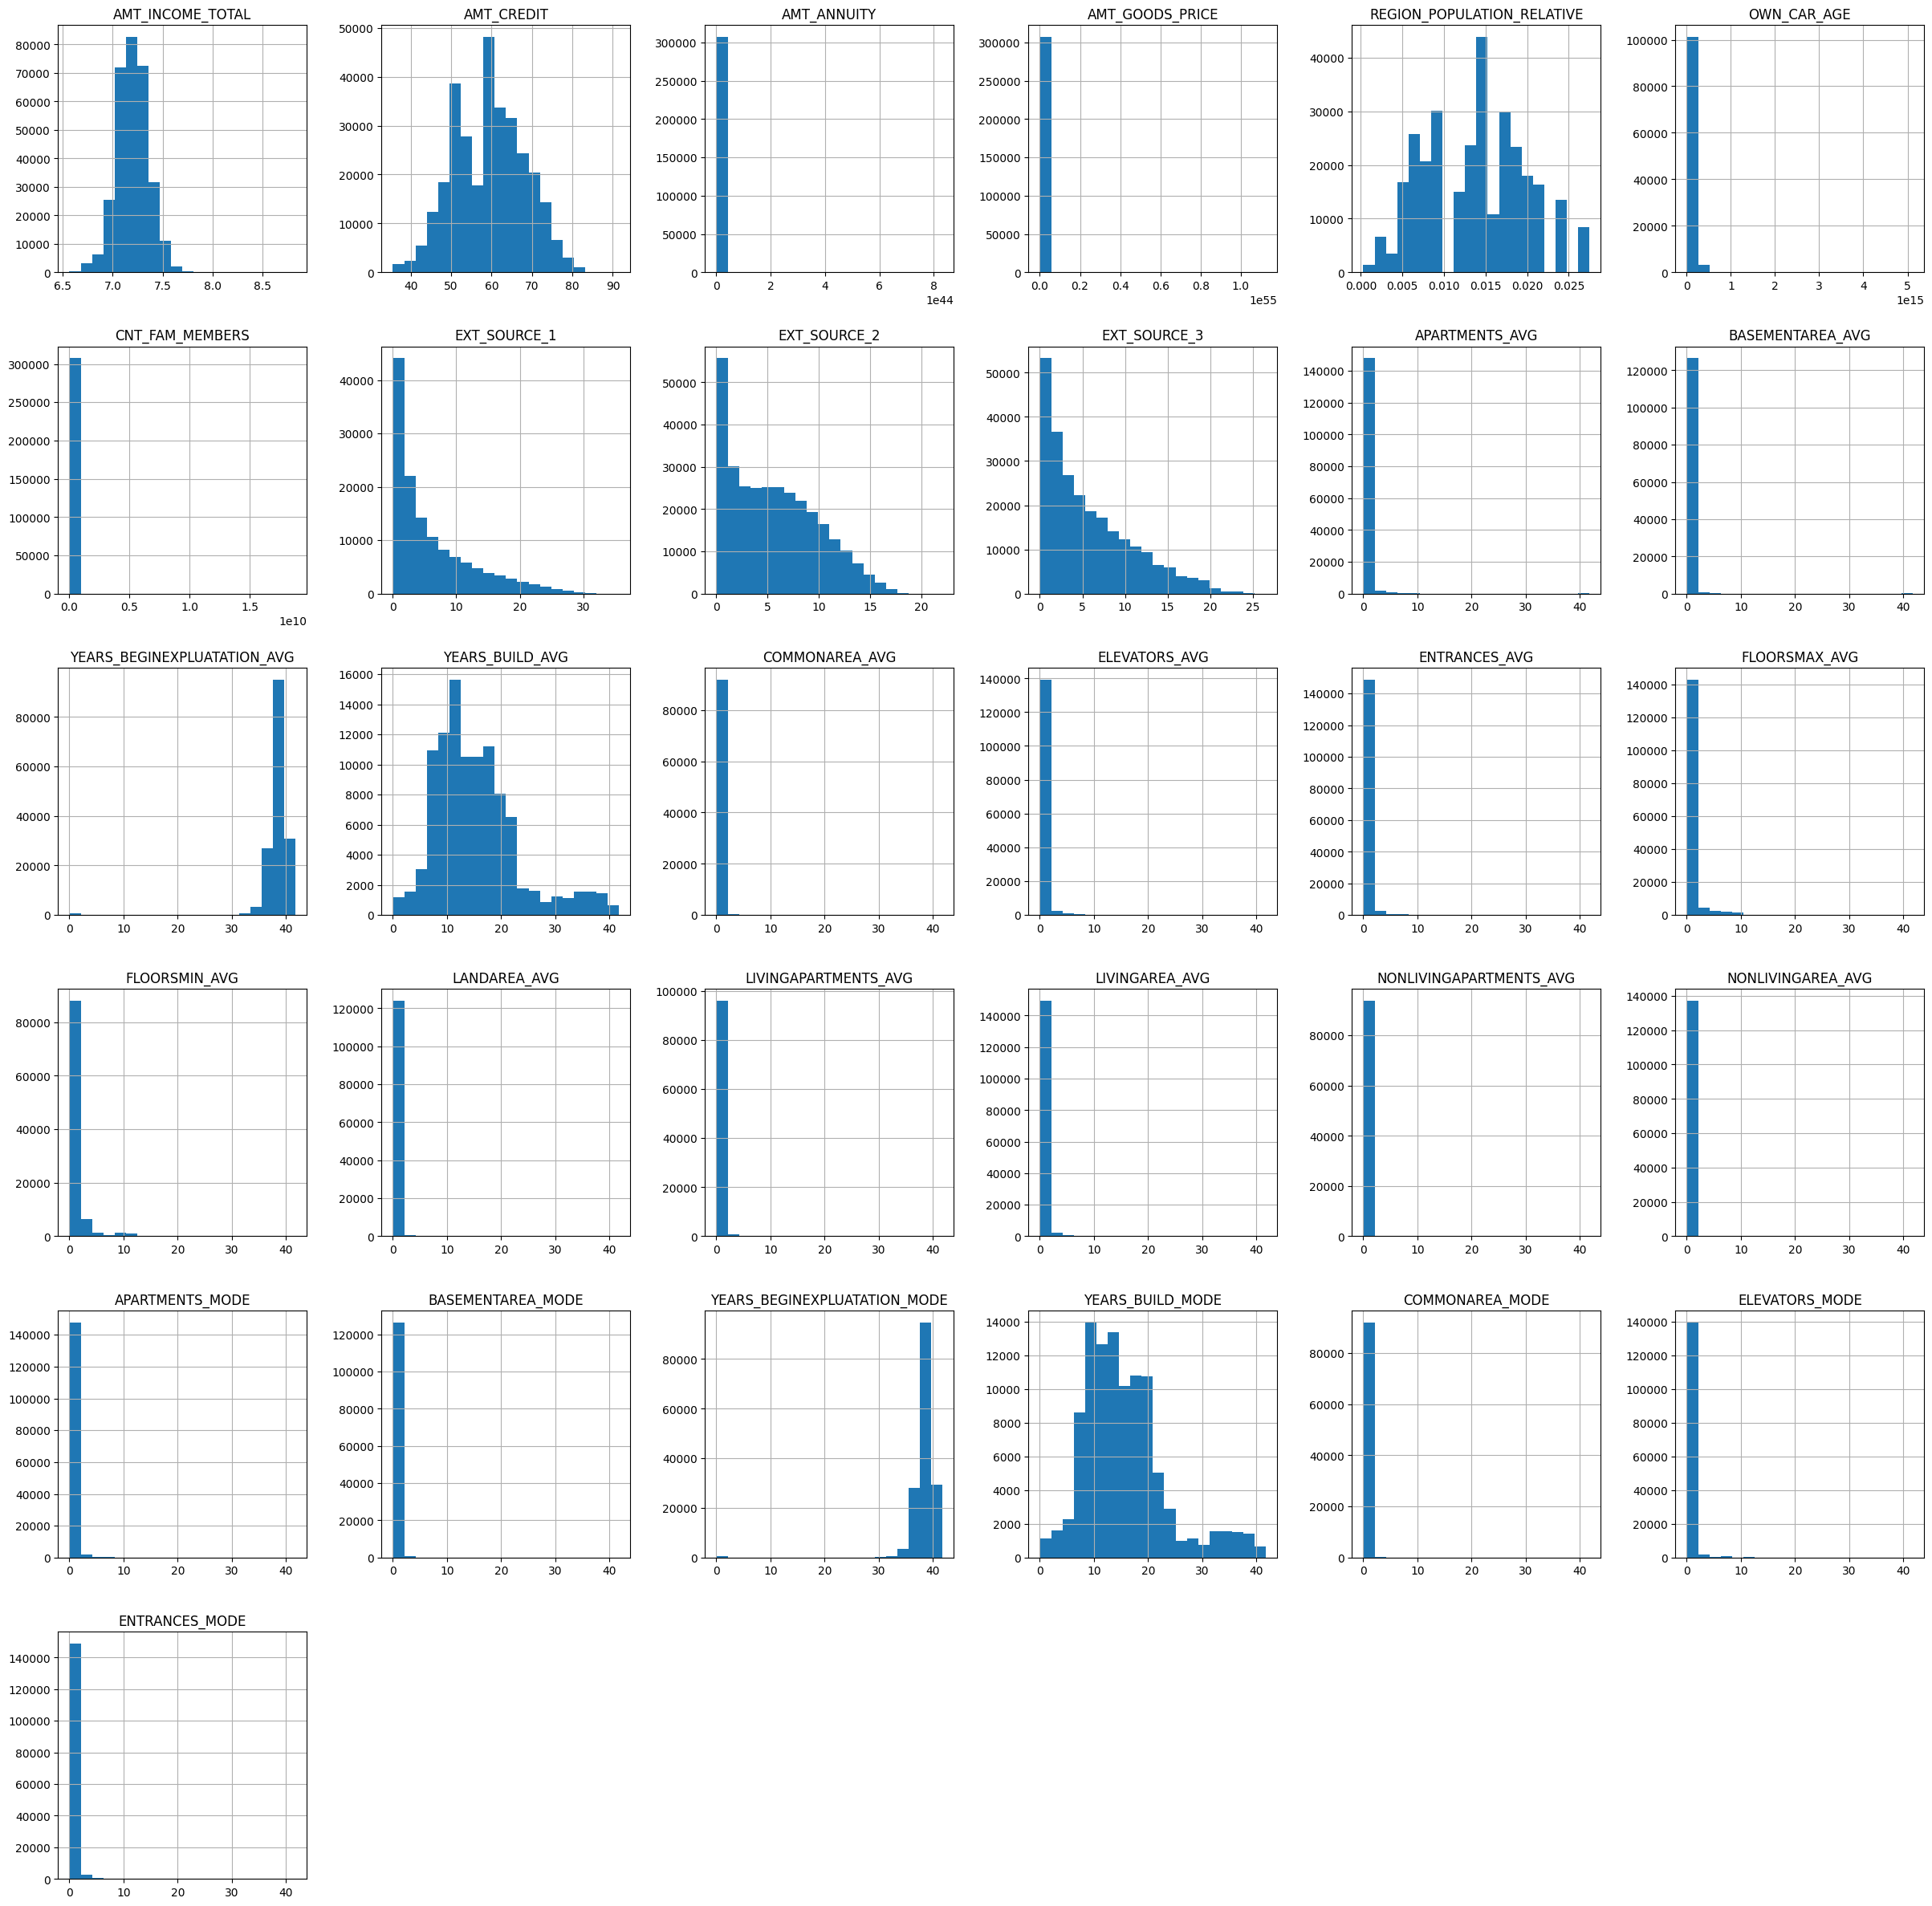

In [ ]:
application_data[df_BoxCox.columns].hist(bins=20, figsize=(30,30))

Les variables continues ne suivent toujours pas une loi normale, on essaye donc d'autres techniques de normalisation

In [ ]:
# Transformation racine carré
df_racine_carre = df_float_1.copy()
df_racine_carre = np.sqrt(df_racine_carre)

array([[<Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>],
       [<Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'APARTMENTS_AVG'}>,
        <Axes: title={'center': 'BASEMENTAREA_AVG'}>],
       [<Axes: title={'center': 'YEARS_BEGINEXPLUATATION_AVG'}>,
        <Axes: title={'center': 'YEARS_BUILD_AVG'}>,
        <Axes: title={'center': 'COMMONAREA_AVG'}>,
        <Axes: title={'center': 'ELEVATORS_AVG'}>,
        <Axes: title={'center': 'ENTRANCES_AVG'}>,
        <Axes: title={'center': 'FLOORSMAX_AVG'}>],
       [<Axes: title={'center': 'FLOORSMIN_AVG'}

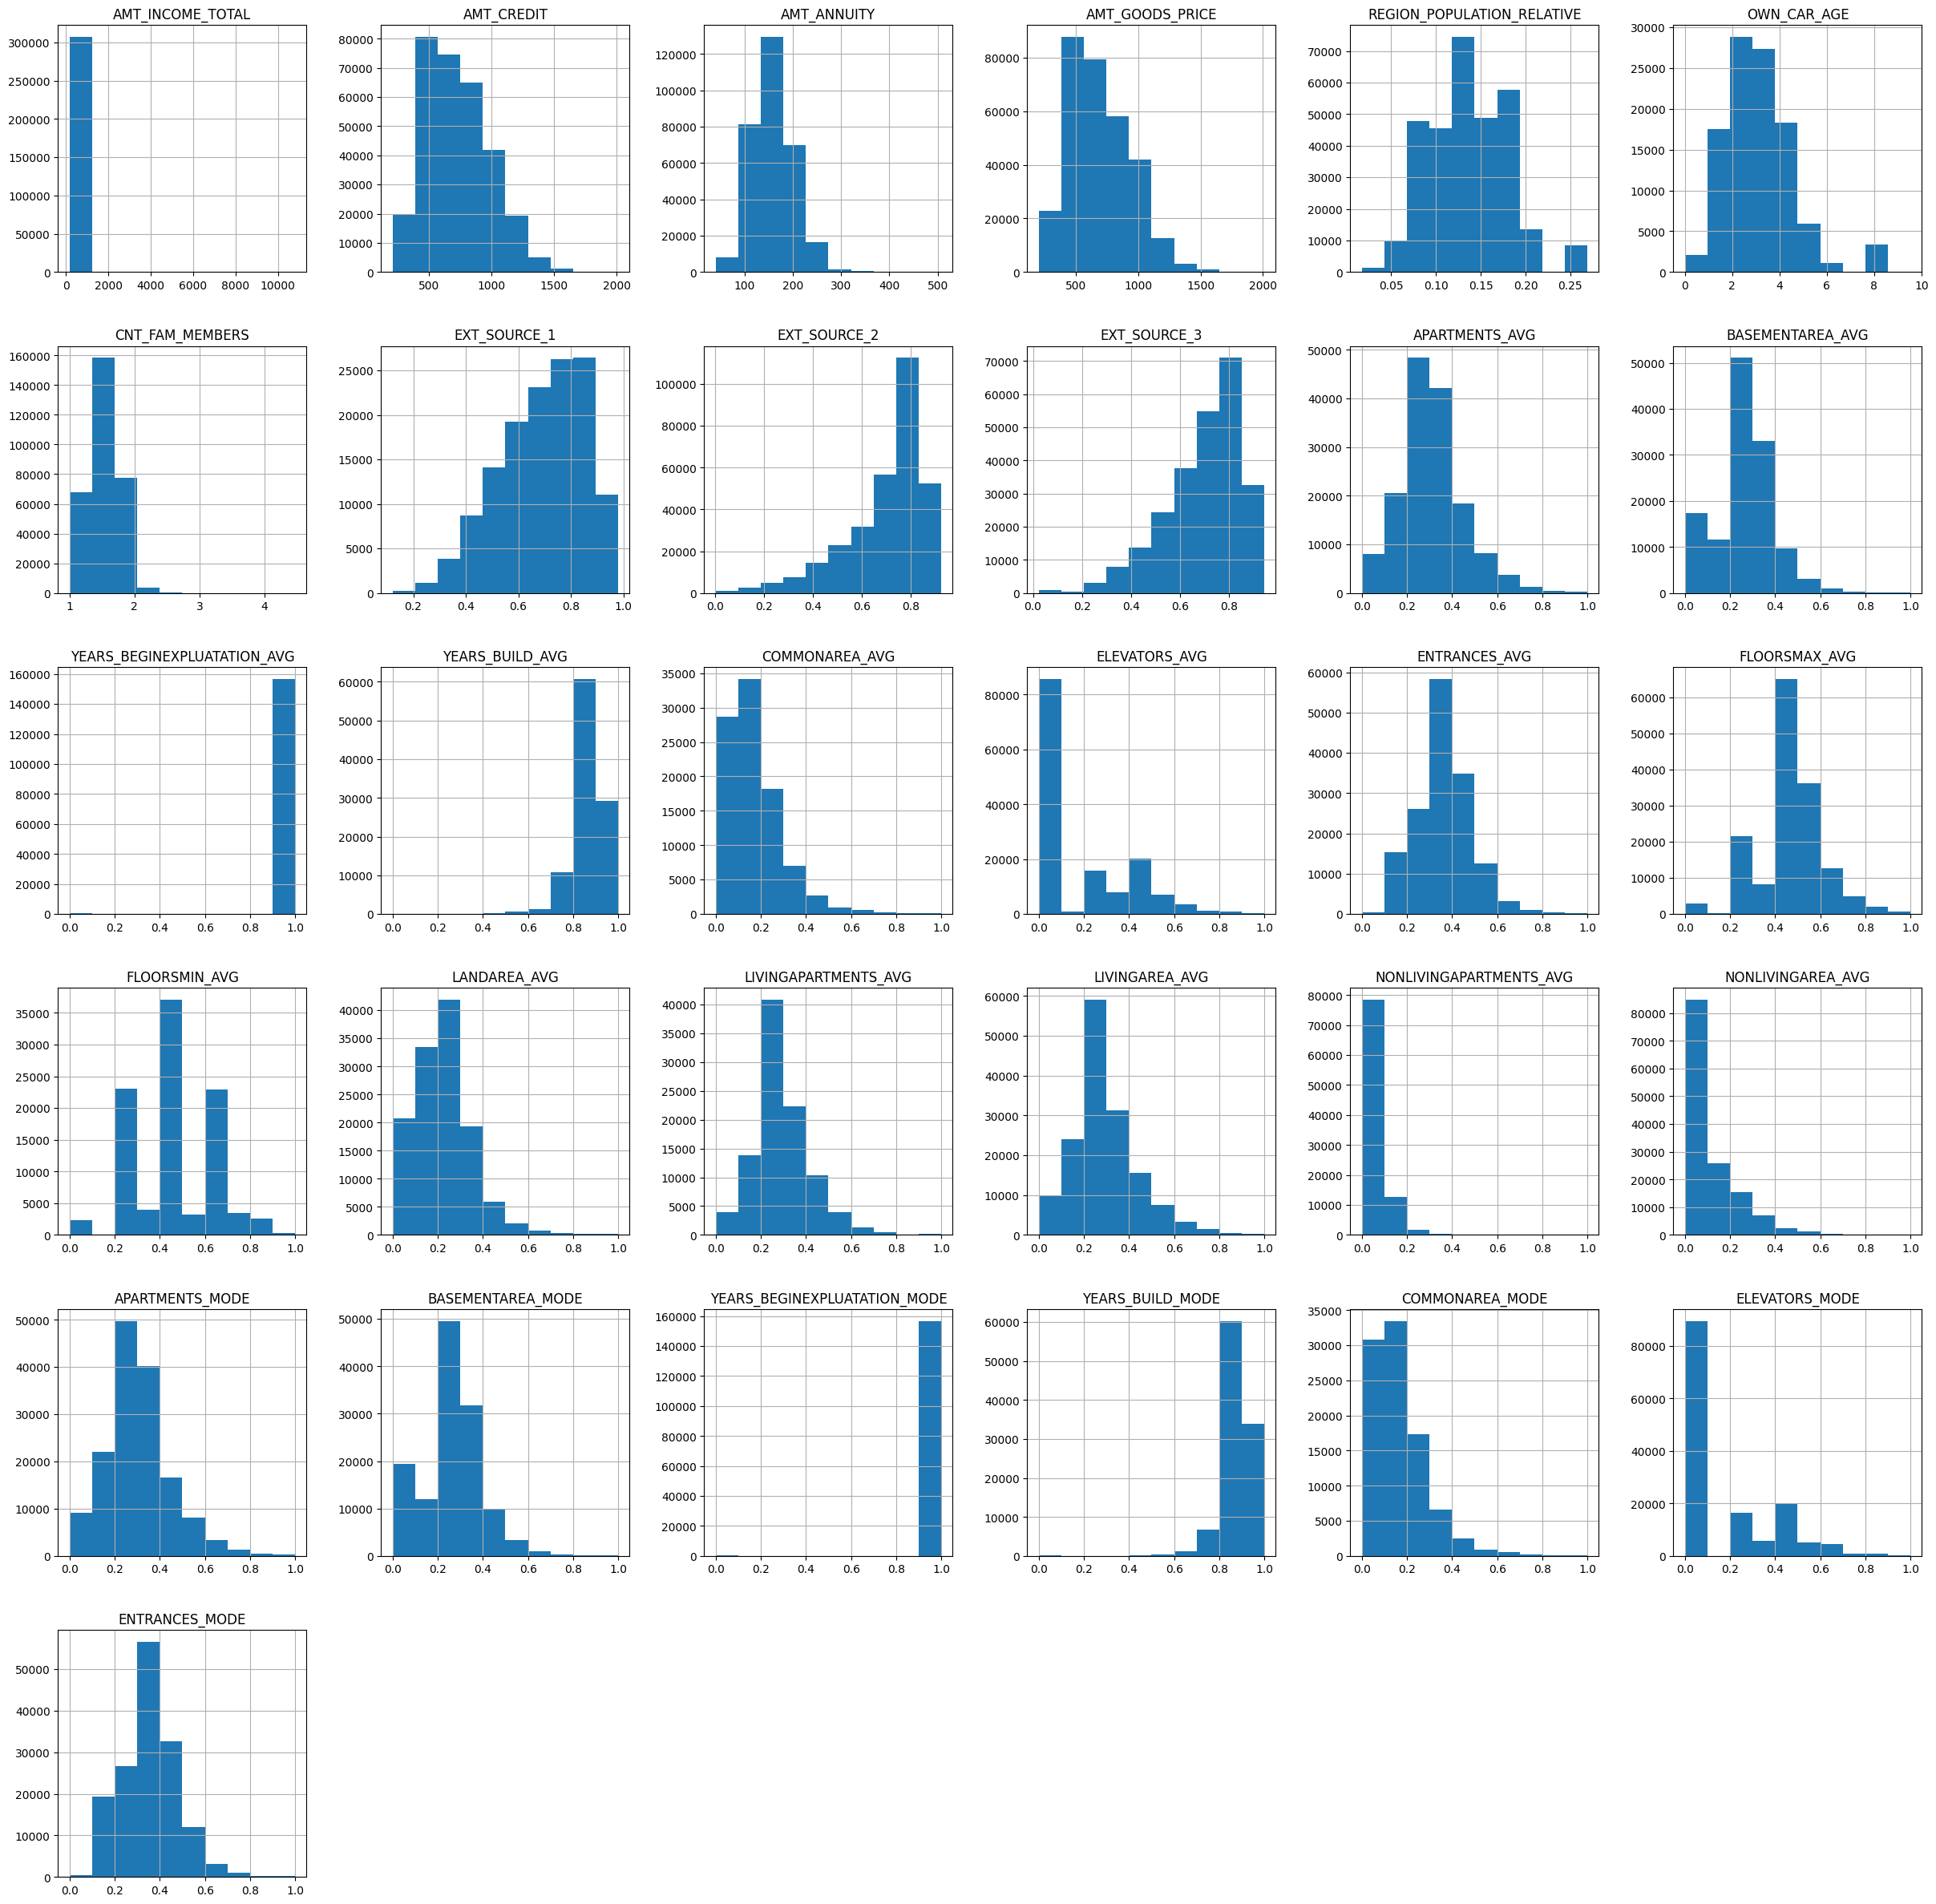

In [ ]:
# Affichage
df_racine_carre.hist(figsize=(30,30))

In [ ]:
# Transformation racine quadratique
df_racine_quadratique = df_float_1.copy()
df_racine_quadratique = np.sqrt(np.sqrt(df_racine_quadratique))

array([[<Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>],
       [<Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'APARTMENTS_AVG'}>,
        <Axes: title={'center': 'BASEMENTAREA_AVG'}>],
       [<Axes: title={'center': 'YEARS_BEGINEXPLUATATION_AVG'}>,
        <Axes: title={'center': 'YEARS_BUILD_AVG'}>,
        <Axes: title={'center': 'COMMONAREA_AVG'}>,
        <Axes: title={'center': 'ELEVATORS_AVG'}>,
        <Axes: title={'center': 'ENTRANCES_AVG'}>,
        <Axes: title={'center': 'FLOORSMAX_AVG'}>],
       [<Axes: title={'center': 'FLOORSMIN_AVG'}

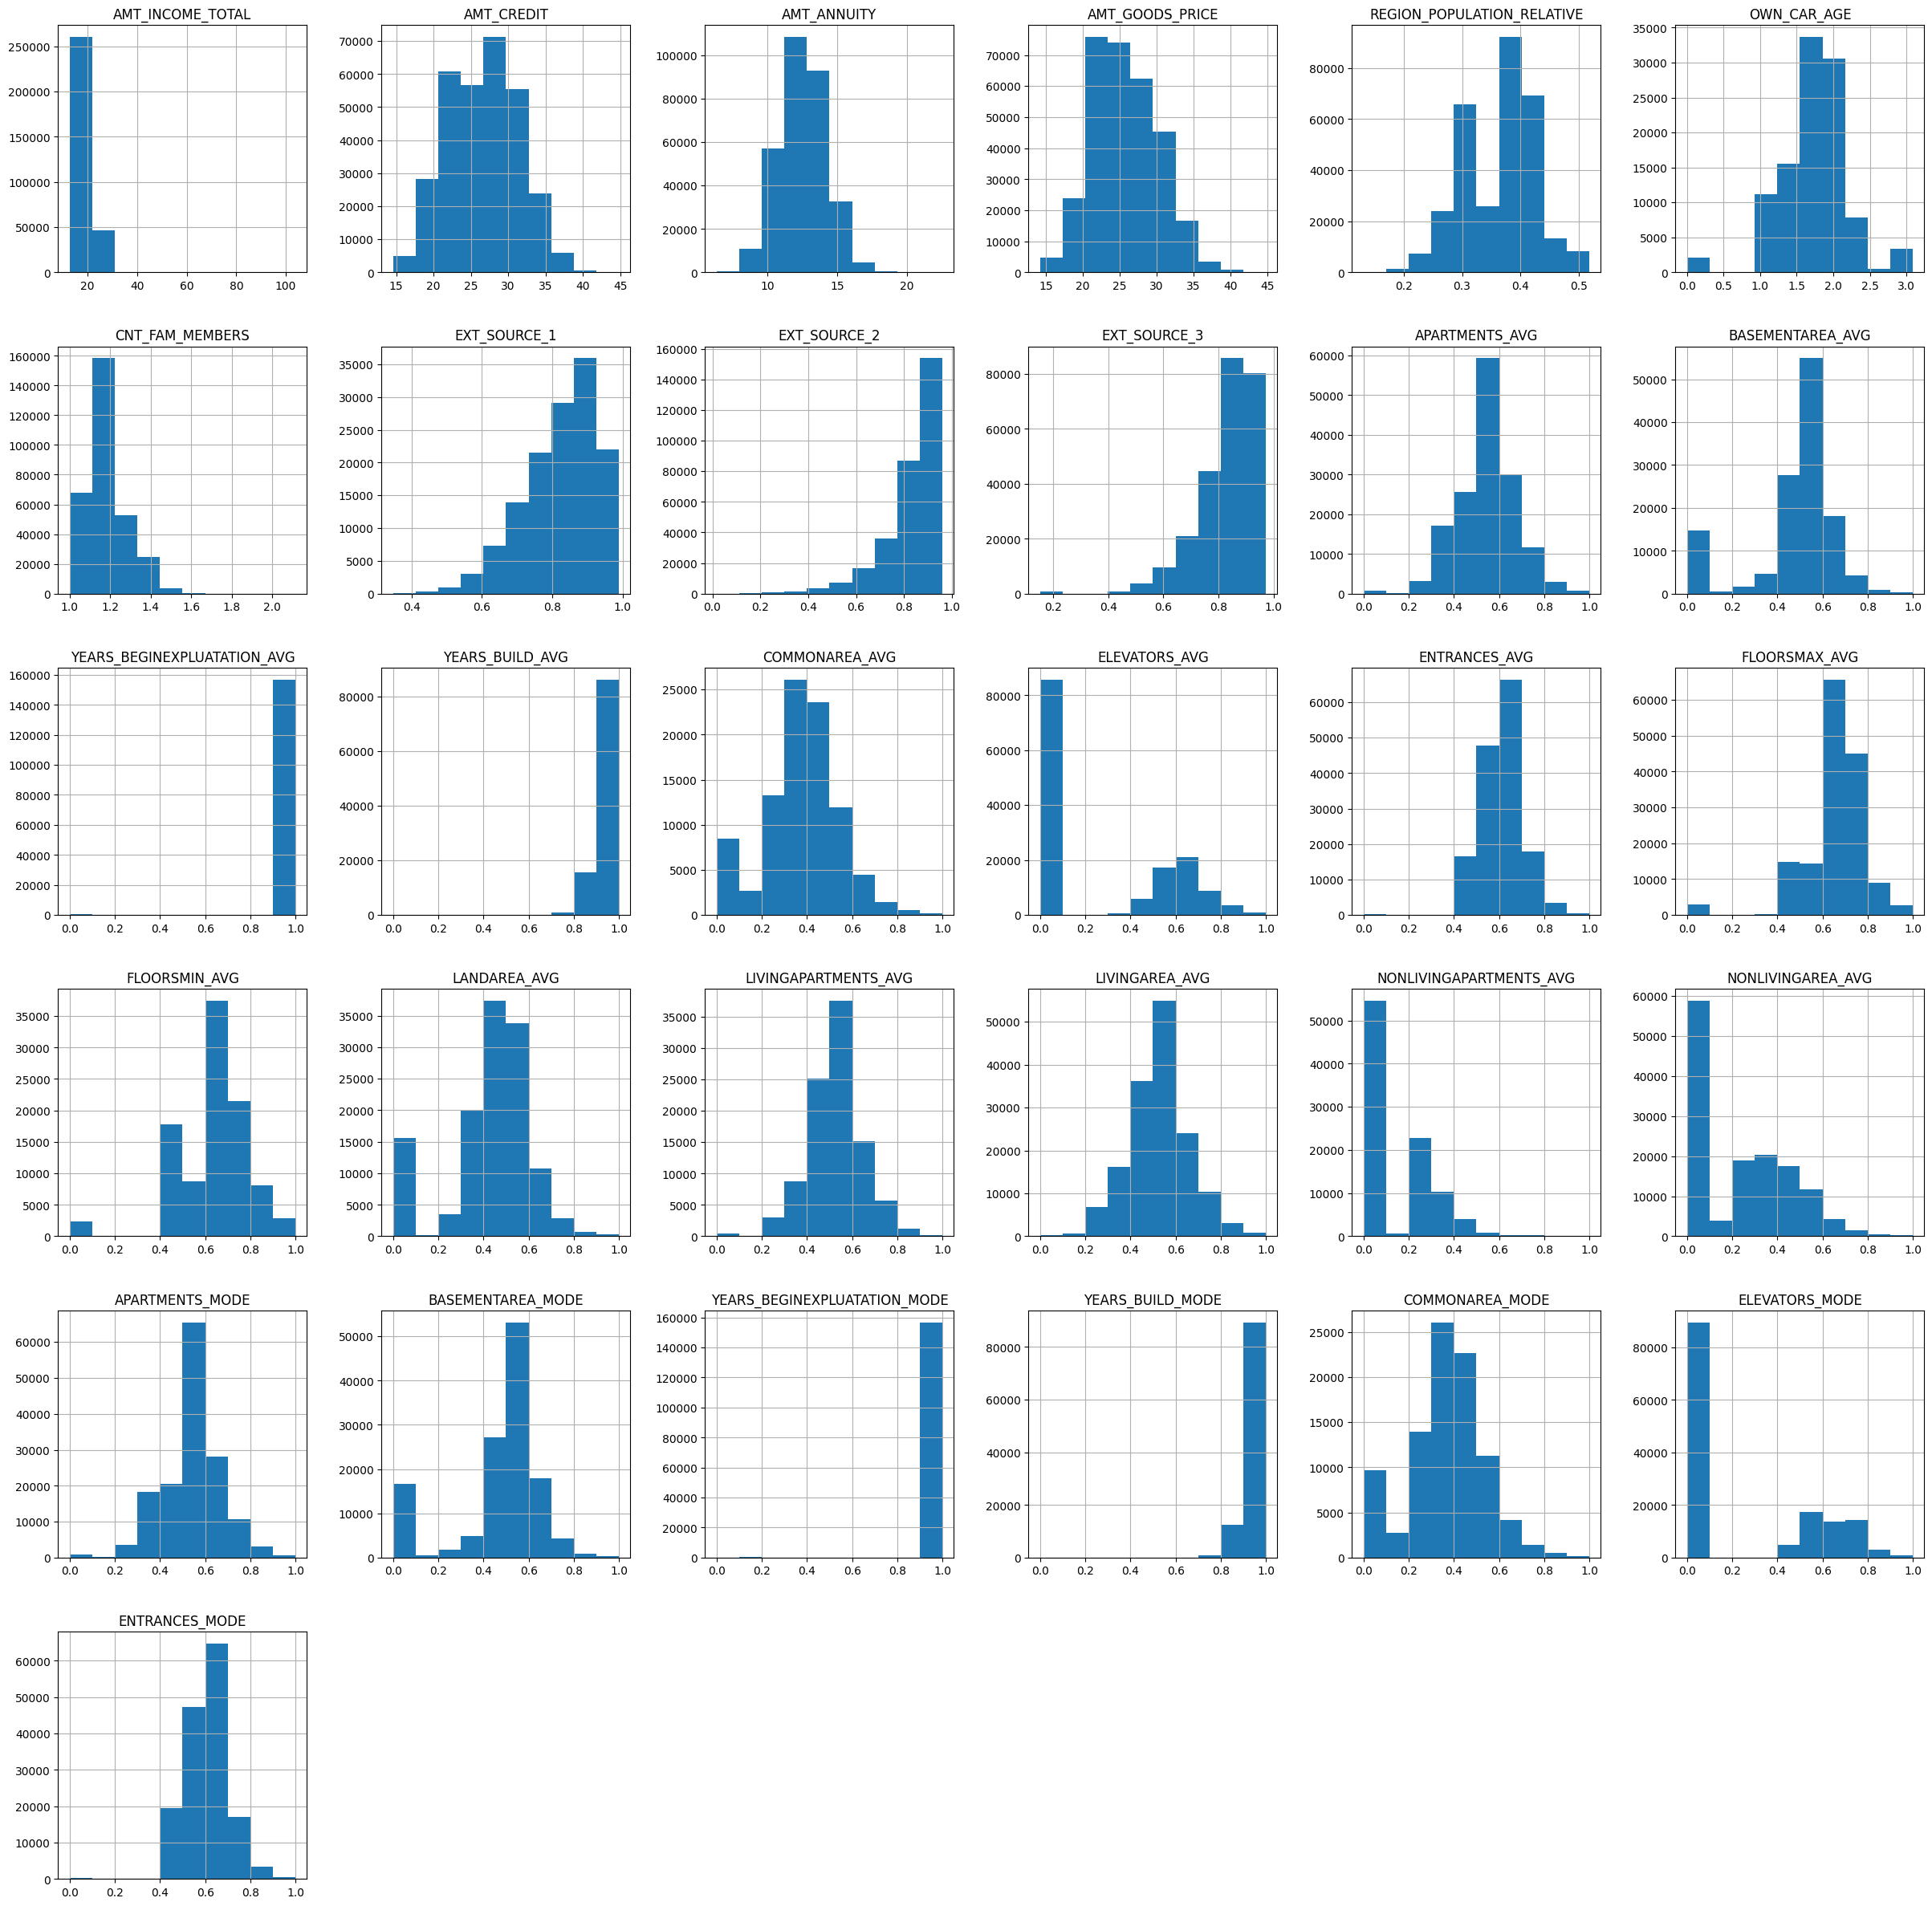

In [ ]:
# Affichage
df_racine_quadratique.hist(figsize=(30,30))

La majorité suivent maintenant une gaussienne. La prochaine étape consiste a isoler les variables qui ne suivent toujours pas de loi normal afin d'essayer d'autres techniques sur ces derniéres.

In [ ]:
log_cols = ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","CNT_FAM_MEMBERS","AMT_INCOME_TOTAL"]
df_log = application_data[log_cols]
df_log = np.log(df_log)

array([[<Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>],
       [<Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>],
       [<Axes: title={'center': 'AMT_INCOME_TOTAL'}>, <Axes: >]],
      dtype=object)

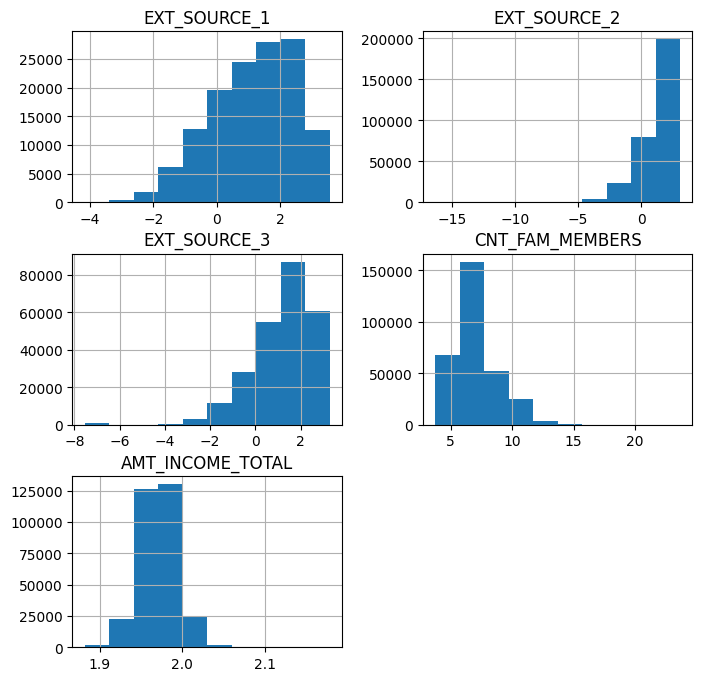

In [ ]:
# Affichage
df_log.hist(figsize=(8,8))

In [ ]:
# Normalisation avec StandardScaler
encoder = StandardScaler()
standard_scaler_col = ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","CNT_FAM_MEMBERS"]
df_StandardScaler = df_float_1[standard_scaler_col]
df_StandardScaler = encoder.fit_transform(df_StandardScaler)

In [ ]:
df_StandardScaler = pd.DataFrame(df_StandardScaler,columns = ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","CNT_FAM_MEMBERS"])

array([[<Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>],
       [<Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>]], dtype=object)

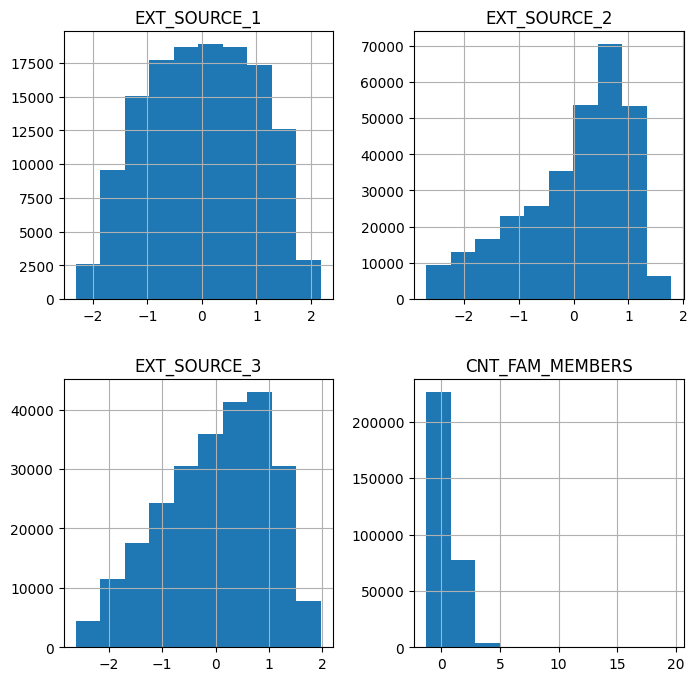

In [ ]:
# Affichage
df_StandardScaler.hist(figsize=(8,8))

In [ ]:
# Normalisation avec MinMaxScaler
encoder = MinMaxScaler()
min_max_scaler_col = ["EXT_SOURCE_2","EXT_SOURCE_3","CNT_FAM_MEMBERS"]
df_MinMaxScaler = df_float_1[min_max_scaler_col]
df_MinMaxScaler = encoder.fit_transform(df_MinMaxScaler)

In [ ]:
df_MinMaxScaler = pd.DataFrame(df_MinMaxScaler,columns = ["EXT_SOURCE_2","EXT_SOURCE_3","CNT_FAM_MEMBERS"])

array([[<Axes: title={'center': 'EXT_SOURCE_2'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>],
       [<Axes: title={'center': 'CNT_FAM_MEMBERS'}>, <Axes: >]],
      dtype=object)

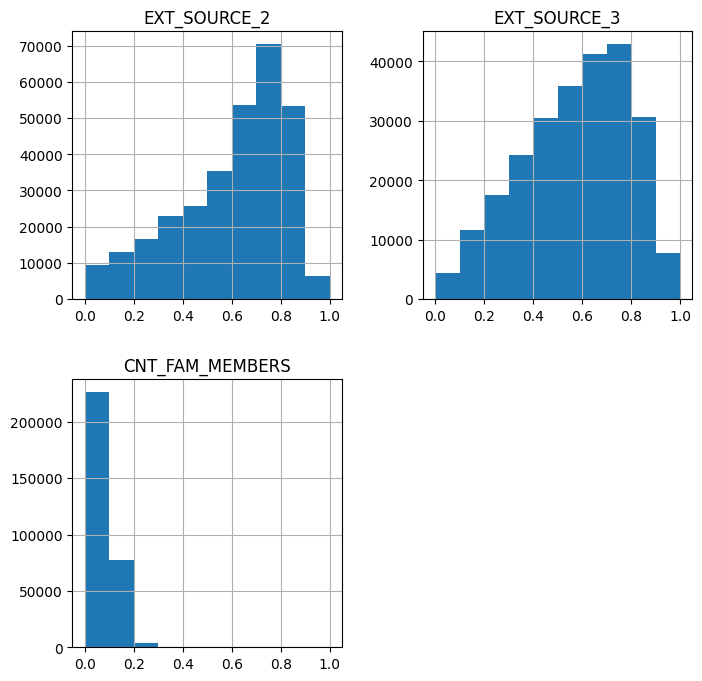

In [ ]:
# Affichage
df_MinMaxScaler.hist(figsize=(8,8))

### Partie 2

array([[<Axes: title={'center': 'FLOORSMIN_MODE'}>,
        <Axes: title={'center': 'LANDAREA_MODE'}>,
        <Axes: title={'center': 'LIVINGAPARTMENTS_MODE'}>,
        <Axes: title={'center': 'LIVINGAREA_MODE'}>,
        <Axes: title={'center': 'NONLIVINGAPARTMENTS_MODE'}>,
        <Axes: title={'center': 'NONLIVINGAREA_MODE'}>],
       [<Axes: title={'center': 'APARTMENTS_MEDI'}>,
        <Axes: title={'center': 'BASEMENTAREA_MEDI'}>,
        <Axes: title={'center': 'YEARS_BEGINEXPLUATATION_MEDI'}>,
        <Axes: title={'center': 'YEARS_BUILD_MEDI'}>,
        <Axes: title={'center': 'COMMONAREA_MEDI'}>,
        <Axes: title={'center': 'ELEVATORS_MEDI'}>],
       [<Axes: title={'center': 'ENTRANCES_MEDI'}>,
        <Axes: title={'center': 'FLOORSMAX_MEDI'}>,
        <Axes: title={'center': 'FLOORSMIN_MEDI'}>,
        <Axes: title={'center': 'LANDAREA_MEDI'}>,
        <Axes: title={'center': 'LIVINGAPARTMENTS_MEDI'}>,
        <Axes: title={'center': 'LIVINGAREA_MEDI'}>],
       [<Axe

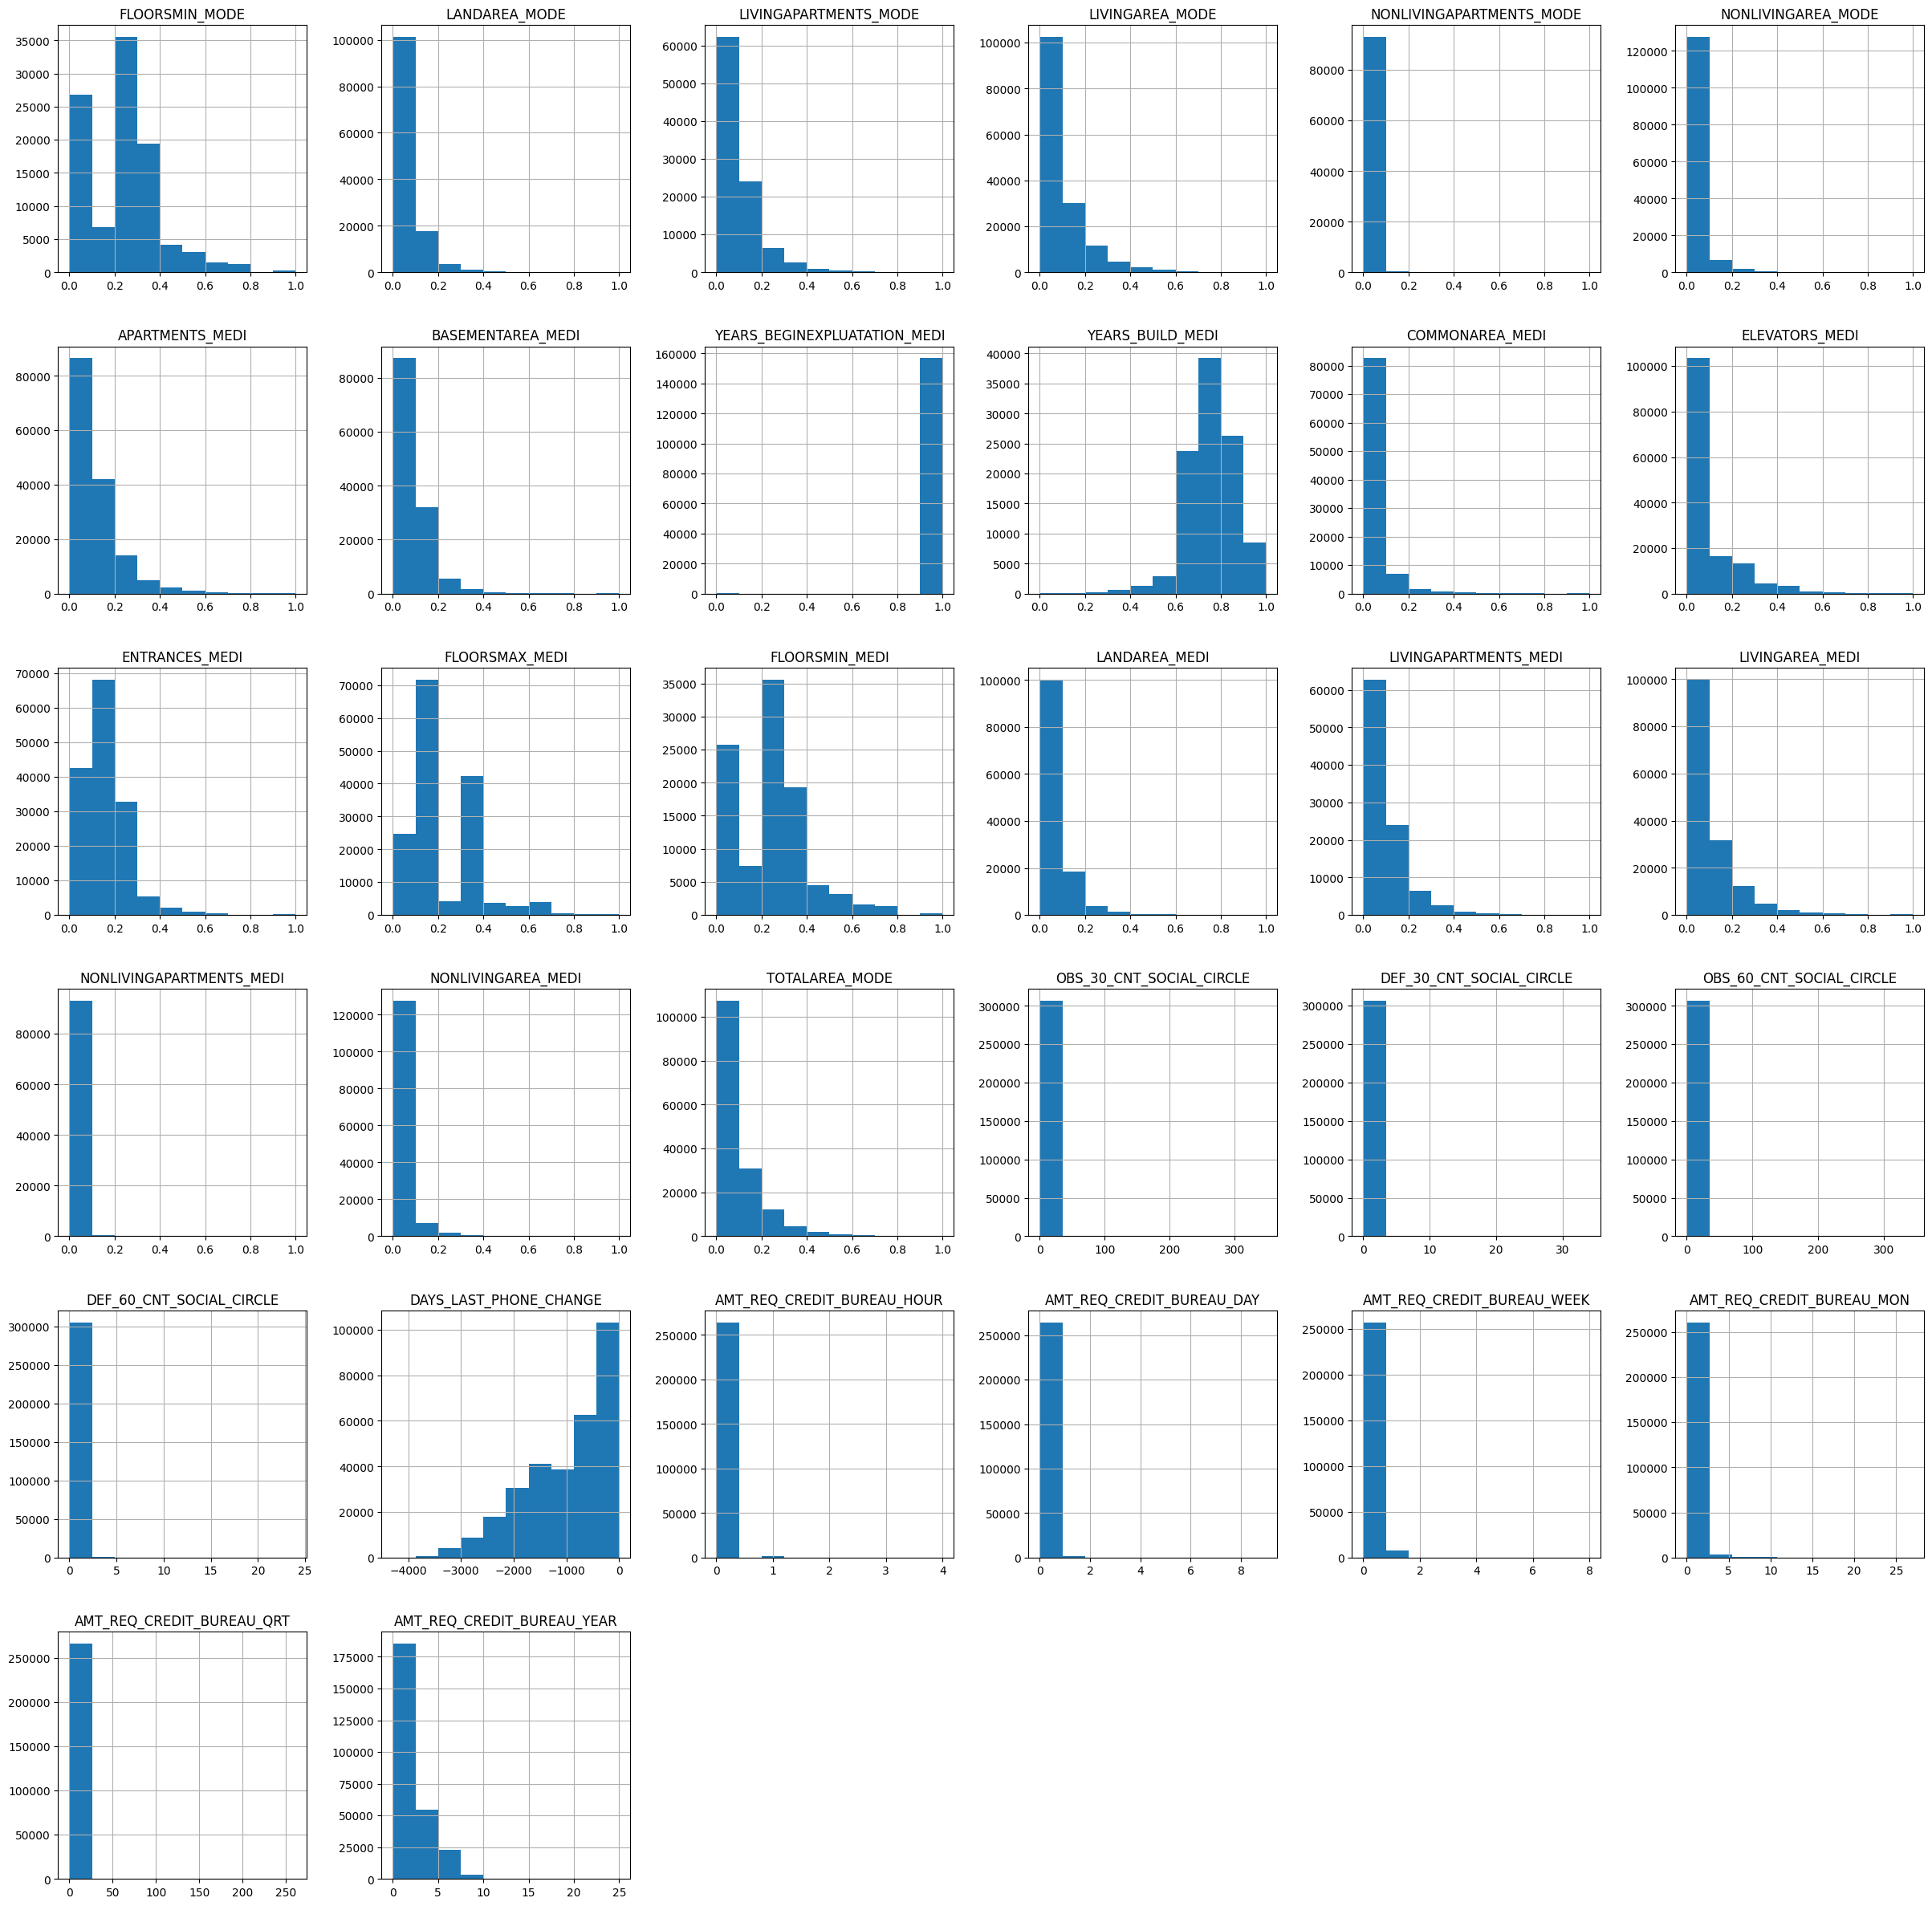

In [ ]:
df_float_2.hist(figsize=(30,30))

On remarque que la distribution des variables continue ne suivent pas une distribution gaussienne, il faudra donc leur appliquer certaines transformation. Il est important que les variables continues soient distribué selon une loi Normal car les Machine learning les modéliseront bien mieux de cette maniére.

In [ ]:
# Suppression de la colonne DAYS_LAST_PHONE_CHANGE car elle contient des valeurs négatifs
df_float_2.drop(['DAYS_LAST_PHONE_CHANGE'],axis=1,inplace=True)

In [ ]:
# Transformation racine quadratique
df_racine_quadratique = df_float_2.copy()
df_racine_quadratique = np.sqrt(np.sqrt(df_racine_quadratique))

array([[<Axes: title={'center': 'FLOORSMIN_MODE'}>,
        <Axes: title={'center': 'LANDAREA_MODE'}>,
        <Axes: title={'center': 'LIVINGAPARTMENTS_MODE'}>,
        <Axes: title={'center': 'LIVINGAREA_MODE'}>,
        <Axes: title={'center': 'NONLIVINGAPARTMENTS_MODE'}>,
        <Axes: title={'center': 'NONLIVINGAREA_MODE'}>],
       [<Axes: title={'center': 'APARTMENTS_MEDI'}>,
        <Axes: title={'center': 'BASEMENTAREA_MEDI'}>,
        <Axes: title={'center': 'YEARS_BEGINEXPLUATATION_MEDI'}>,
        <Axes: title={'center': 'YEARS_BUILD_MEDI'}>,
        <Axes: title={'center': 'COMMONAREA_MEDI'}>,
        <Axes: title={'center': 'ELEVATORS_MEDI'}>],
       [<Axes: title={'center': 'ENTRANCES_MEDI'}>,
        <Axes: title={'center': 'FLOORSMAX_MEDI'}>,
        <Axes: title={'center': 'FLOORSMIN_MEDI'}>,
        <Axes: title={'center': 'LANDAREA_MEDI'}>,
        <Axes: title={'center': 'LIVINGAPARTMENTS_MEDI'}>,
        <Axes: title={'center': 'LIVINGAREA_MEDI'}>],
       [<Axe

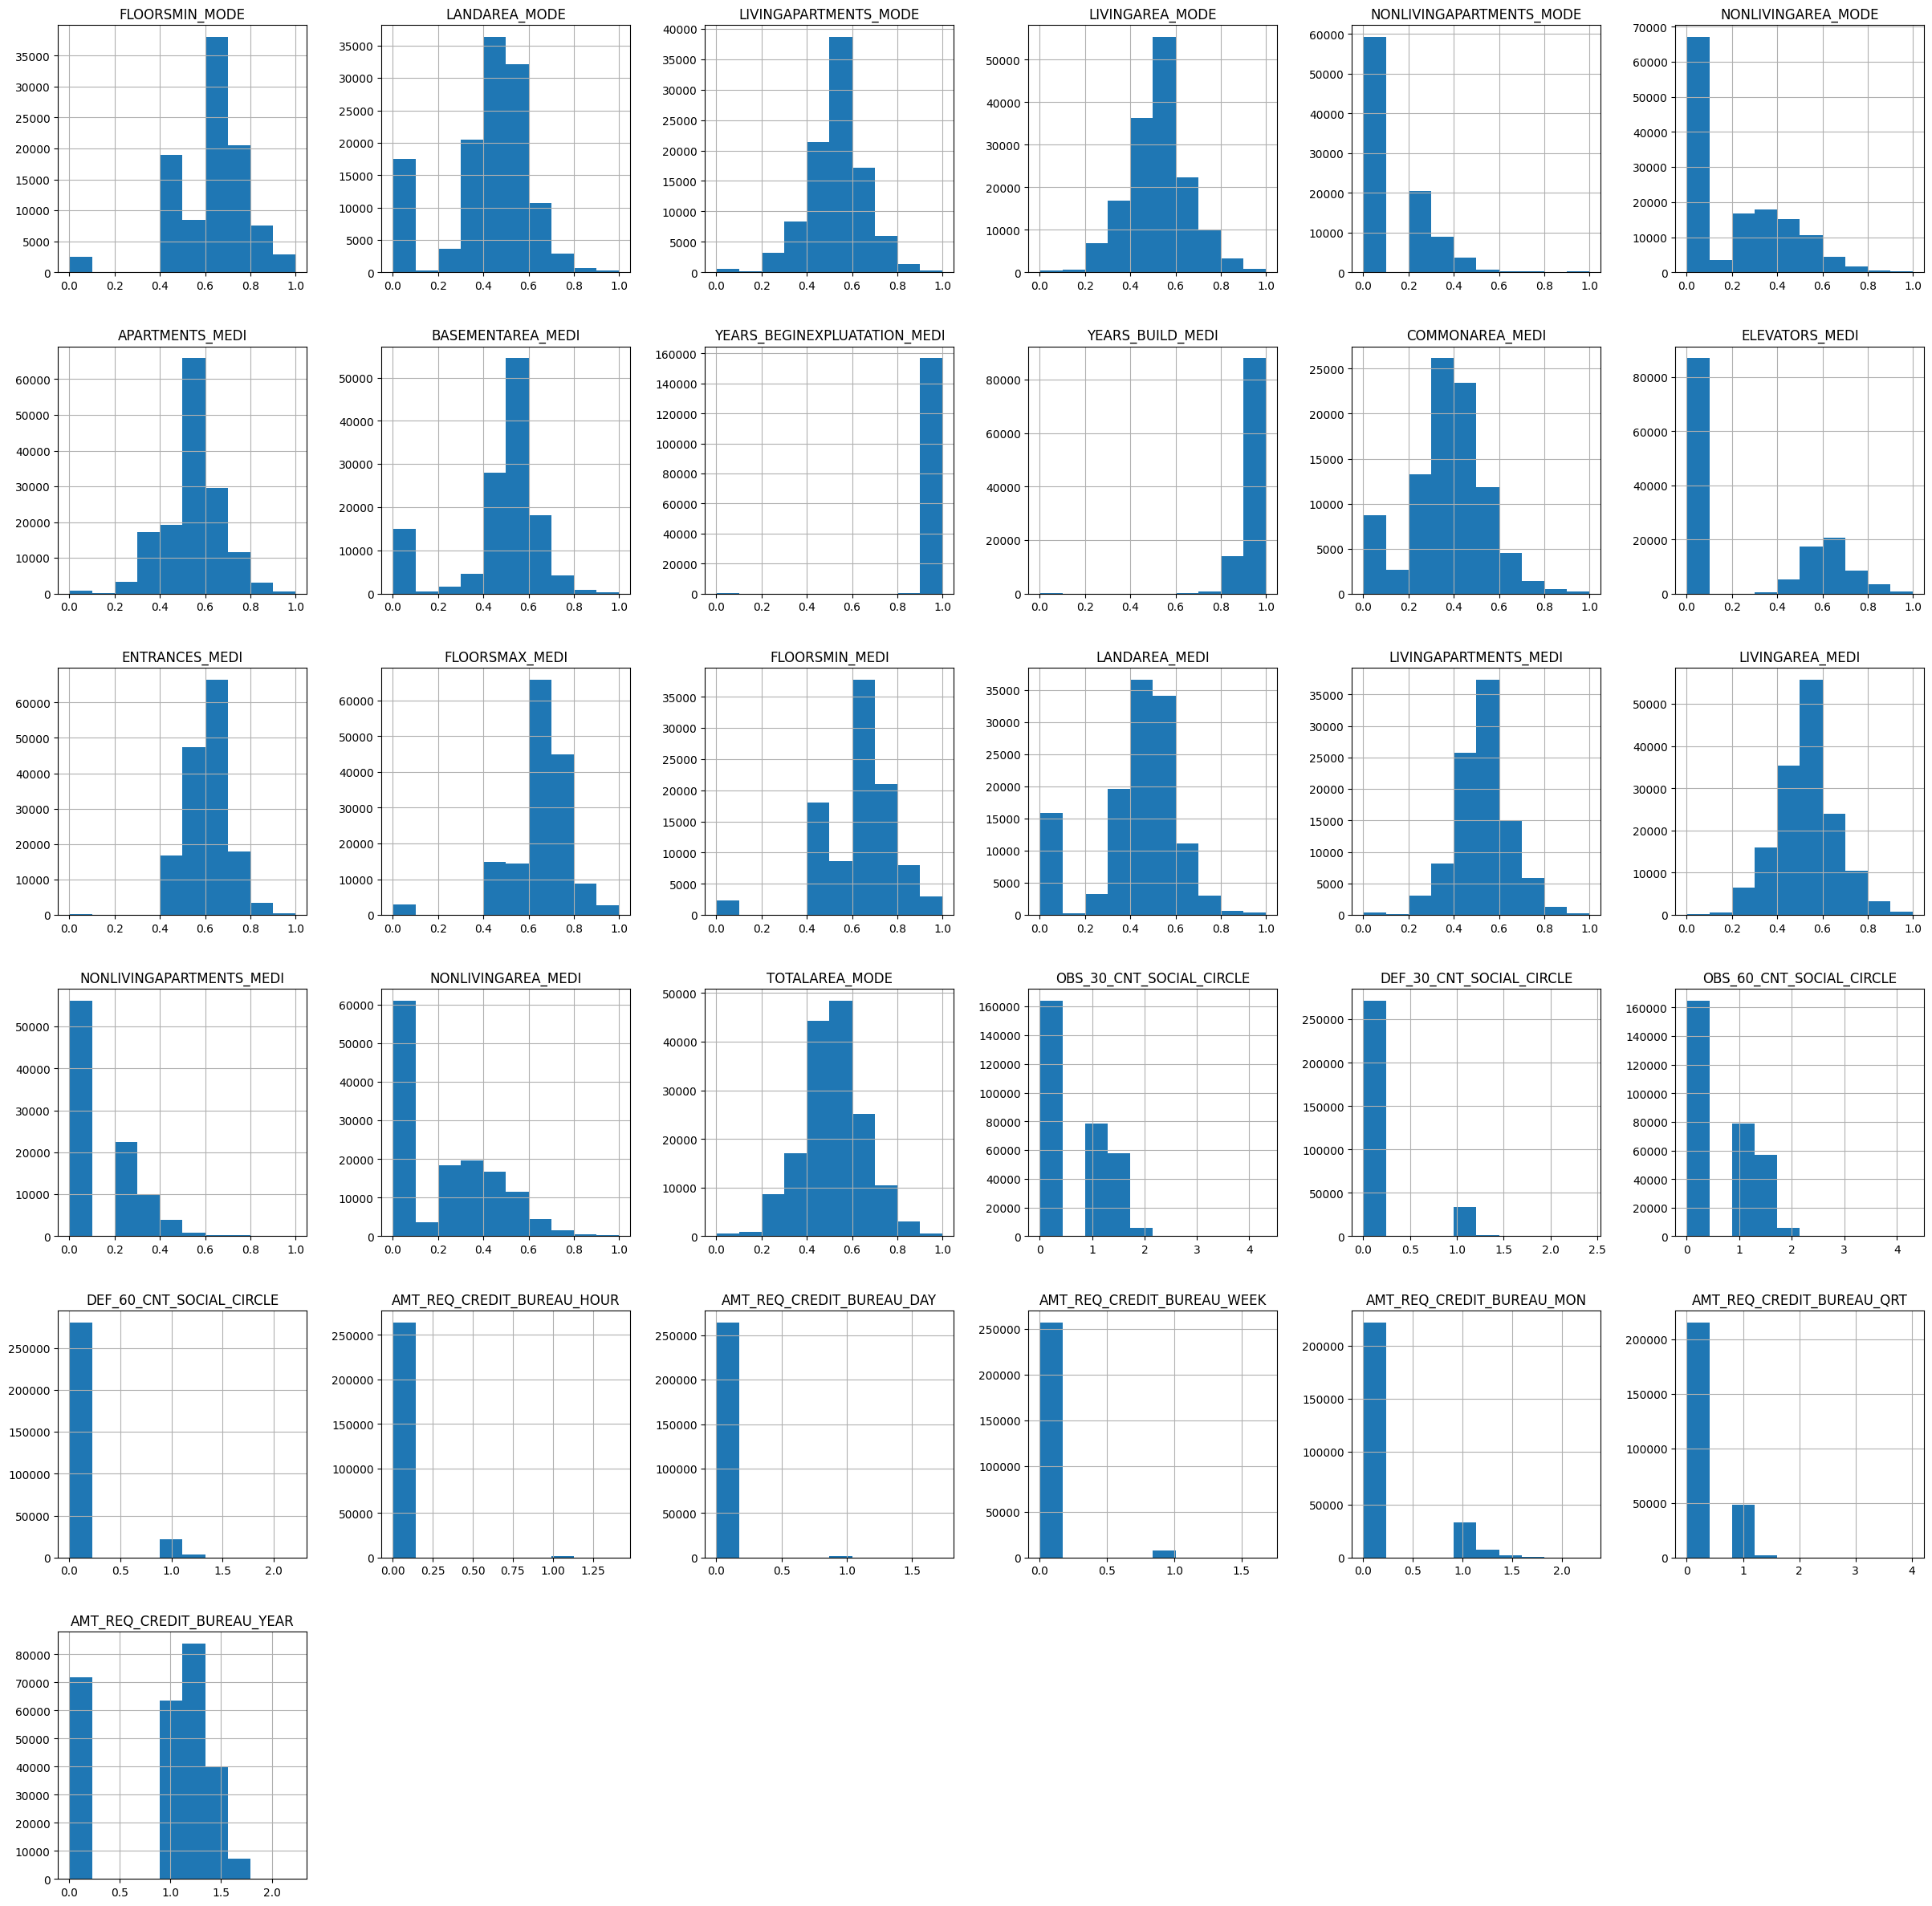

In [ ]:
# Affichage
df_racine_quadratique.hist(figsize=(30,30))

### Outliers partie 1

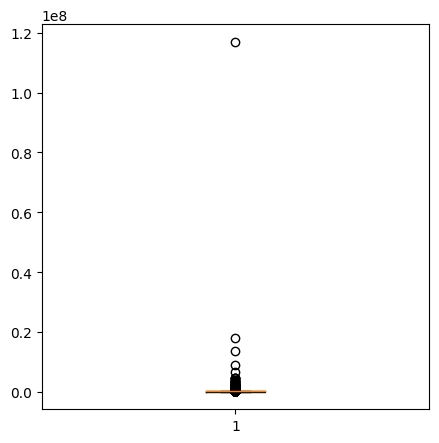

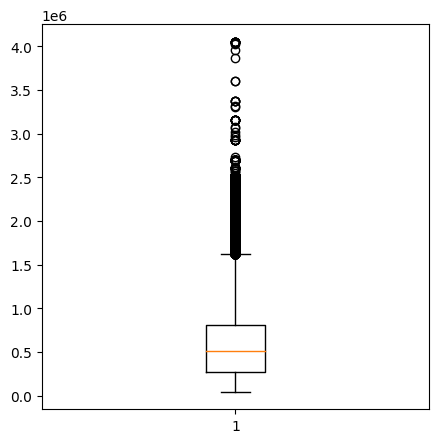

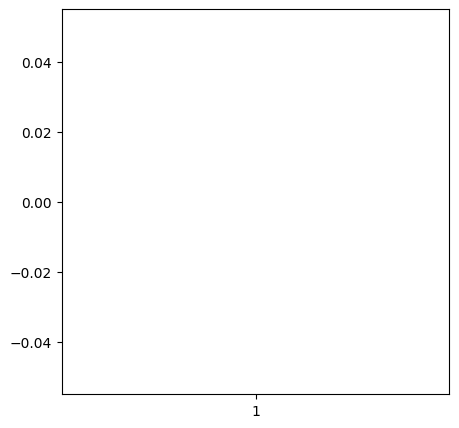

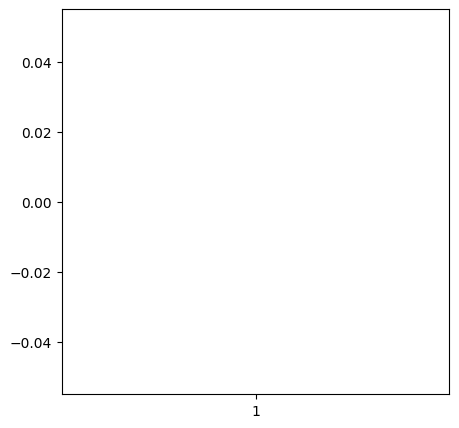

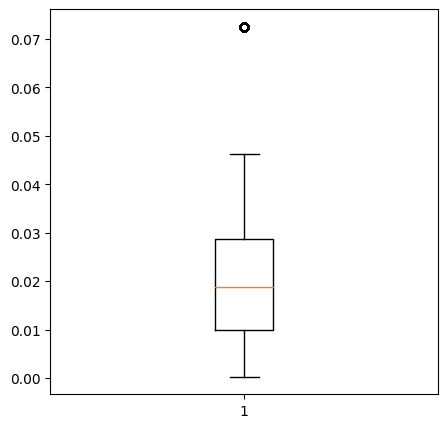

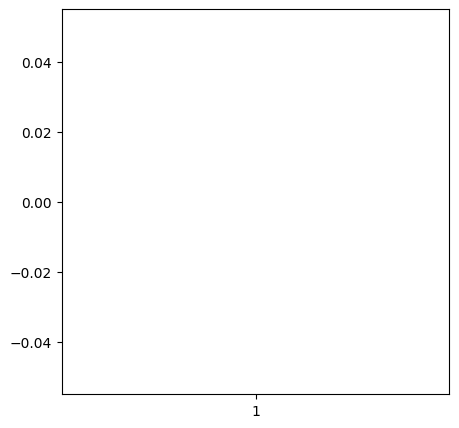

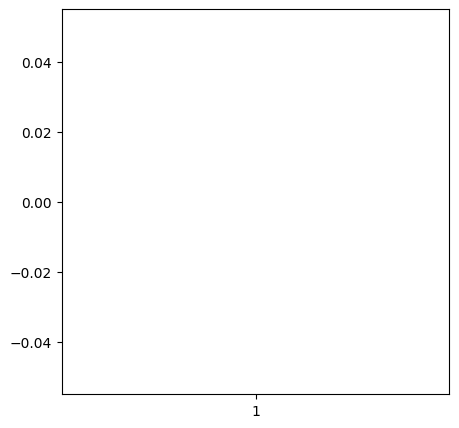

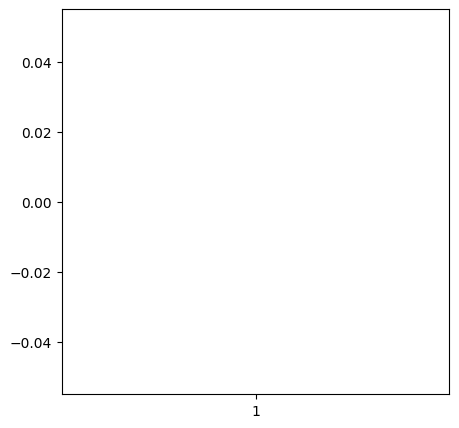

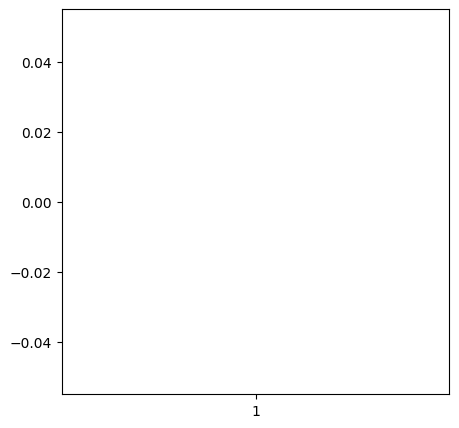

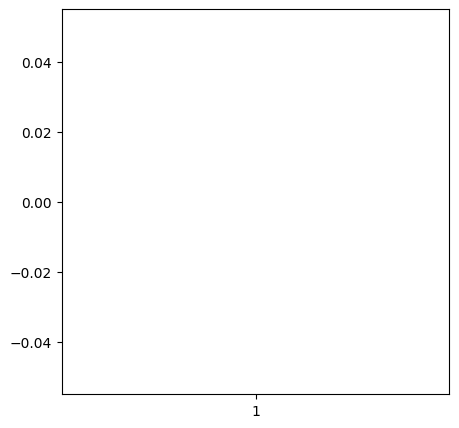

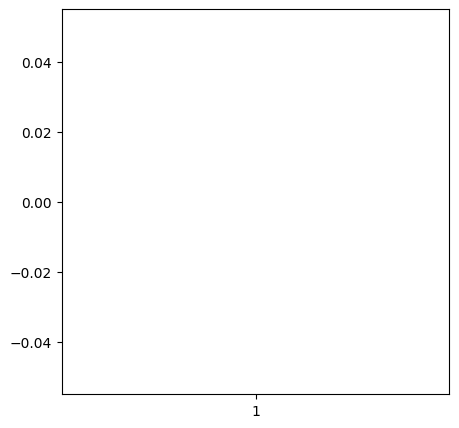

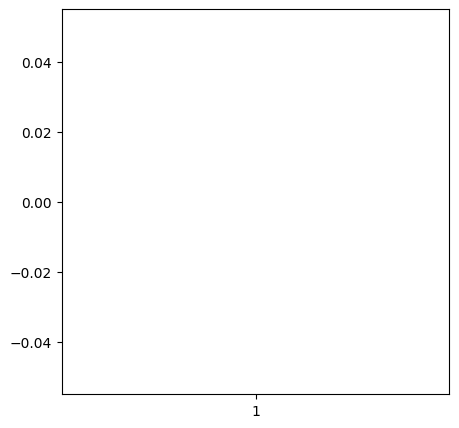

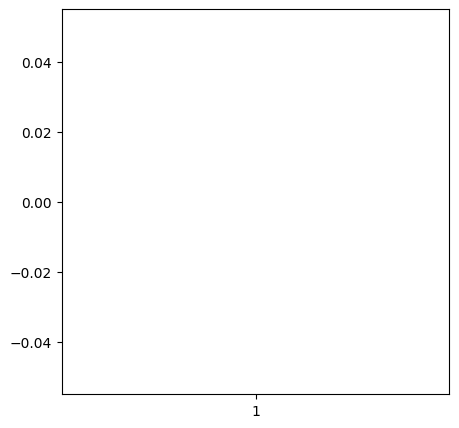

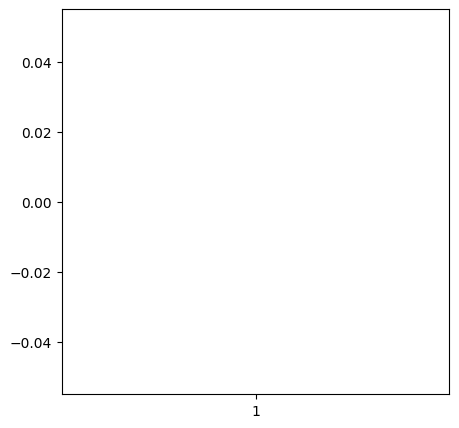

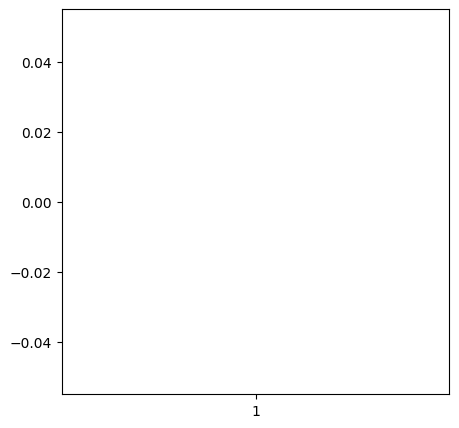

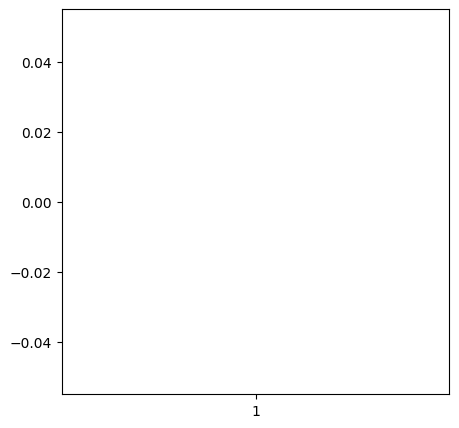

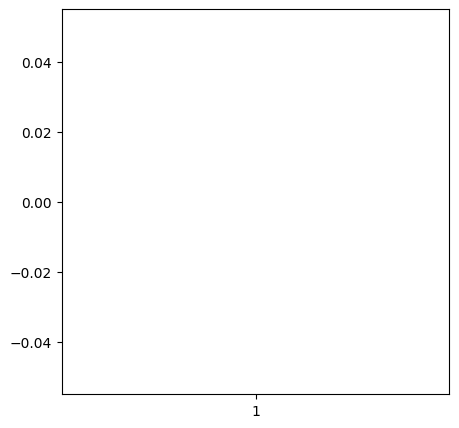

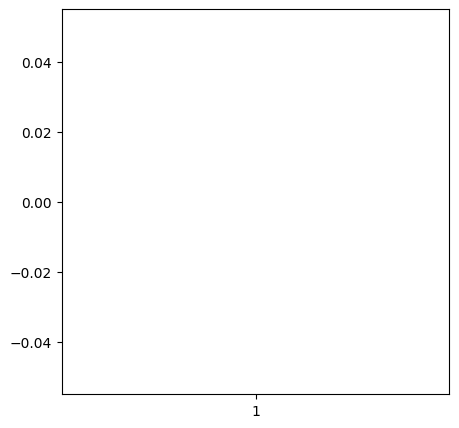

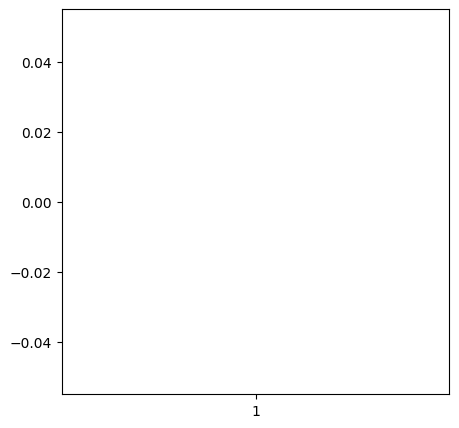

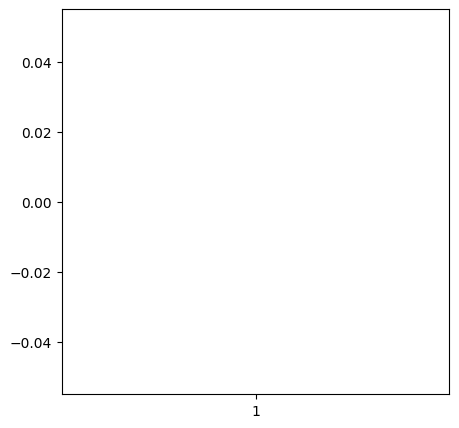

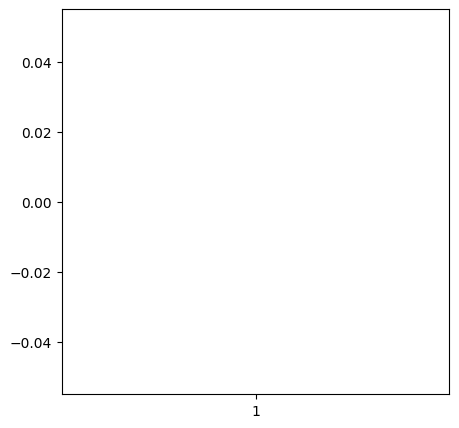

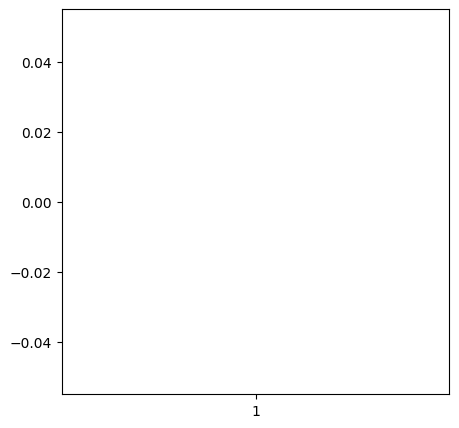

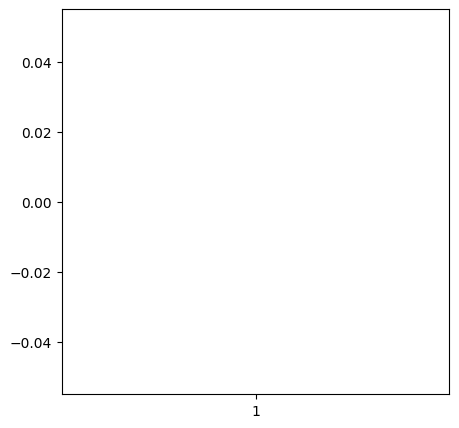

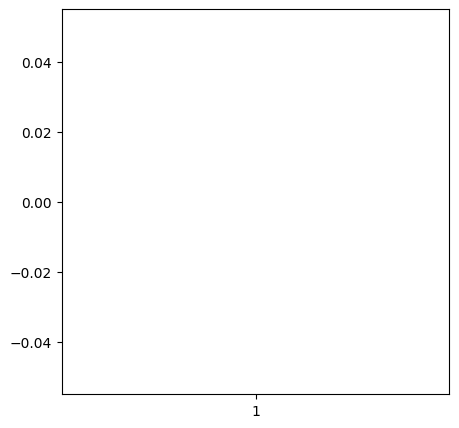

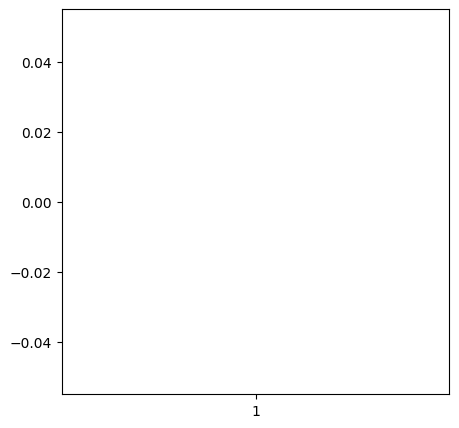

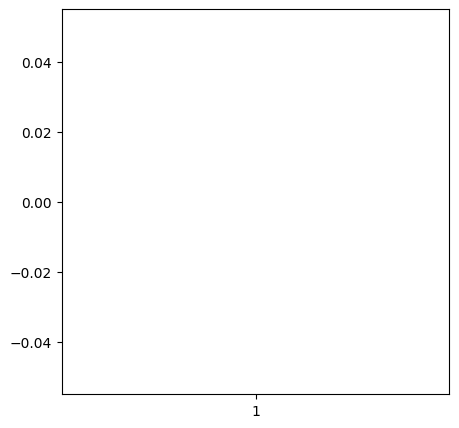

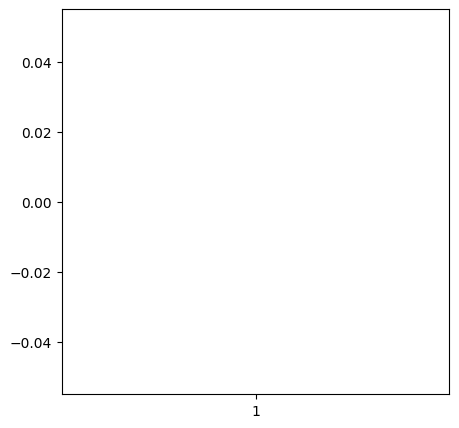

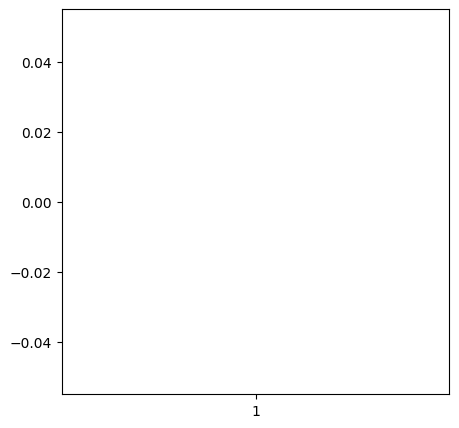

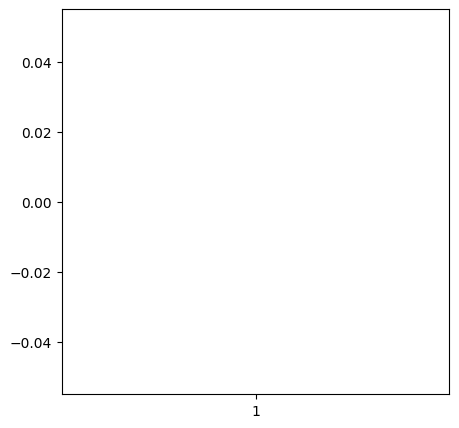

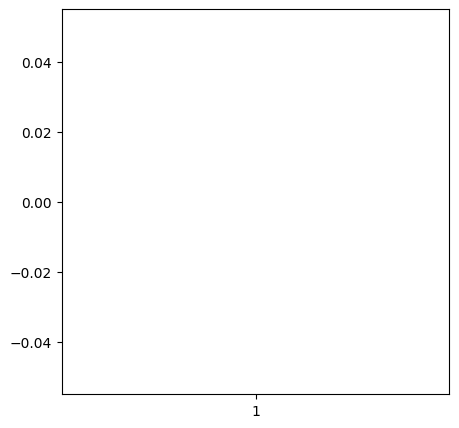

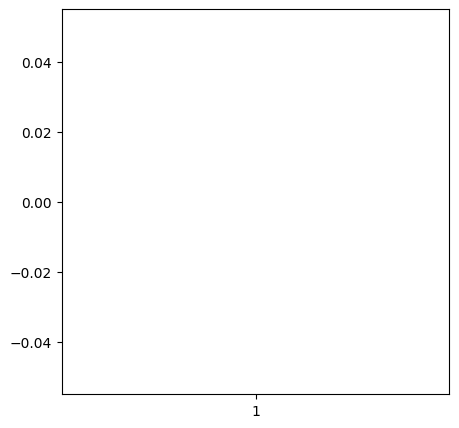

In [ ]:
for element in df_float_1.columns:
  plt.figure(figsize=(5,5))
  plt.boxplot(df_float_1[element])

On remarque que nous ne pouvons pas afficher la majorité des boxplots, cela est sûrement dûe à la présense de valeurs manquante (NaN) dans le dataset

In [ ]:
# Vérification des valeurs manquantes (En pourcentage)
(df_float_1.isnull().sum() / df_float_1.shape[0]) * 100

AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
REGION_POPULATION_RELATIVE       0.000000
OWN_CAR_AGE                     65.990810
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55

In [ ]:
# Remplacer les valeurs manquantes par la médiane des valeurs non manquantes
df_float_1.fillna(df_float_1.median(),inplace=True)

In [ ]:
# Vérification des valeurs manquantes (En pourcentage)
(df_float_1.isnull().sum() / df_float_1.shape[0]) * 100

AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
REGION_POPULATION_RELATIVE      0.0
OWN_CAR_AGE                     0.0
CNT_FAM_MEMBERS                 0.0
EXT_SOURCE_1                    0.0
EXT_SOURCE_2                    0.0
EXT_SOURCE_3                    0.0
APARTMENTS_AVG                  0.0
BASEMENTAREA_AVG                0.0
YEARS_BEGINEXPLUATATION_AVG     0.0
YEARS_BUILD_AVG                 0.0
COMMONAREA_AVG                  0.0
ELEVATORS_AVG                   0.0
ENTRANCES_AVG                   0.0
FLOORSMAX_AVG                   0.0
FLOORSMIN_AVG                   0.0
LANDAREA_AVG                    0.0
LIVINGAPARTMENTS_AVG            0.0
LIVINGAREA_AVG                  0.0
NONLIVINGAPARTMENTS_AVG         0.0
NONLIVINGAREA_AVG               0.0
APARTMENTS_MODE                 0.0
BASEMENTAREA_MODE               0.0
YEARS_BEGINEXPLUATATION_MODE    0.0
YEARS_BUILD_MODE            

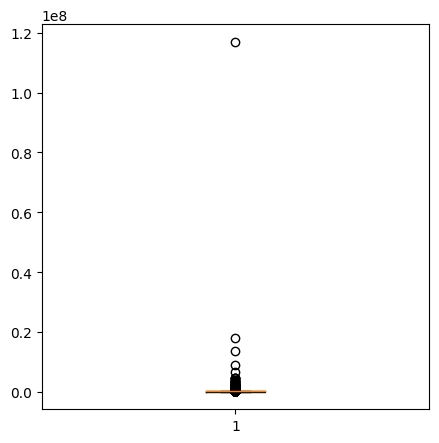

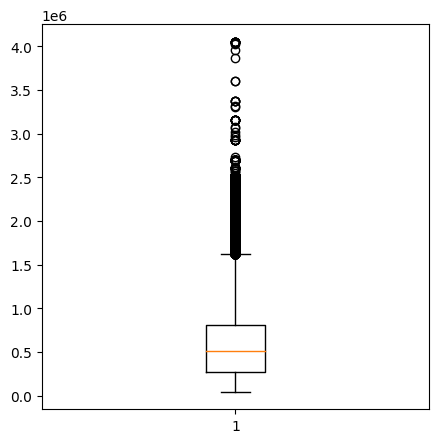

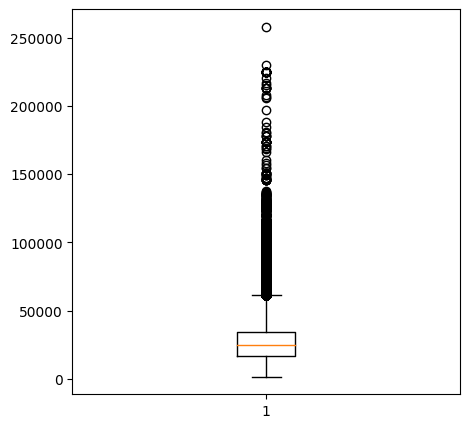

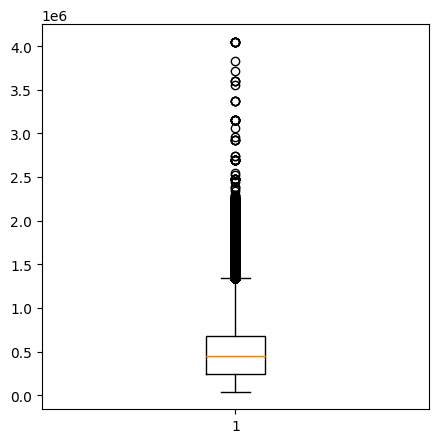

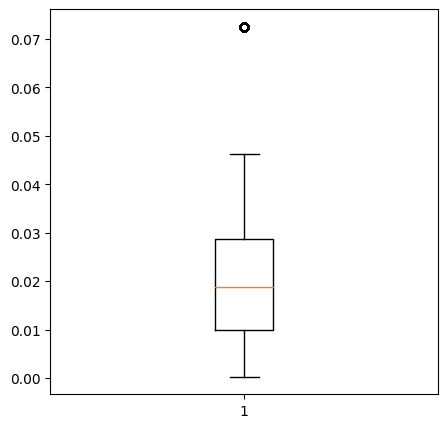

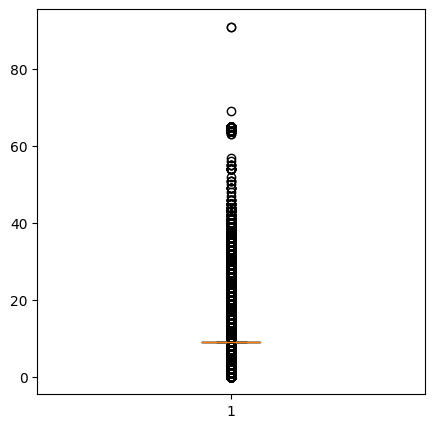

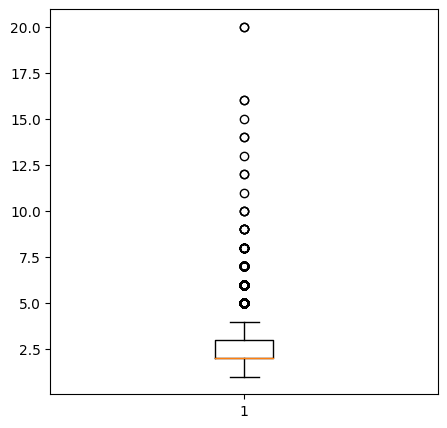

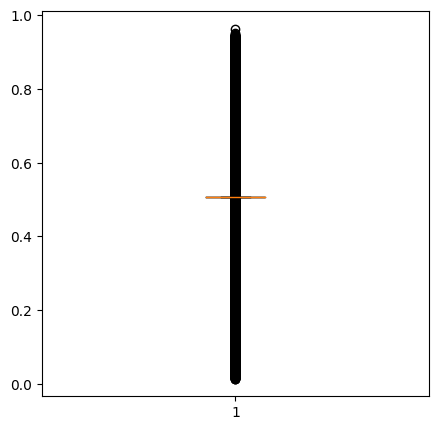

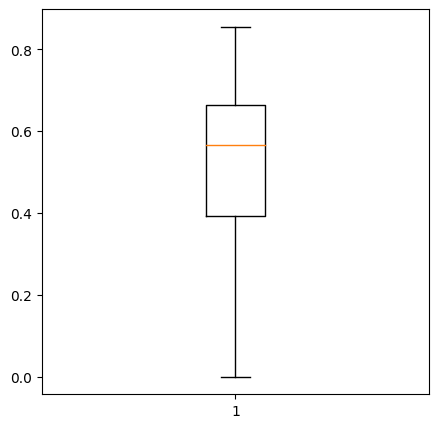

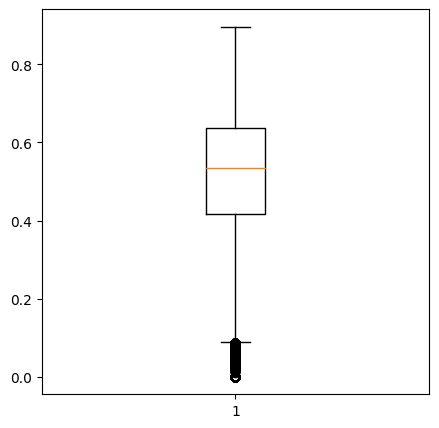

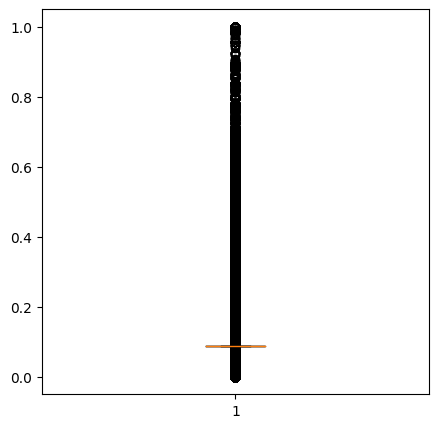

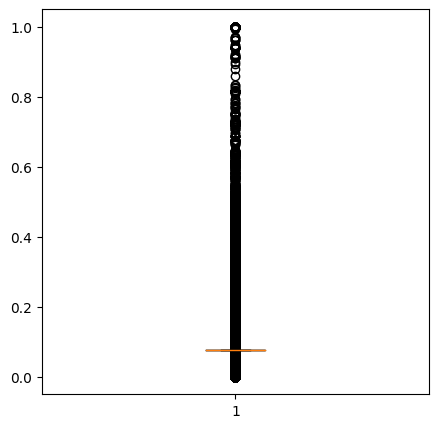

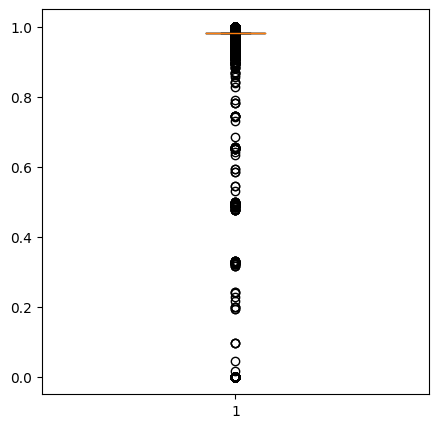

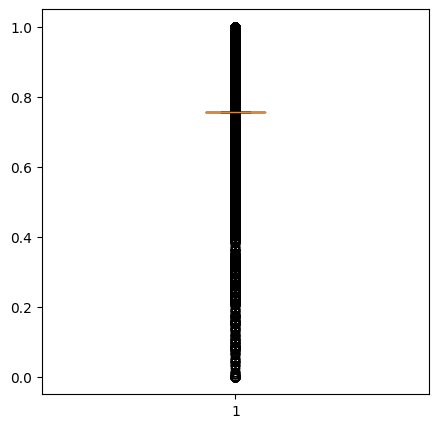

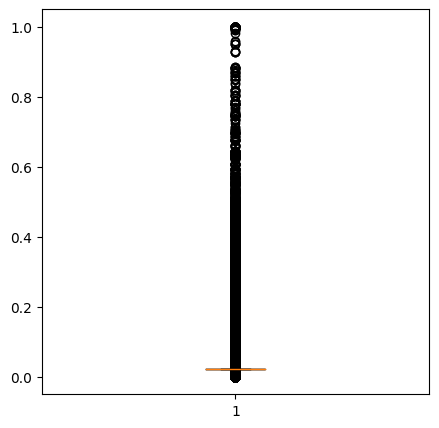

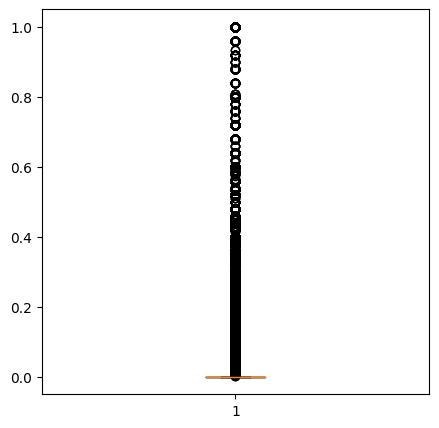

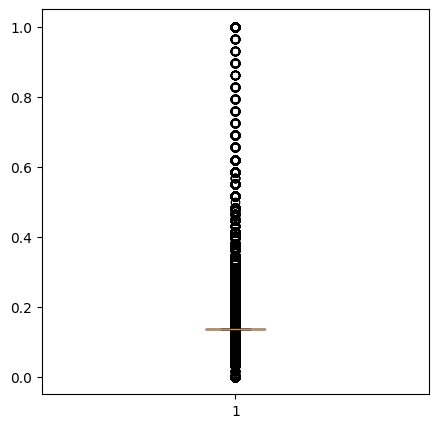

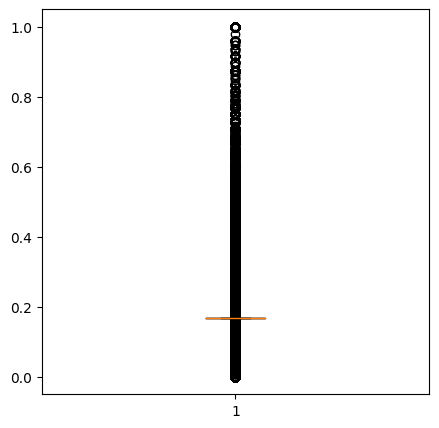

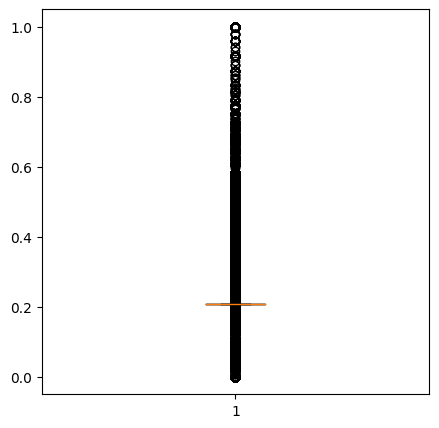

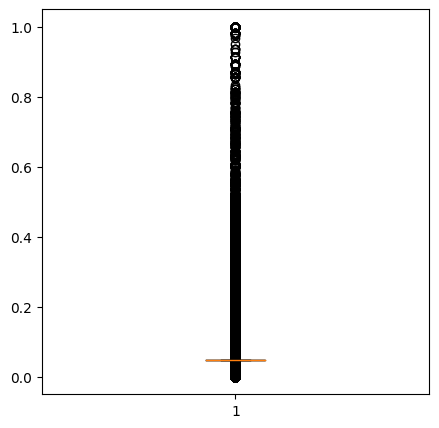

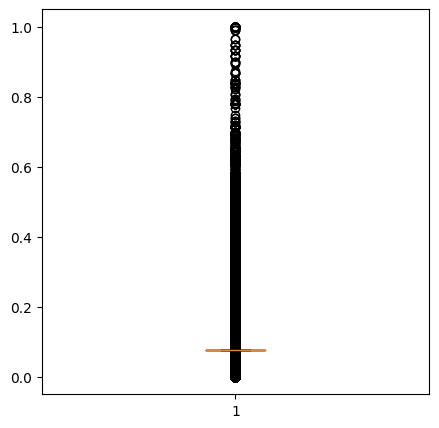

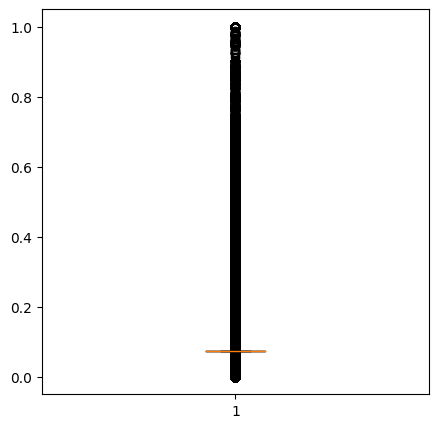

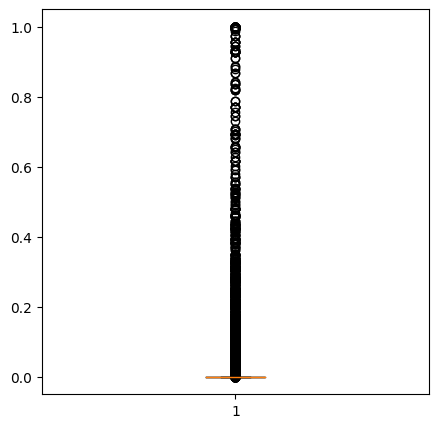

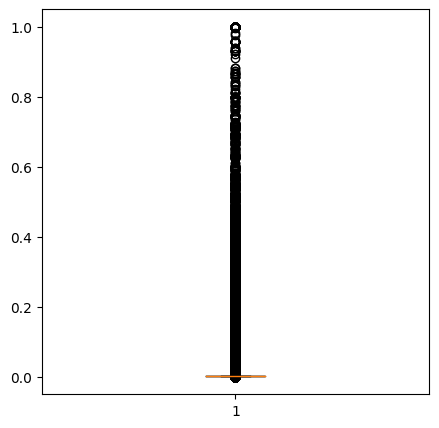

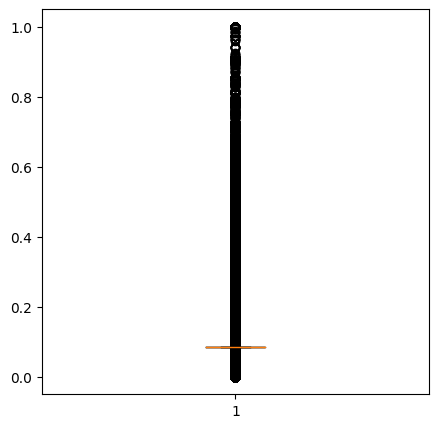

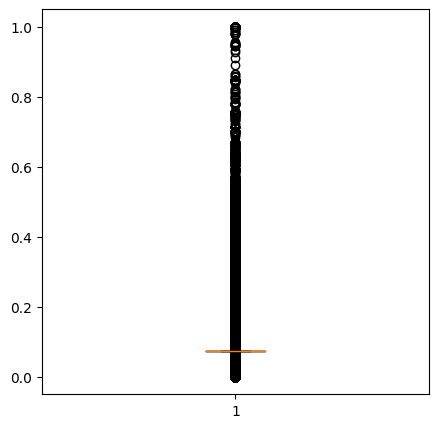

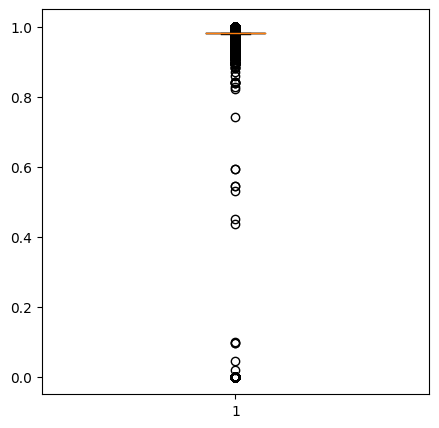

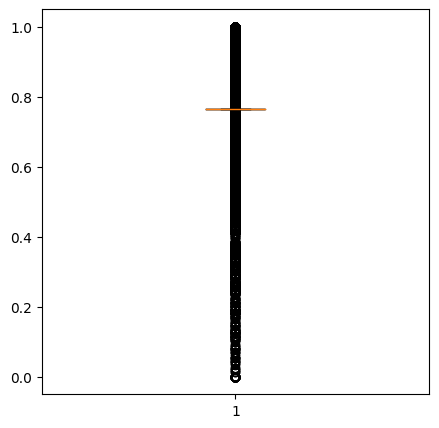

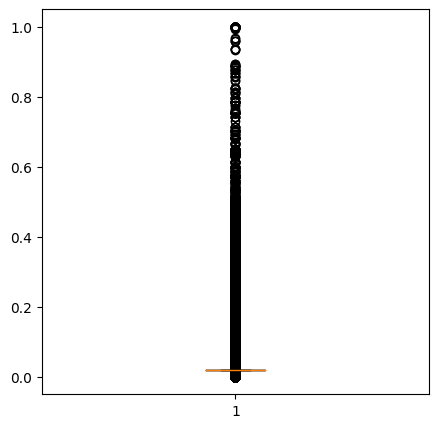

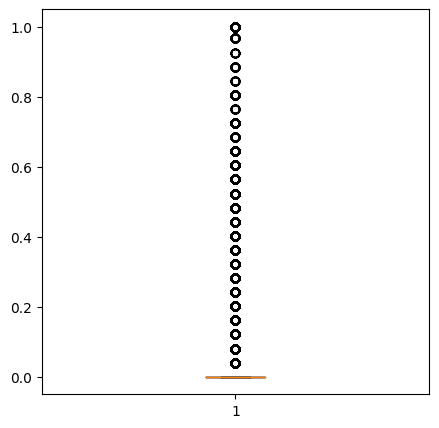

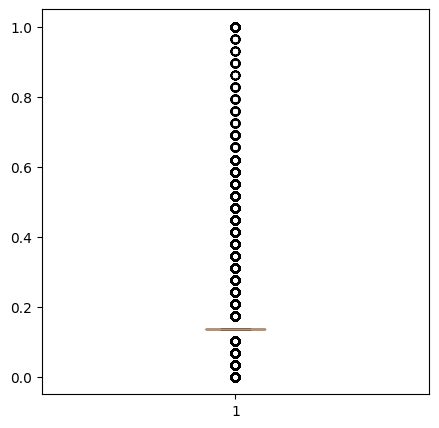

In [ ]:
for element in df_float_1.columns:
  plt.figure(figsize=(5,5))
  plt.boxplot(df_float_1[element])

On dispose de trois techniques efficaces pour la suppressions des outliers 🇰

- Méthode de la distance interquartile : cette méthode utilise la distance interquartile (DIQ) pour identifier les valeurs aberrantes. La DIQ est définie comme la différence entre le troisième et le premier quartile de la distribution. Les valeurs qui sont situées à plus de 1,5 fois la DIQ en dessous du premier quartile ou au-dessus du troisième quartile sont considérées comme des outliers et sont supprimées.

- Méthode des seuils : cette méthode consiste à définir des seuils supérieurs et inférieurs en fonction des valeurs extrêmes de la variable. Toutes les valeurs qui dépassent ces seuils sont considérées comme des outliers et sont supprimées de l'ensemble de données.

- Méthode de la moyenne et de l'écart-type : cette méthode utilise la moyenne et l'écart-type de la distribution pour identifier les outliers. Les valeurs qui sont situées à plus de trois fois l'écart-type au-dessus ou en dessous de la moyenne sont considérées comme des outliers et sont supprimées.

### Outliers partie 2

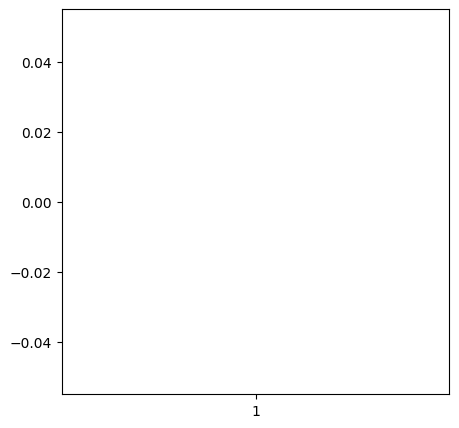

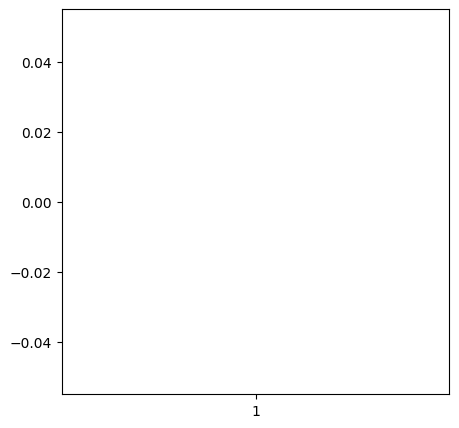

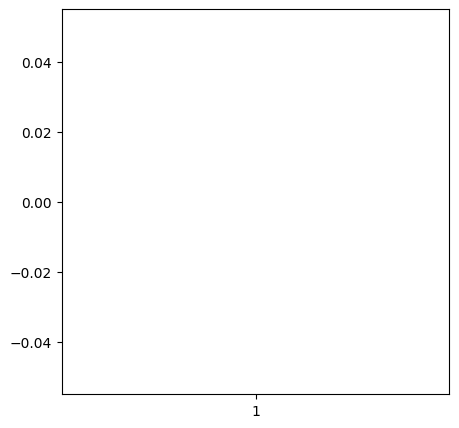

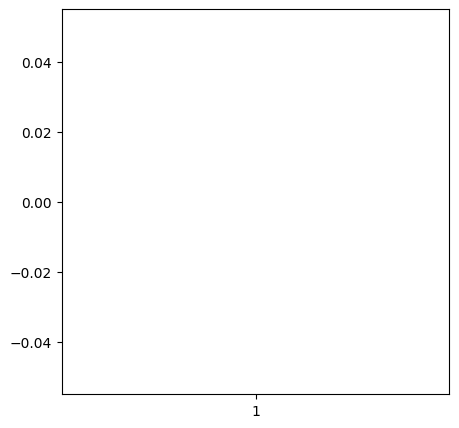

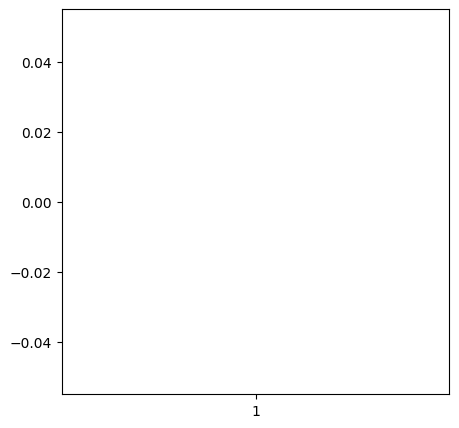

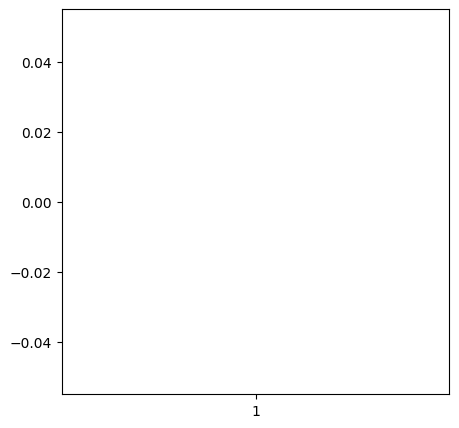

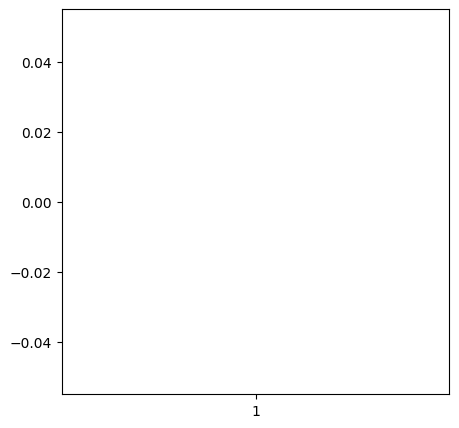

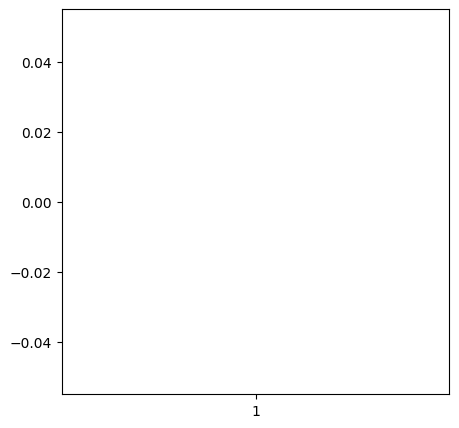

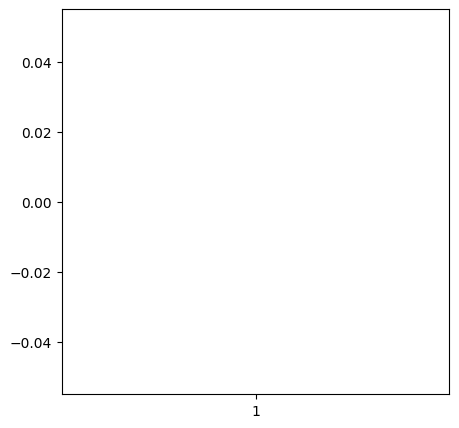

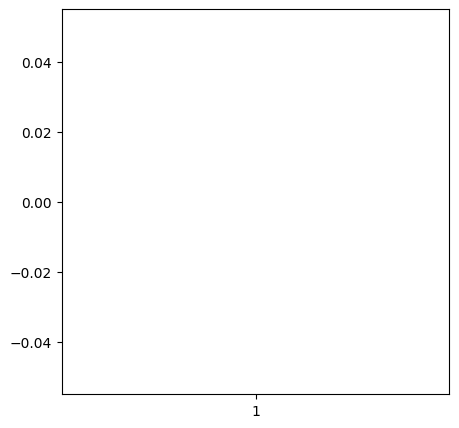

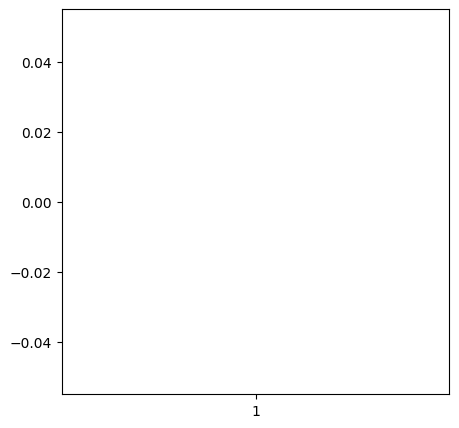

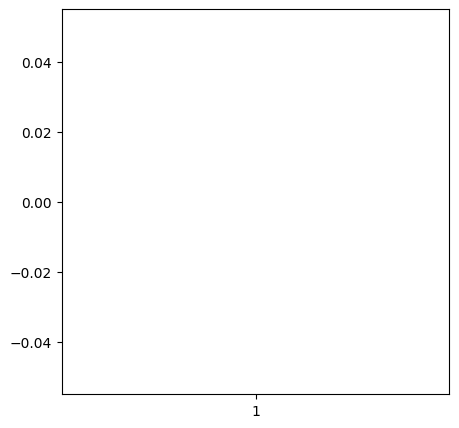

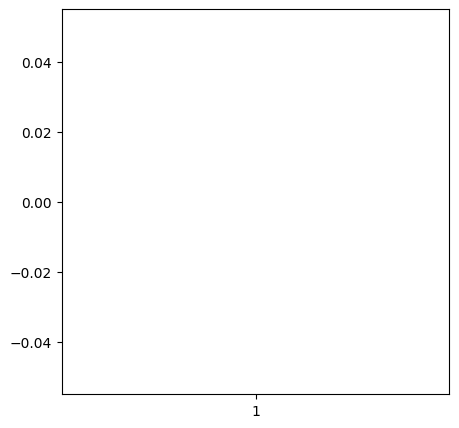

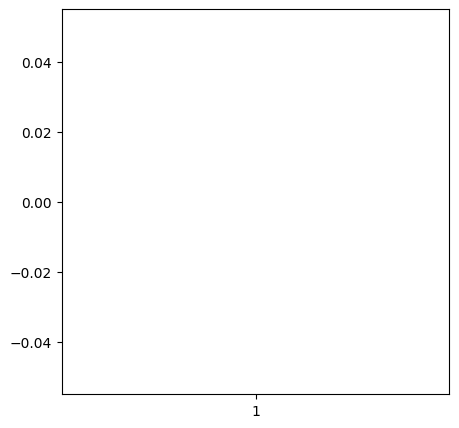

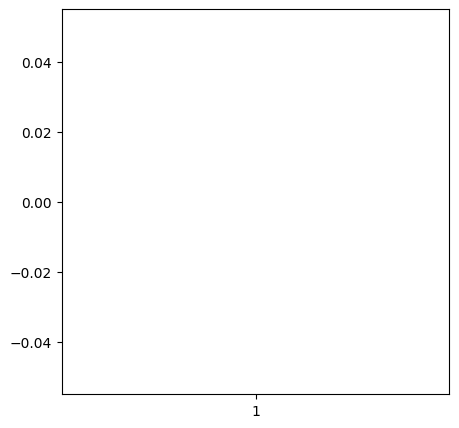

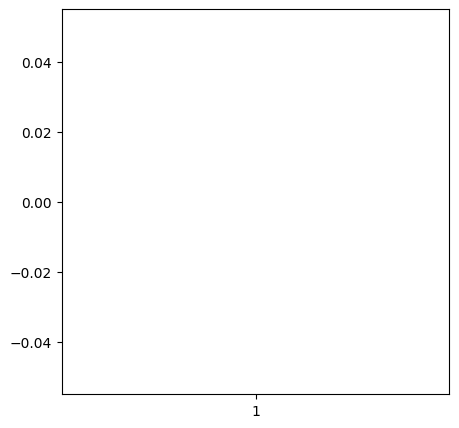

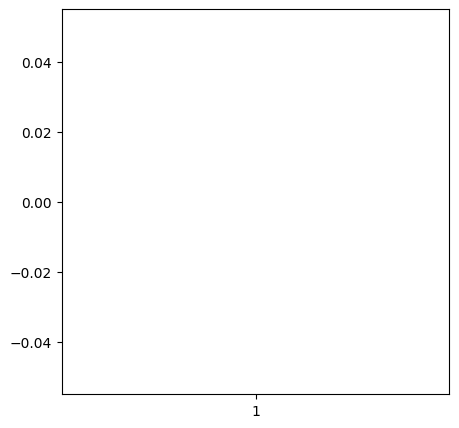

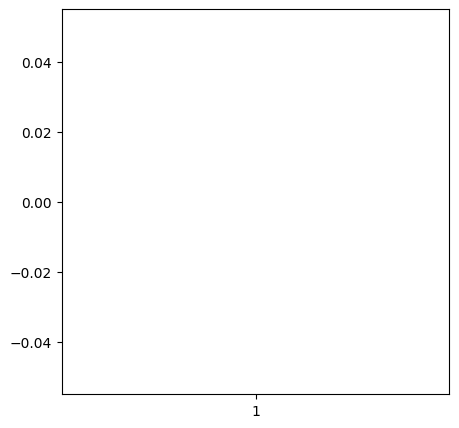

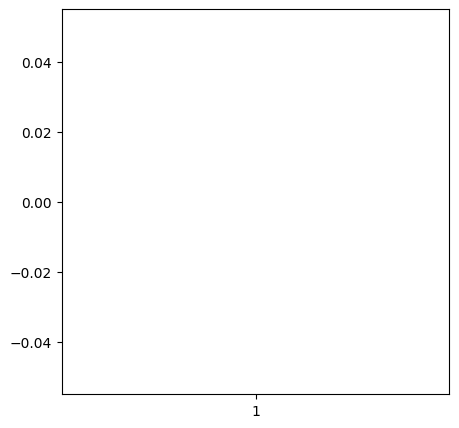

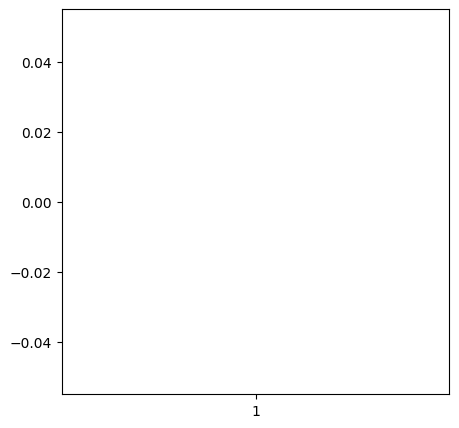

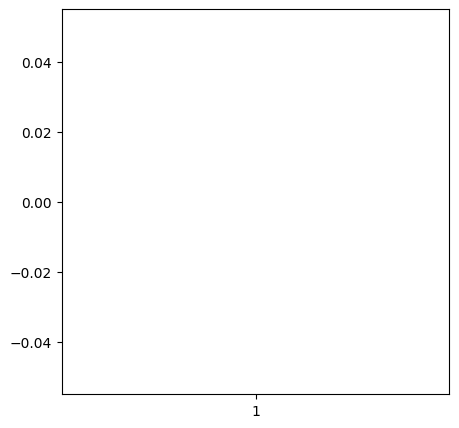

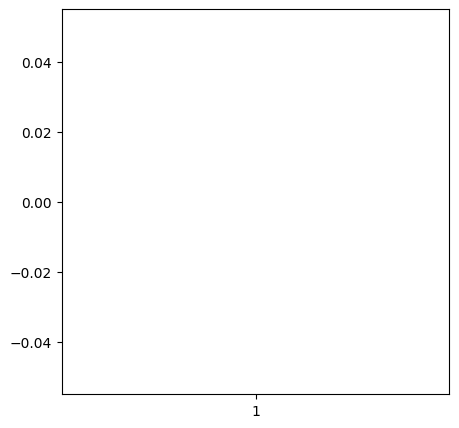

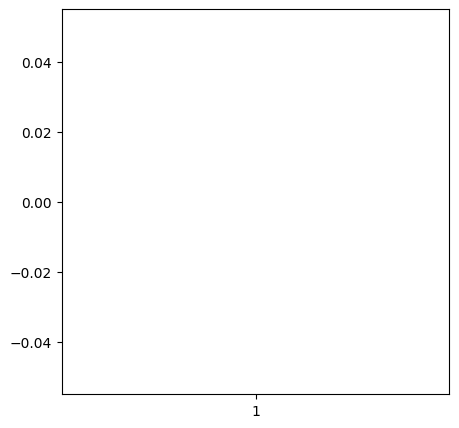

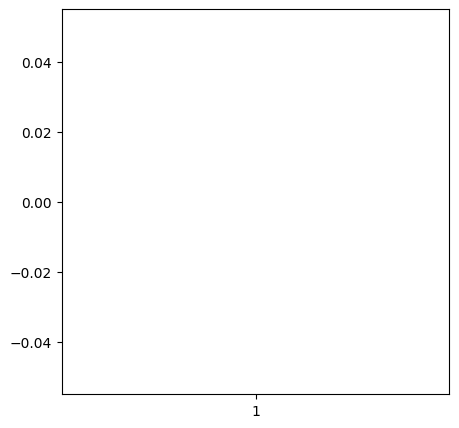

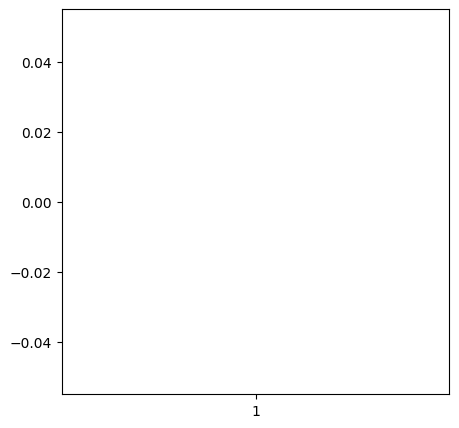

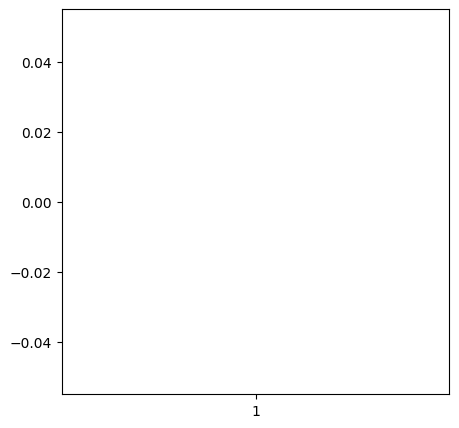

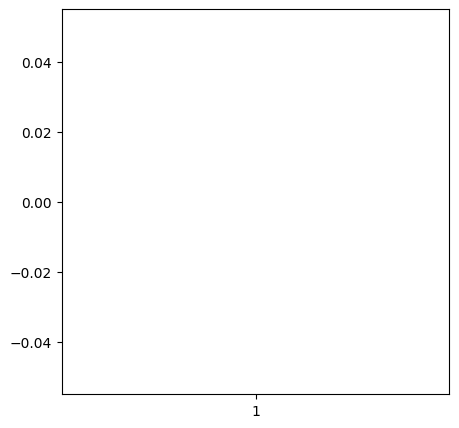

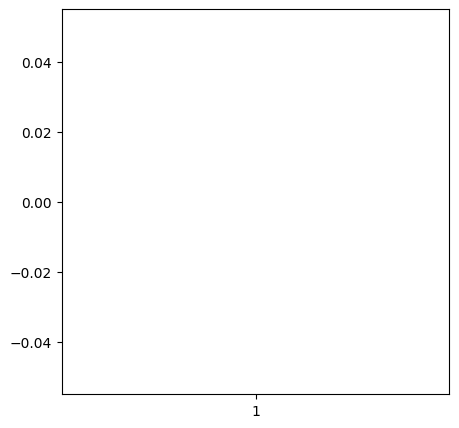

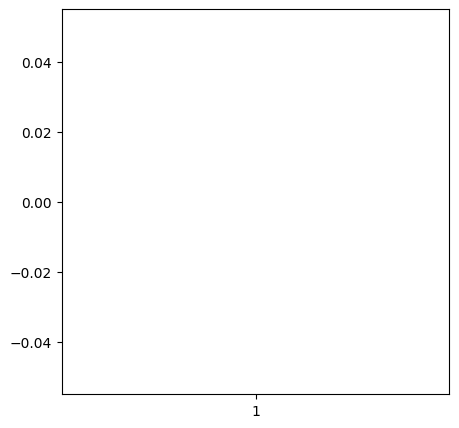

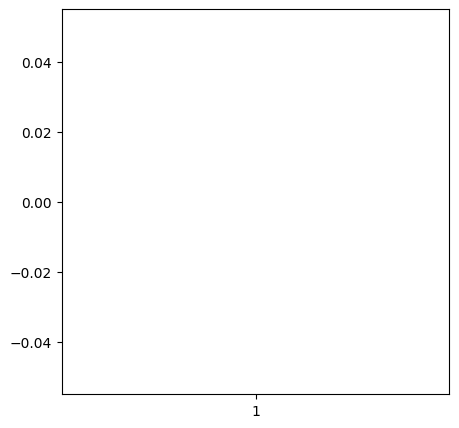

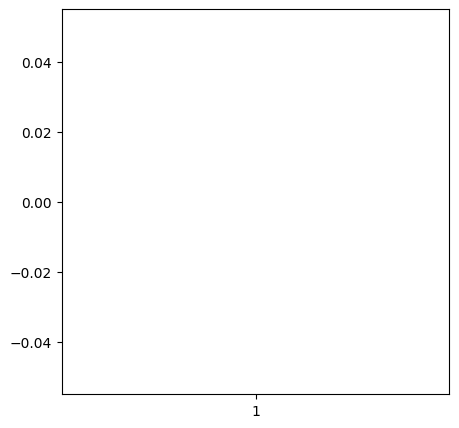

In [ ]:
for element in df_float_2.columns:
  plt.figure(figsize=(5,5))
  plt.boxplot(df_float_2[element])

Même probléme que le cas précédent. Il va falloir traiter les valeurs manquantes.

In [ ]:
# Vérification des valeurs manquantes (En pourcentage)
(df_float_2.isnull().sum() / df_float_2.shape[0]) * 100

FLOORSMIN_MODE                  67.848630
LANDAREA_MODE                   59.376738
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAREA_MODE                 50.193326
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAREA_MODE              55.179164
APARTMENTS_MEDI                 50.749729
BASEMENTAREA_MEDI               58.515956
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BUILD_MEDI                66.497784
COMMONAREA_MEDI                 69.872297
ELEVATORS_MEDI                  53.295980
ENTRANCES_MEDI                  50.348768
FLOORSMAX_MEDI                  49.760822
FLOORSMIN_MEDI                  67.848630
LANDAREA_MEDI                   59.376738
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAREA_MEDI                 50.193326
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAREA_MEDI              55.179164
TOTALAREA_MODE                  48.268517
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0

In [ ]:
# Remplacer les valeurs manquantes par la médiane des valeurs non manquantes
df_float_2.fillna(df_float_2.median(),inplace=True)

In [ ]:
# Vérification des valeurs manquantes (En pourcentage)
(df_float_2.isnull().sum() / df_float_2.shape[0]) * 100

FLOORSMIN_MODE                  0.0
LANDAREA_MODE                   0.0
LIVINGAPARTMENTS_MODE           0.0
LIVINGAREA_MODE                 0.0
NONLIVINGAPARTMENTS_MODE        0.0
NONLIVINGAREA_MODE              0.0
APARTMENTS_MEDI                 0.0
BASEMENTAREA_MEDI               0.0
YEARS_BEGINEXPLUATATION_MEDI    0.0
YEARS_BUILD_MEDI                0.0
COMMONAREA_MEDI                 0.0
ELEVATORS_MEDI                  0.0
ENTRANCES_MEDI                  0.0
FLOORSMAX_MEDI                  0.0
FLOORSMIN_MEDI                  0.0
LANDAREA_MEDI                   0.0
LIVINGAPARTMENTS_MEDI           0.0
LIVINGAREA_MEDI                 0.0
NONLIVINGAPARTMENTS_MEDI        0.0
NONLIVINGAREA_MEDI              0.0
TOTALAREA_MODE                  0.0
OBS_30_CNT_SOCIAL_CIRCLE        0.0
DEF_30_CNT_SOCIAL_CIRCLE        0.0
OBS_60_CNT_SOCIAL_CIRCLE        0.0
DEF_60_CNT_SOCIAL_CIRCLE        0.0
AMT_REQ_CREDIT_BUREAU_HOUR      0.0
AMT_REQ_CREDIT_BUREAU_DAY       0.0
AMT_REQ_CREDIT_BUREAU_WEEK  

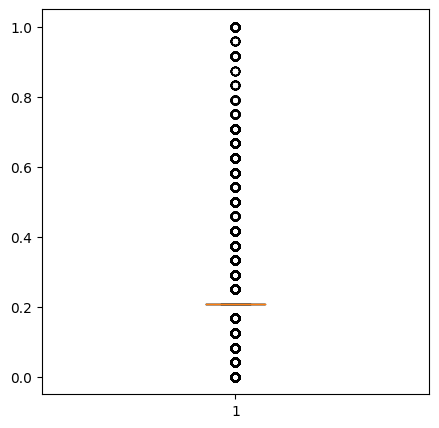

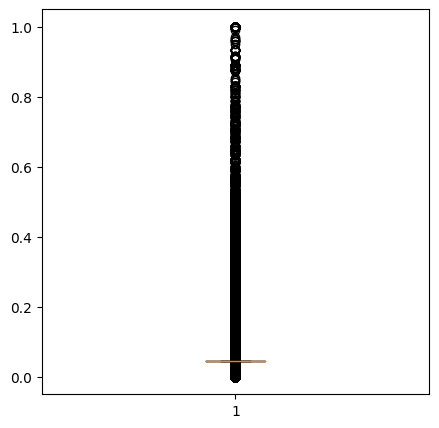

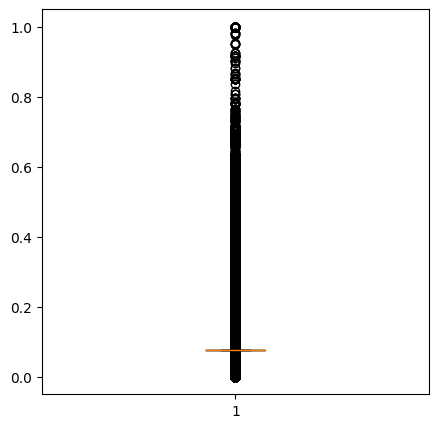

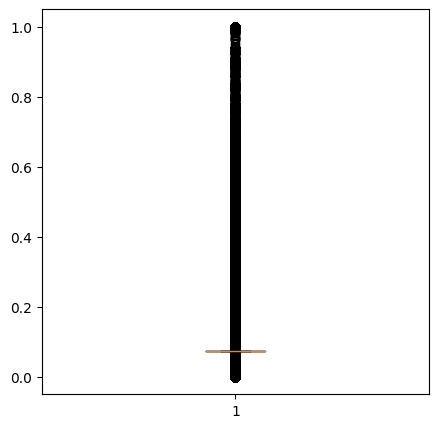

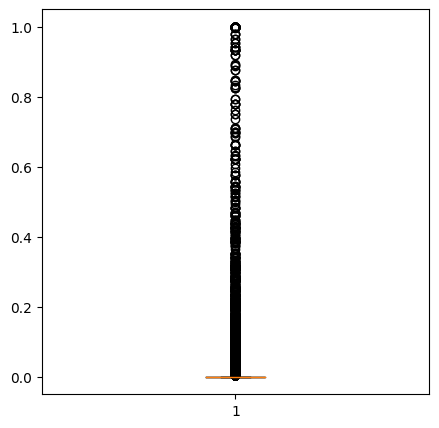

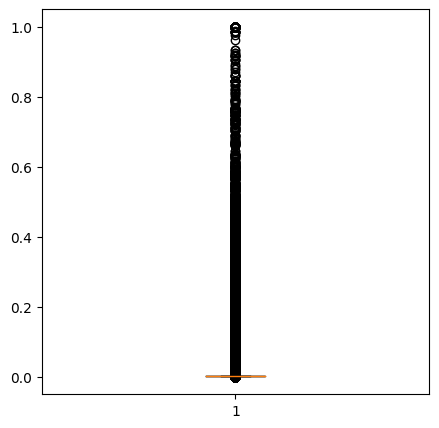

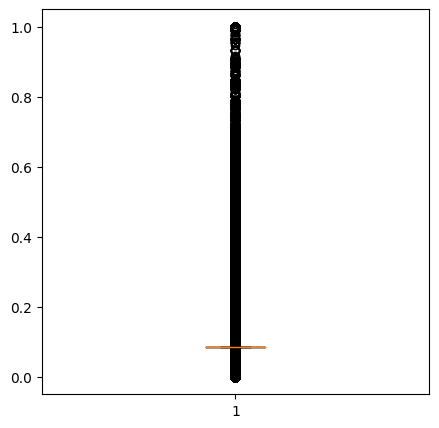

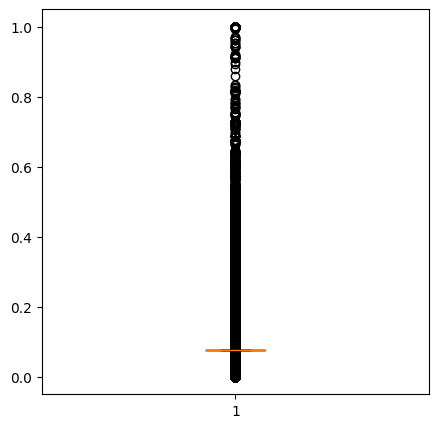

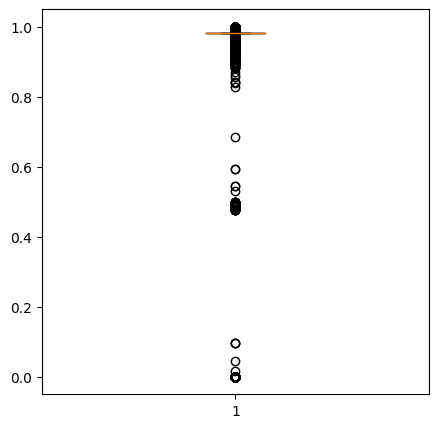

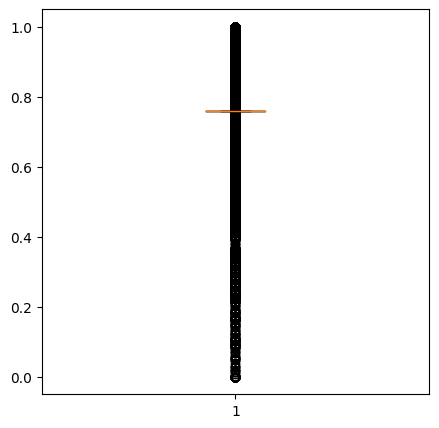

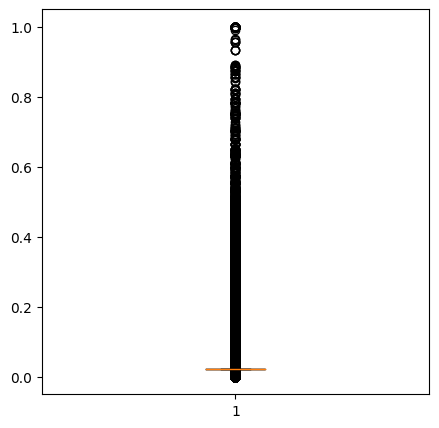

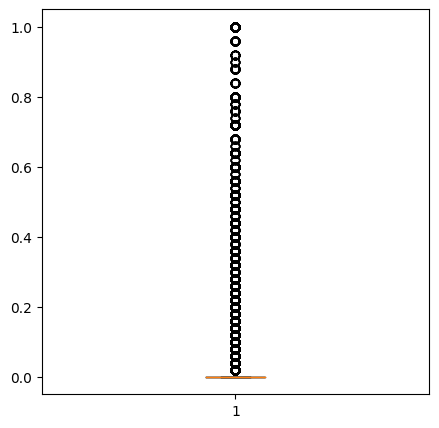

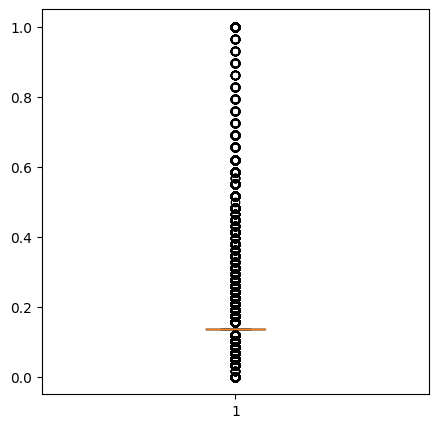

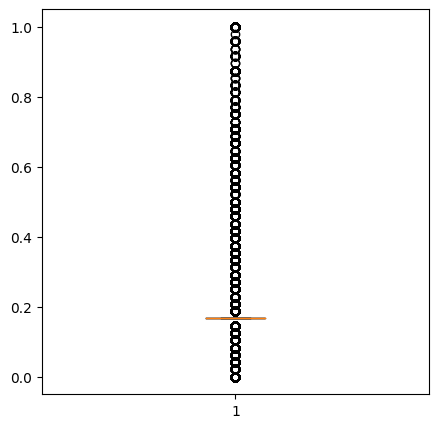

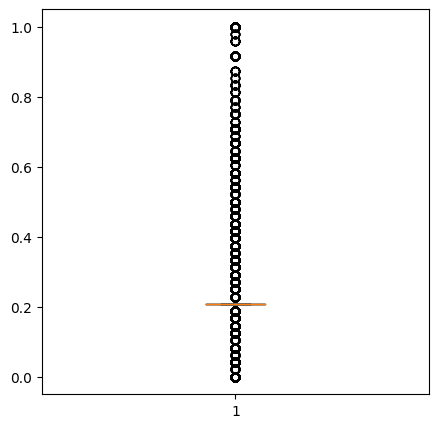

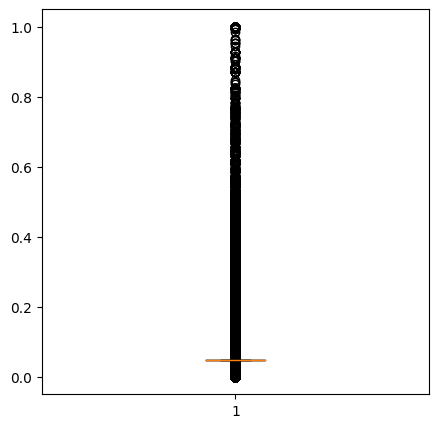

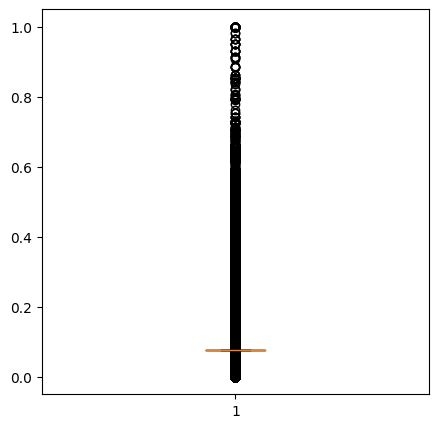

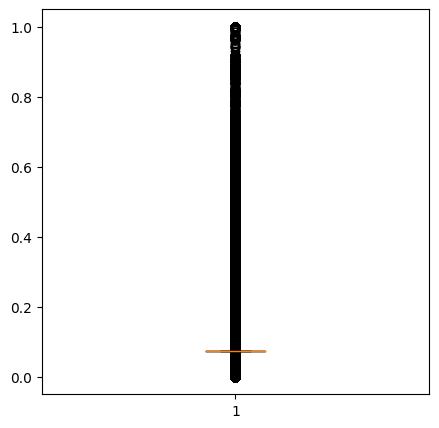

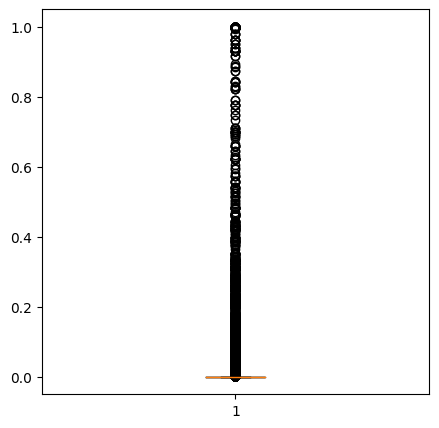

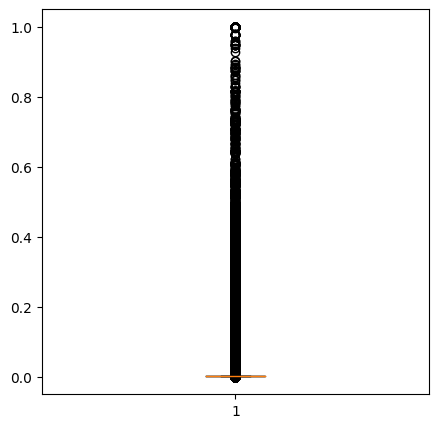

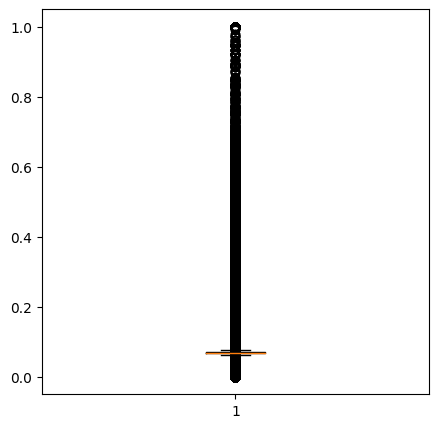

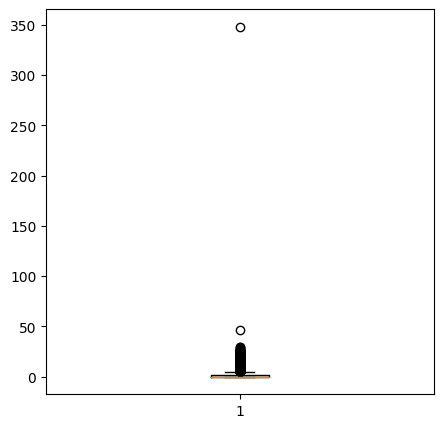

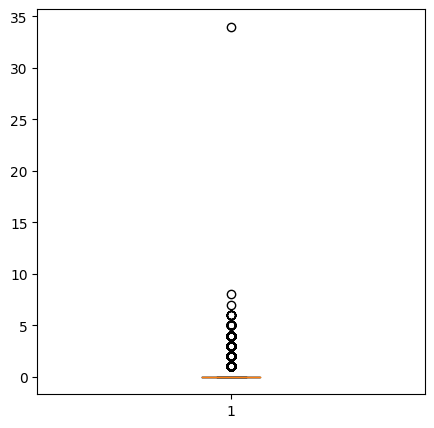

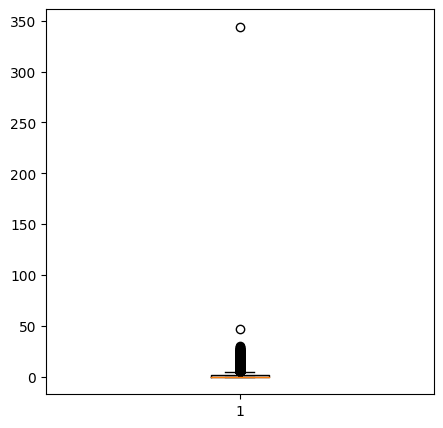

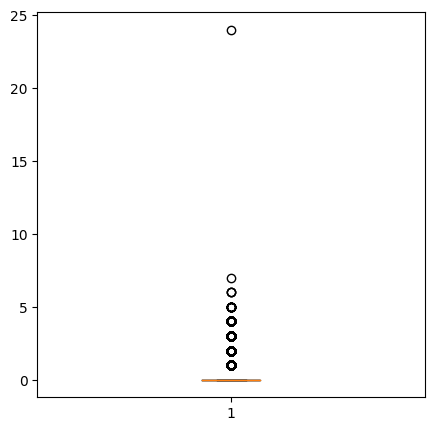

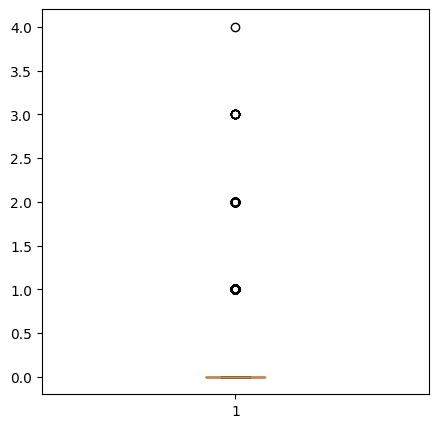

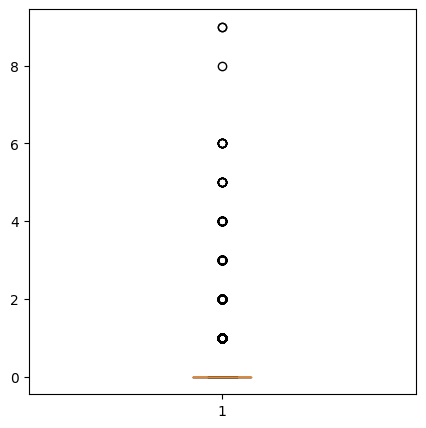

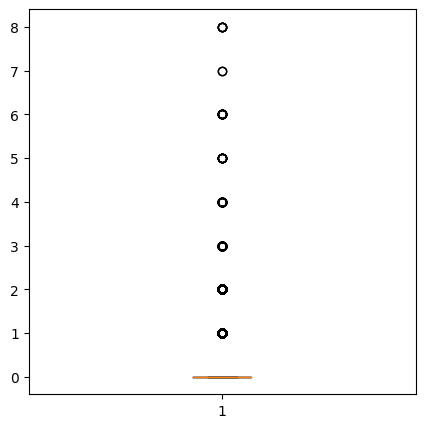

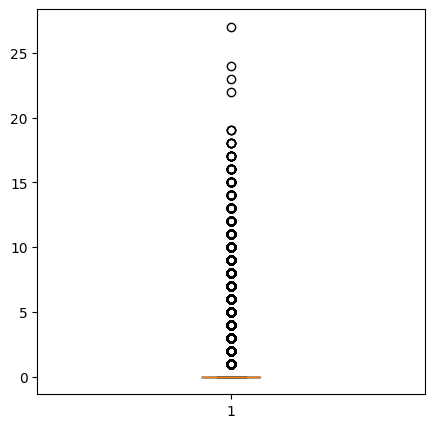

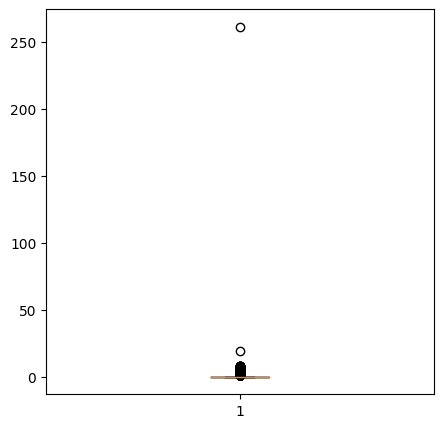

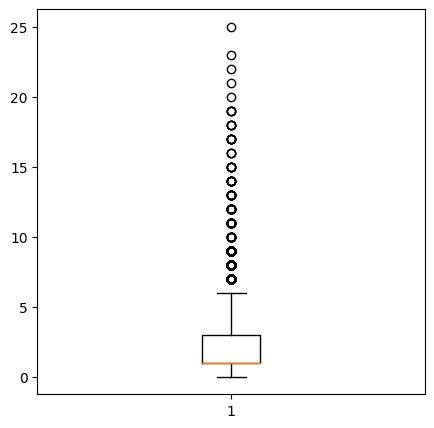

In [ ]:
for element in df_float_2.columns:
  plt.figure(figsize=(5,5))
  plt.boxplot(df_float_2[element])

## Question business 

#### Quel est le taux d'endettement moyen d'une personne

- Le taux d'endettement d'une personne est le rapport entre le montant de son crédit et son salaire.
- Dans ce dataset, les salaires et les montant de dette sont par année.


In [ ]:
df_float_1['Taux_Endettement'] = df_float_1.AMT_ANNUITY / df_float_1.AMT_INCOME_TOTAL
print(df_float_1.Taux_Endettement.mean() * 100)

18.09289211110611


On constate que le taux d'endettement moyen d'une personne est de 18 pourcent.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f34fdc56dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f34fd83a340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f34fdc56b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f34fd83a880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f34fd83ab20>],
 'means': []}

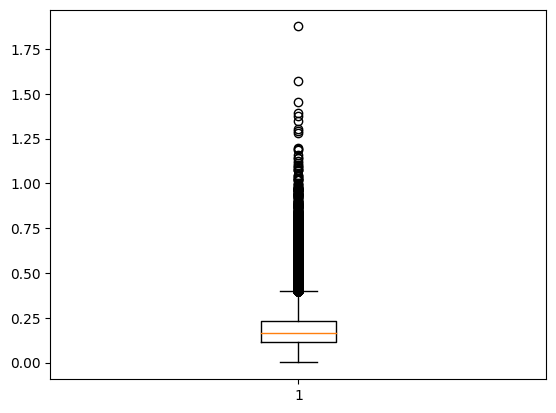

In [ ]:
plt.boxplot(df_float_1['Taux_Endettement'])

Par ailleurs, malgrés que le taux d'endettement moyen soit faible, certaines personnes ont un montant d'endettement supérieur à leur salaire. Voyons voir si ces personnes sont plus suceptible de faire défaut par la suite.

#### Est-ce que les personnes qui ont un taux d'endettement supérieur à la moyenne sont plus suceptible de faire défaut ?

In [ ]:
df_float_1['TARGET'] = application_data['TARGET']

In [ ]:
df_Sup_Taux_Endettement = df_float_1[df_float_1['Taux_Endettement'] > df_float_1['Taux_Endettement'].mean()]
df_Inf_Taux_Endettement = df_float_1[df_float_1['Taux_Endettement'] <= df_float_1['Taux_Endettement'].mean()]

print("Taux d'endettement \n")
print(df_Sup_Taux_Endettement['TARGET'].value_counts(normalize = True) * 100)
print(df_Inf_Taux_Endettement['TARGET'].value_counts(normalize = True) * 100)
print('\n')

Taux d'endettement 

0    91.424981
1     8.575019
Name: TARGET, dtype: float64
0    92.289602
1     7.710398
Name: TARGET, dtype: float64




D'après ce que nous voyons, le taux d'endettement n'a pas d'influence sur la probabilité de défaut de crédit.

#### Quel est le score de crédit moyen d'une personne en prenant en compte les 3 sources externes proposées ?

In [ ]:
df_float_1['Score_Moyen'] = (df_float_1['EXT_SOURCE_1'] + df_float_1['EXT_SOURCE_2'] + df_float_1['EXT_SOURCE_3']) / 3

In [ ]:
print(df_float_1['Score_Moyen'].mean())

0.5115029864789628


Le score de crédit moyen est de 0.51. Ici, les scores de crédit sont normalisé, les vrai valeurs sont comprises généralement entre 300 et 900.

#### Est-ce que les personnes possédant un score inférieur au score moyen sont plus suceptible de faire défaut ?

In [ ]:
df_Sup_Score_Moyen = df_float_1[df_float_1['Score_Moyen'] > df_float_1['Score_Moyen'].mean()]
df_Inf_Score_Moyen = df_float_1[df_float_1['Score_Moyen'] <= df_float_1['Score_Moyen'].mean()]

print(" Score Moyen \n")
print(df_Sup_Score_Moyen['TARGET'].value_counts(normalize = True) * 100)
print(df_Inf_Score_Moyen['TARGET'].value_counts(normalize = True) * 100)
print('\n')

 Score Moyen 

0    96.175861
1     3.824139
Name: TARGET, dtype: float64
0    87.012659
1    12.987341
Name: TARGET, dtype: float64




Contrairement aux taux d'endettement, on remarque que les personnes ayant un score de crédit inférieur à la moyenne ont 4 fois plus de chances de faire défaut.

#### Quel est l'âge moyen de la clientéle ?

In [ ]:
# Création de la colonne âge du client en année
application_data['AGE_ANNEE'] = np.abs(application_data['DAYS_BIRTH']) / 365.25

In [ ]:
print(application_data['AGE_ANNEE'].mean())

43.9068995669901


{'whiskers': [<matplotlib.lines.Line2D at 0x7f34fe082790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f34fe082940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f34fe0821c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f34fdad8730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f34fdad8c70>],
 'means': []}

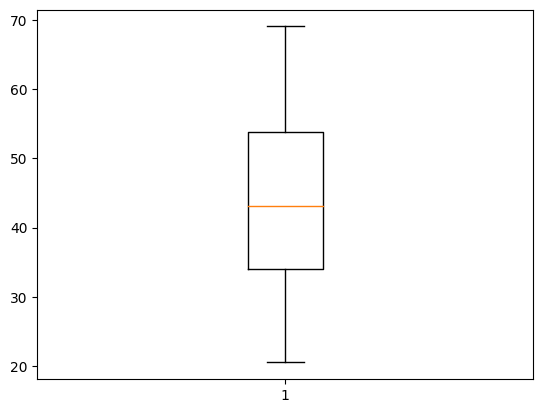

In [ ]:
plt.boxplot(application_data['AGE_ANNEE'])

#### Est-ce que l'âge du client influe sur la capacité de remboursement ?

In [ ]:
df_Sup_Age_Moyen = application_data[application_data['AGE_ANNEE'] > application_data['AGE_ANNEE'].mean()]
df_Inf_Age_Moyen = application_data[application_data['AGE_ANNEE'] <= application_data['AGE_ANNEE'].mean()]

print(" Score Moyen \n")
print(df_Sup_Age_Moyen['TARGET'].value_counts(normalize = True) * 100)
print(df_Inf_Age_Moyen['TARGET'].value_counts(normalize = True) * 100)
print('\n')

 Score Moyen 

0    93.743541
1     6.256459
Name: TARGET, dtype: float64
0    90.261857
1     9.738143
Name: TARGET, dtype: float64




Plus le client est jeune, plus le risque de défaut augmente.

#### Est-ce que l'anscienneté du client a son travail a de l'influence sur sa capacité de remboursement ?

In [ ]:
# Création de la colonne âge du client en année
application_data['YEARS_EMPLOYED'] = np.abs(application_data['DAYS_EMPLOYED']) / 365.25

In [ ]:
print(application_data['YEARS_EMPLOYED'].mean())

185.42023860112621


In [ ]:
tmp = application_data[application_data['YEARS_EMPLOYED'] > 900]

In [ ]:
tmp.shape

(55374, 124)

Cette colonne est beaucoup trop biaisé, il faut donc la supprimer.

In [ ]:
application_data.drop(['YEARS_EMPLOYED','DAYS_EMPLOYED'],axis=1,inplace=True)

#### Est-ce que le nombre de demande de renseignement au bureau concernant un client donne des informations sur sa capacité de remboursement ?

In [ ]:
df_float_2['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_float_2['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int)
df_float_2['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_float_2['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int)
df_float_2['AMT_REQ_CREDIT_BUREAU_MON'] =  df_float_2['AMT_REQ_CREDIT_BUREAU_MON'].astype(int)
df_float_2['AMT_REQ_CREDIT_BUREAU_QRT'] =  df_float_2['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int)
df_float_2['AMT_REQ_CREDIT_BUREAU_YEAR'] = df_float_2['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)

In [ ]:
liste_demandes = ["AMT_REQ_CREDIT_BUREAU_HOUR",'AMT_REQ_CREDIT_BUREAU_WEEK',"AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

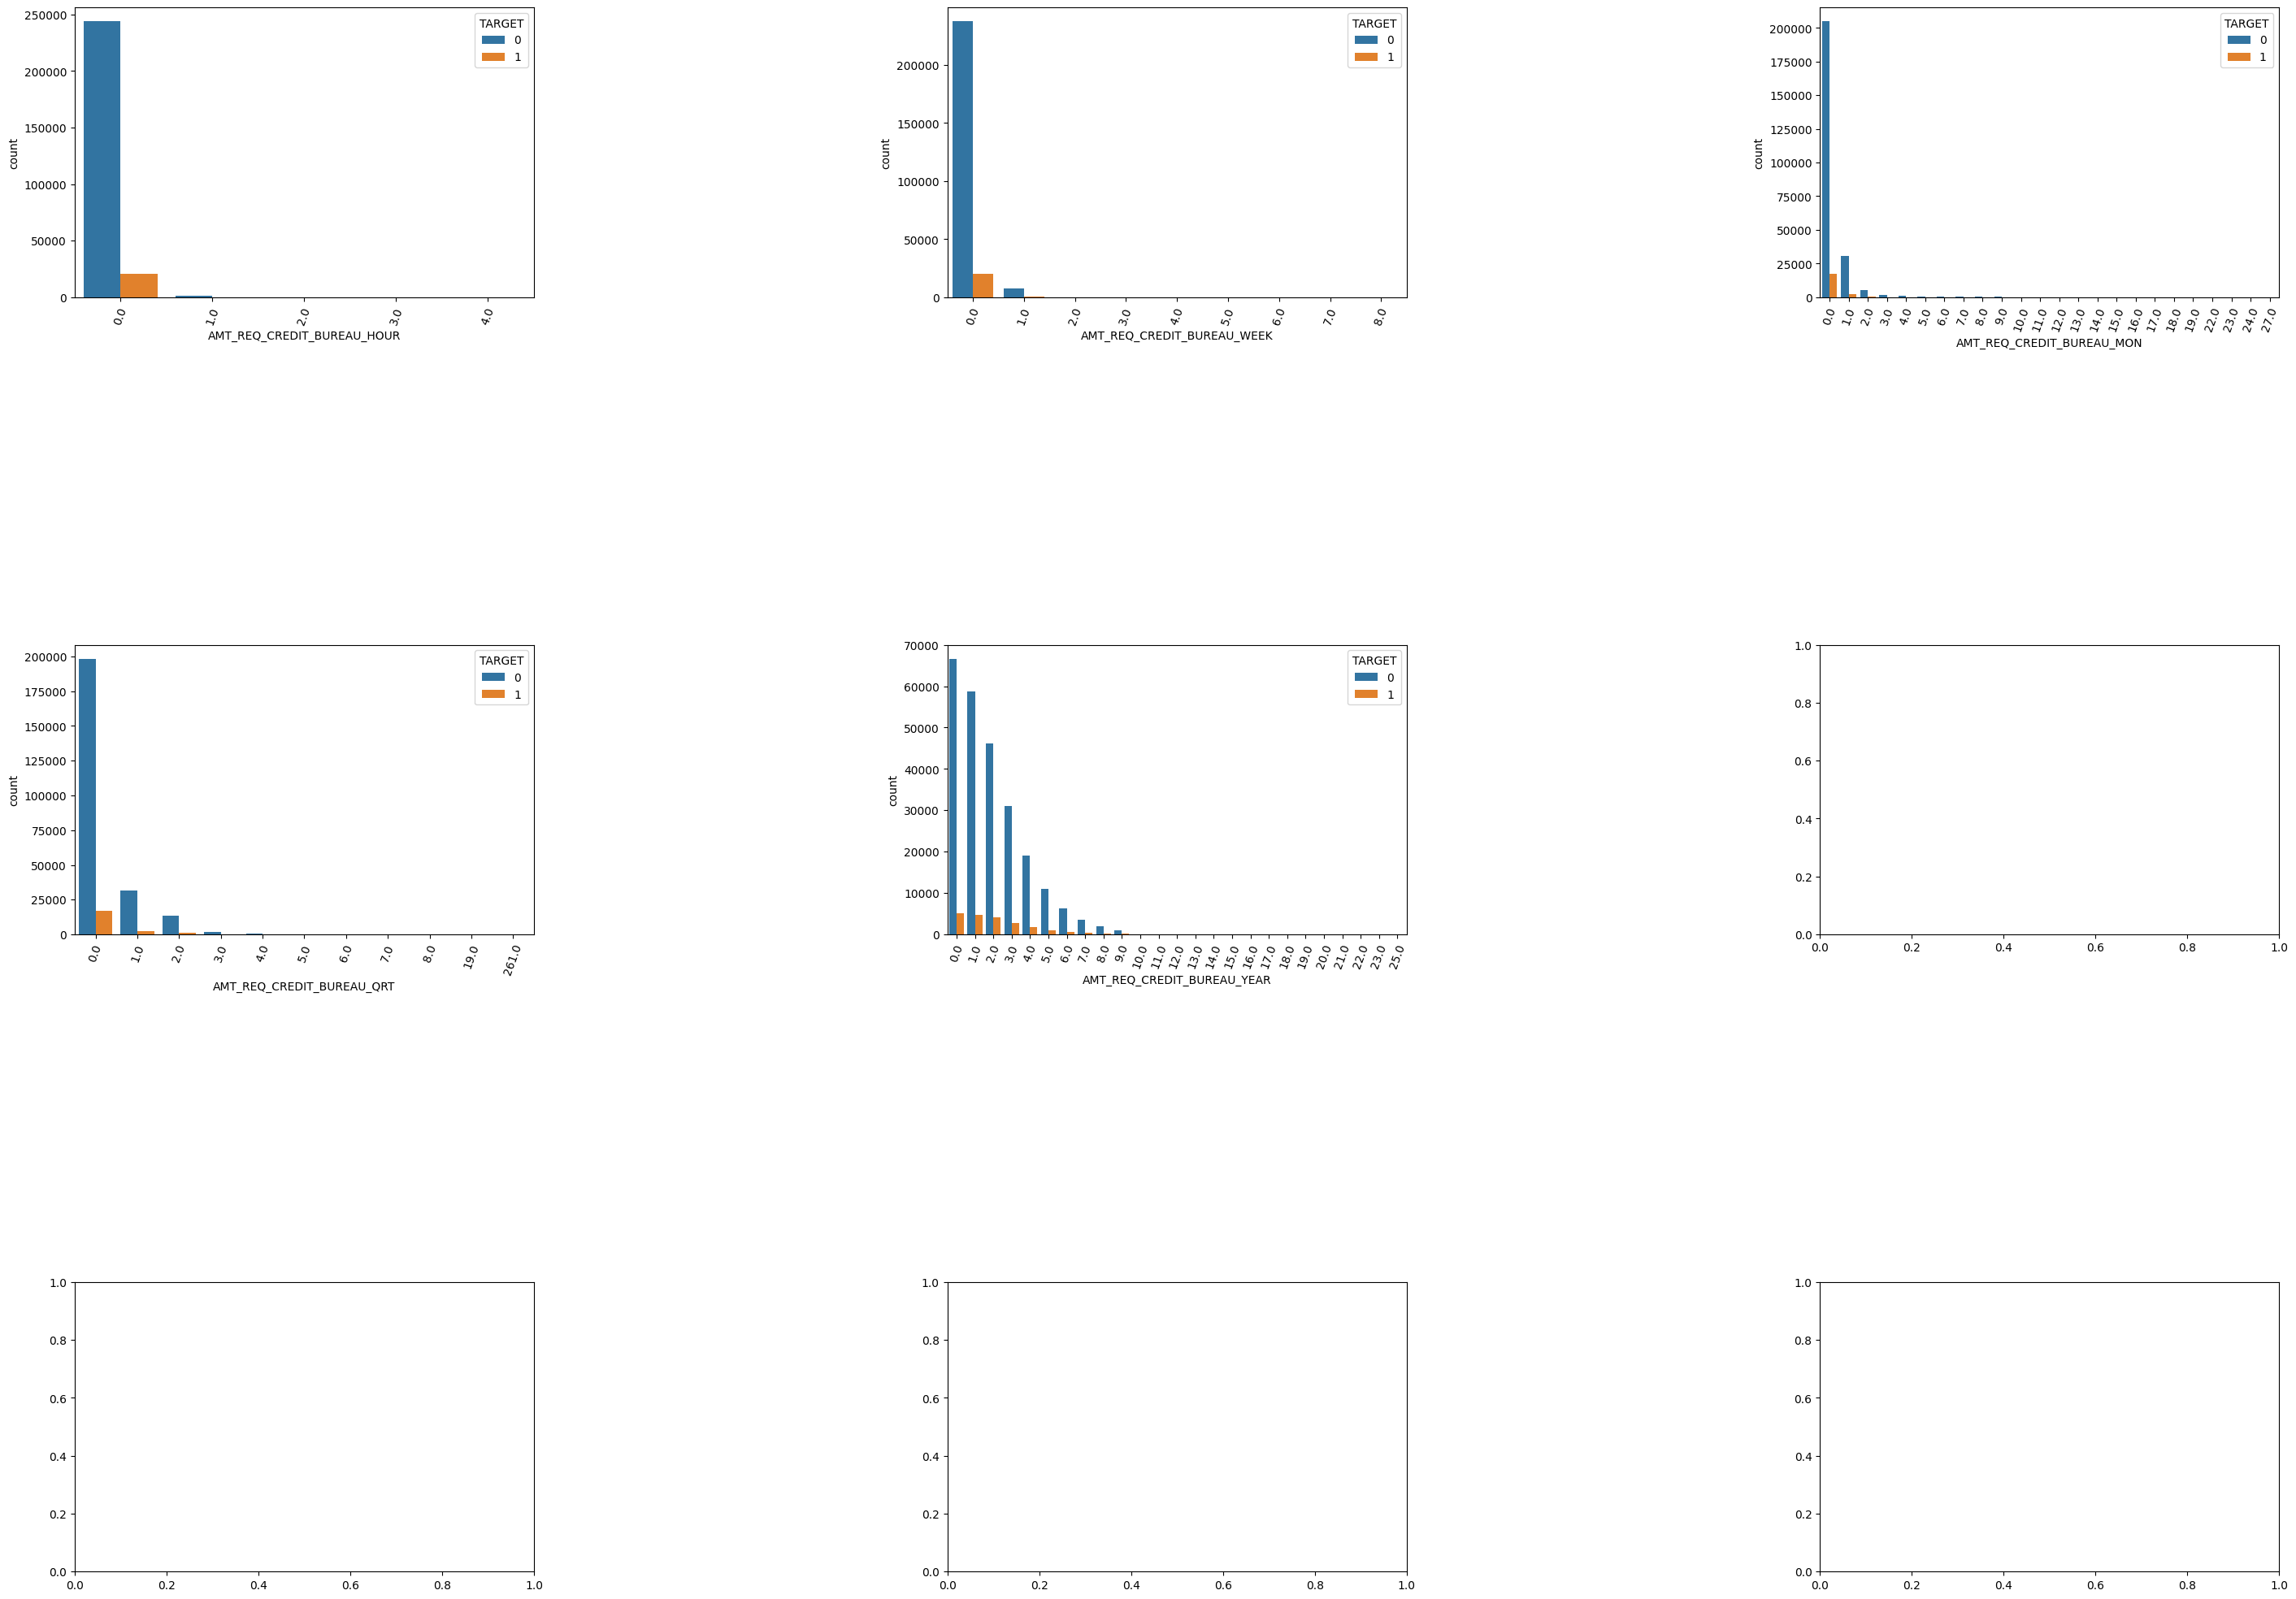

In [ ]:
# Affichage d'histogramme qui croise chaque variable catégorique de type int de caractére avec la Target
fig,axes = plt.subplots(3,3,figsize=(35,25))

for idx,int_col in enumerate(liste_demandes):
    
    row , col = idx//3,idx%3
    ax = sns.countplot(x=int_col , data= application_data , hue='TARGET' , ax = axes[row,col])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
    fig.subplots_adjust(hspace=1.2,wspace=0.9)

In [11]:
# Vérification la derniére heure
tmp1 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_HOUR'] == 0]
tmp2 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_HOUR'] == 1]
tmp3 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_HOUR'] == 2]
tmp4 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_HOUR'] == 3]
tmp5 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_HOUR'] == 4]

print(" Vérification la derniére heure \n")
print(tmp1['TARGET'].value_counts(normalize = True) * 100)
print(tmp2['TARGET'].value_counts(normalize = True) * 100)
print(tmp3['TARGET'].value_counts(normalize = True) * 100)
print(tmp4['TARGET'].value_counts(normalize = True) * 100)
print(tmp5['TARGET'].value_counts(normalize = True) * 100)
print('\n')

# Vérification trimestrielle
tmp1 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_QRT'] == 0]
tmp2 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_QRT'] == 1]
tmp3 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_QRT'] == 2]
tmp4 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_QRT'] == 3]
tmp5 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_QRT'] == 4]

print(" Vérification le dernier trimestre \n")
print(tmp1['TARGET'].value_counts(normalize = True) * 100)
print(tmp2['TARGET'].value_counts(normalize = True) * 100)
print(tmp3['TARGET'].value_counts(normalize = True) * 100)
print(tmp4['TARGET'].value_counts(normalize = True) * 100)
print(tmp5['TARGET'].value_counts(normalize = True) * 100)
print('\n')

# Vérification mensuelle
tmp1 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_MON'] == 0]
tmp2 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_MON'] == 1]
tmp3 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_MON'] == 2]
tmp4 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_MON'] == 3]
tmp5 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_MON'] == 4]

print(" Vérification le dernier mois \n")
print(tmp1['TARGET'].value_counts(normalize = True) * 100)
print(tmp2['TARGET'].value_counts(normalize = True) * 100)
print(tmp3['TARGET'].value_counts(normalize = True) * 100)
print(tmp4['TARGET'].value_counts(normalize = True) * 100)
print(tmp5['TARGET'].value_counts(normalize = True) * 100)
print('\n')

# Vérification annuelle
tmp1 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] == 0]
tmp2 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] == 1]
tmp3 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] == 2]
tmp4 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] == 3]
tmp5 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] == 4]
tmp6 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] == 5]
tmp7 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] == 5]
tmp8 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] == 6]
tmp9 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] == 7]
tmp10 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] == 8]
tmp11 = application_data[application_data['AMT_REQ_CREDIT_BUREAU_YEAR'] == 9]

print(" Vérification la derniére année \n")
print(tmp1['TARGET'].value_counts(normalize = True) * 100)
print(tmp2['TARGET'].value_counts(normalize = True) * 100)
print(tmp3['TARGET'].value_counts(normalize = True) * 100)
print(tmp4['TARGET'].value_counts(normalize = True) * 100)
print(tmp5['TARGET'].value_counts(normalize = True) * 100)
print(tmp6['TARGET'].value_counts(normalize = True) * 100)
print(tmp7['TARGET'].value_counts(normalize = True) * 100)
print(tmp8['TARGET'].value_counts(normalize = True) * 100)
print(tmp9['TARGET'].value_counts(normalize = True) * 100)
print(tmp10['TARGET'].value_counts(normalize = True) * 100)
print(tmp11['TARGET'].value_counts(normalize = True) * 100)
print('\n')

 Vérification la derniére heure 

0    92.282669
1     7.717331
Name: TARGET, dtype: float64
0    91.987179
1     8.012821
Name: TARGET, dtype: float64
0    89.285714
1    10.714286
Name: TARGET, dtype: float64
0    100.0
Name: TARGET, dtype: float64
0    100.0
Name: TARGET, dtype: float64


 Vérification le dernier trimestre 

0    92.15243
1     7.84757
Name: TARGET, dtype: float64
0    93.423306
1     6.576694
Name: TARGET, dtype: float64
0    91.652789
1     8.347211
Name: TARGET, dtype: float64
0    92.661619
1     7.338381
Name: TARGET, dtype: float64
0    88.02521
1    11.97479
Name: TARGET, dtype: float64


 Vérification le dernier mois 

0    92.208628
1     7.791372
Name: TARGET, dtype: float64
0    92.276827
1     7.723173
Name: TARGET, dtype: float64
0    92.963238
1     7.036762
Name: TARGET, dtype: float64
0    94.57559
1     5.42441
Name: TARGET, dtype: float64
0    94.423792
1     5.576208
Name: TARGET, dtype: float64


 Vérification la derniére année 

0    92.865002
1

#### Est-ce que l'âge de la voiture a de l'influence sur le défaut de paiement ?

In [ ]:
application_data['OWN_CAR_AGE'].unique()

array([           nan, 1.58021179e+11, 5.09150571e+09, 1.43376913e+07,
       5.82564719e+10, 5.28576805e+06, 1.08645555e+09, 4.17974126e+01,
       1.48846169e+04, 6.05563188e+08, 7.84923537e+07, 1.30077971e+03,
       2.78736832e+10, 1.87944027e+10, 4.06209669e+10, 3.07206520e+14,
       4.61966045e+05, 1.64050354e+08, 3.50060333e+07, 9.85769498e+04,
       1.87704687e+09, 3.23211242e+08, 1.14776629e+11, 1.70526717e+06,
       2.69932554e+14, 0.00000000e+00, 2.15043576e+11, 1.24311100e+10,
       2.89495315e+11, 8.04972915e+09, 3.13716573e+09, 5.09361253e+11,
       2.28047375e+12, 8.23274571e+10, 4.41445319e+12, 3.85814878e+11,
       5.44165445e+12, 6.67414343e+12, 6.66564414e+11, 8.14654931e+12,
       2.85856633e+12, 1.80806168e+12, 1.42416814e+12, 1.11404945e+12,
       6.55535413e+13, 3.56223468e+12, 8.65094242e+11, 9.89831718e+12,
       7.63648460e+13, 2.92355796e+13, 1.19742421e+13, 2.36705926e+14,
       1.73080138e+13, 1.44250479e+13, 2.46364331e+13, 8.87191427e+13,
      

Les données ne sont pas exploitable, nous les supprimons.

In [ ]:
application_data.drop(['OWN_CAR_AGE'],axis=1,inplace=True)

#### Quel est le montant de crédit moyen demandé par les clients ?

In [ ]:
application_data['AMT_CREDIT'].median()

59.86713593175384

In [ ]:
application_data['AMT_CREDIT']

0         57.013206
1         72.501752
2         45.138364
3         53.952292
4         59.854206
            ...    
307506    51.667008
307507    52.289434
307508    63.427687
307509    55.899517
307510    63.375780
Name: AMT_CREDIT, Length: 307511, dtype: float64

Je n'ai pas compris quelle est l'échelle de mesure.

#### Quel est le prix moyen du bien pour lequel le prêt est accordé.

In [ ]:
application_data.AMT_GOODS_PRICE.mean()

9.459204002493538e+50

Demander l'avis de Anas.